In [1]:
import numpy as np
import skexplain
import seaborn as sns
import plotting_config
import itertools
import scipy
import xarray as xr
import matplotlib.colors as mcolors
from sklearn.ensemble import RandomForestRegressor

In [2]:
from time_series_deconfounder import *
from loguru import logger

2024-06-06 18:48:43.387005: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-06 18:48:43.433181: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX_VNNI AMX_TILE AMX_INT8 AMX_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-06 18:48:44.124451: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
INFO:Using GPU with memory growth
2024-06-06 18:48:44.779014: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 46429 MB memory:  

Number of devices: 1


In [4]:
# useful function
def _get_centres(x):
    return (x[1:] + x[:-1]) / 2

def _check_two_ints(values):
    if isinstance(values, (int, np.integer)):
        values = (values, values)
    elif len(values) == 1:
        values = (values[0], values[0])
    elif len(values) != 2:
        raise ValueError(
            "'{}' values were given. Expected at most 2.".format(len(values))
        )

    if not all(isinstance(n_bin, (int, np.integer)) for n_bin in values):
        raise ValueError(
            "All values must be an integer. Got types '{}' instead.".format(
                {type(n_bin) for n_bin in values}
            )
        )
    return values

In [2]:
## load ale
# 从 NetCDF 文件中读取数据集
ale = xr.open_dataset("result_data/ale_bootstrap_v2.nc")
ale

<xarray.Dataset>
Dimensions:                          (n_bootstrap: 2, n_bins__conformity: 20,
                                      n_X: 158045811)
Dimensions without coordinates: n_bootstrap, n_bins__conformity, n_X
Data variables:
    conformity__RNN_Model_2019__ale  (n_bootstrap, n_bins__conformity) float64 ...
    conformity__RNN_Model_2020__ale  (n_bootstrap, n_bins__conformity) float64 ...
    conformity__RNN_Model_2023__ale  (n_bootstrap, n_bins__conformity) float64 ...
    conformity__bin_values           (n_bins__conformity) float32 ...
    conformity                       (n_X) float32 ...
Attributes:
    estimator_output:  raw
    estimators used:   ['RNN_Model_2019', 'RNN_Model_2020', 'RNN_Model_2023']
    method:            ale
    dimension:         1D
    features used:     conformity

In [3]:
estimator = [('RNN_Model_2019',RandomForestRegressor()),
            ('RNN_Model_2020',RandomForestRegressor()),
            ('RNN_Model_2023',RandomForestRegressor())]

explainer = skexplain.ExplainToolkit(estimator)

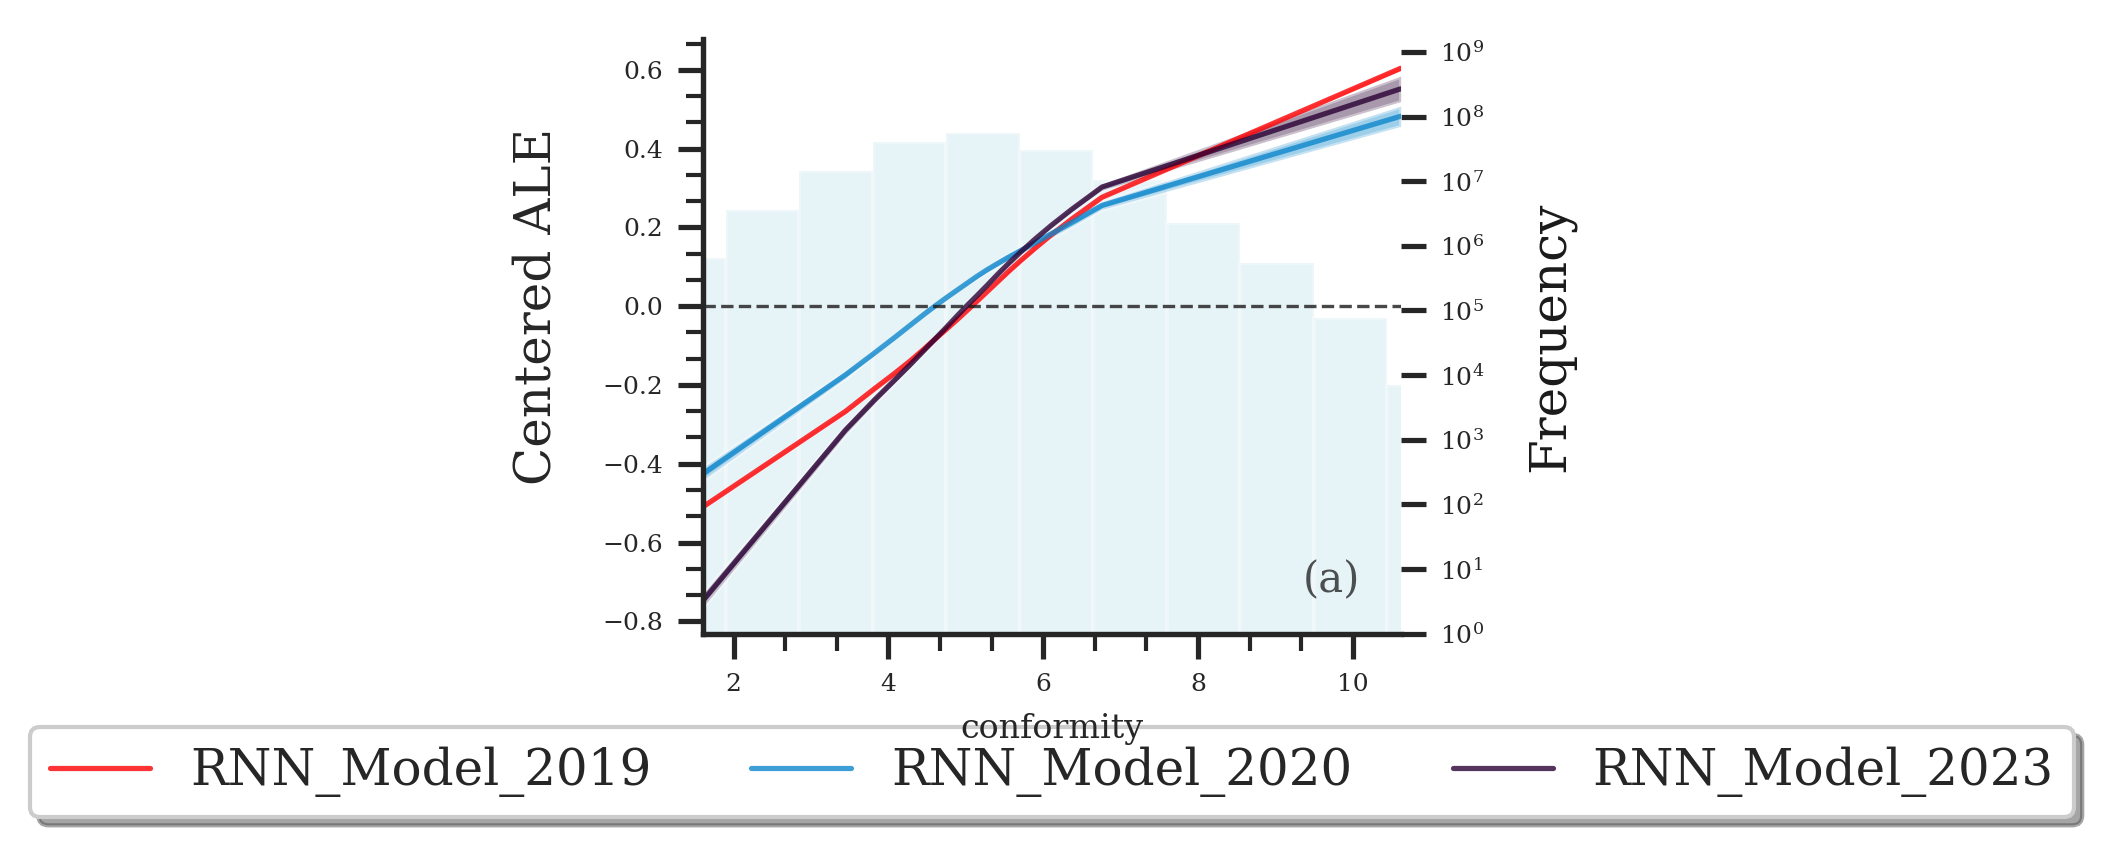

In [4]:
fig, ax = explainer.plot_ale(
                                   ale = ale,
                                   features='conformity',
                                   display_units=plotting_config.display_units,
                                   display_feature_names=plotting_config.display_feature_names,
                                  )

## 绘制带ice曲线的ale图

In [3]:
# 导入数据
dataset = load_data("../data/sample_3w2_add.h5")

index_to_remove = dataset['covariates'].shape[2] - 5
dataset['covariates'] = np.delete(dataset['covariates'], index_to_remove, axis=2)

for key in dataset.keys():
    print(key)
    print(dataset[key].shape)
    print(dataset[key].dtype)

covariates
(96000, 161, 24)
float32
outcomes
(96000, 161, 1)
float32
sequence_length
(96000,)
int64
treatments
(96000, 161, 1)
float32


In [4]:
# 模型编号
exp_name = "add_ent_model_optimal_v2"

the `interpolation=` argument to quantile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
2024-05-28 20:53:08.407 | DEBUG    | ale:_second_order_ale_quant:481 - Quantiles: [ 0.         3.2152407  3.6751142  3.9700499  4.1934595  4.377766
  4.5387115  4.6839633  4.820632   4.951911   5.081497   5.211106
  5.3442826  5.484105   5.632727   5.7976036  5.989179   6.225538
  6.53361    7.0024943 13.996733 ].


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.60it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.11it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:01, 15.97it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.60it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.57it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.57it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.91it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.34it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.18it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.12it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.14it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.29it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.43it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.40it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.34it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.30it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.94it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.68it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.17it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.54it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.50it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.32it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.54it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.59it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.38it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.57it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.36it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.57it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.75it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.63it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.54it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.05it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.61it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.73it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.45it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.70it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.68it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.49it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.80it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.57it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.65it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.96it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.59it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.51it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.52it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.60it/s]


ale average = 0.041003287913145274
plotting heatmap...


2024-05-28 20:54:46.439 | DEBUG    | ale:_second_order_ale_quant:481 - Quantiles: [ 0.         3.2152407  3.6751142  3.9700499  4.1934595  4.377766
  4.5387115  4.6839633  4.820632   4.951911   5.081497   5.211106
  5.3442826  5.484105   5.632727   5.7976036  5.989179   6.225538
  6.53361    7.0024943 13.996733 ].


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.62it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.59it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.51it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.54it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.68it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.53it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.41it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.62it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.36it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.97it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.70it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.45it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.74it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.00it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.49it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.09it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.53it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.67it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.08it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.55it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.62it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.00it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.26it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.48it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.72it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.51it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.67it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.66it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.46it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.81it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.65it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.48it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.71it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.40it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.90it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.41it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.76it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.62it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.18it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.63it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.92it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.60it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.92it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.46it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.22it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.36it/s]


ale average = 0.04244002417381828
plotting heatmap...


2024-05-28 20:56:22.798 | DEBUG    | ale:_second_order_ale_quant:481 - Quantiles: [ 0.         3.2152407  3.6751142  3.9700499  4.1934595  4.377766
  4.5387115  4.6839633  4.820632   4.951911   5.081497   5.211106
  5.3442826  5.484105   5.632727   5.7976036  5.989179   6.225538
  6.53361    7.0024943 13.996733 ].


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.26it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.10it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.26it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.15it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.80it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.97it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.54it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.32it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.05it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.86it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.47it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.60it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.52it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.52it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.55it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.52it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.56it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.51it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.43it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.76it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.64it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.42it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.56it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.63it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.10it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.47it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.88it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.41it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.56it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.55it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.67it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.72it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.62it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.54it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.57it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.53it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.60it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.44it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.27it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.59it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.60it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.42it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.65it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.43it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.06it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.54it/s]


ale average = 0.04359274099197108
plotting heatmap...


2024-05-28 20:58:00.203 | DEBUG    | ale:_second_order_ale_quant:481 - Quantiles: [ 0.         3.2152407  3.6751142  3.9700499  4.1934595  4.377766
  4.5387115  4.6839633  4.820632   4.951911   5.081497   5.211106
  5.3442826  5.484105   5.632727   5.7976036  5.989179   6.225538
  6.53361    7.0024943 13.996733 ].


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.51it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.58it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.09it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.72it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.71it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.67it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.96it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.72it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.51it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.57it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.75it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.55it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.13it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.69it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.63it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.63it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.57it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.56it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.08it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.35it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.53it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.03it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.41it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.02it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.49it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.63it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.19it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.10it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.54it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.10it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.50it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.58it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.64it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.44it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.66it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.22it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.20it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.32it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.42it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.98it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.35it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.97it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.83it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.72it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.41it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.19it/s]


ale average = 0.039886358929972776
plotting heatmap...


2024-05-28 20:59:38.567 | DEBUG    | ale:_second_order_ale_quant:481 - Quantiles: [ 0.         3.2152407  3.6751142  3.9700499  4.1934595  4.377766
  4.5387115  4.6839633  4.820632   4.951911   5.081497   5.211106
  5.3442826  5.484105   5.632727   5.7976036  5.989179   6.225538
  6.53361    7.0024943 13.996733 ].


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.36it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.73it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.81it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.61it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.28it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.53it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.47it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.46it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.55it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.33it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.34it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.55it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.79it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.93it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.33it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.65it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.74it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.42it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.83it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.52it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.27it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.27it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.64it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.43it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.15it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.87it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.68it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.19it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.66it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.30it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.71it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.25it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.25it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.55it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.52it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.87it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.52it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.02it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.46it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.50it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.84it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.33it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.46it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.81it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.71it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.97it/s]


ale average = 0.041858517299944914
plotting heatmap...


2024-05-28 21:01:19.389 | DEBUG    | ale:_second_order_ale_quant:481 - Quantiles: [ 0.         3.2152407  3.6751142  3.9700499  4.1934595  4.377766
  4.5387115  4.6839633  4.820632   4.951911   5.081497   5.211106
  5.3442826  5.484105   5.632727   5.7976036  5.989179   6.225538
  6.53361    7.0024943 13.996733 ].


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.84it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.44it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.50it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.54it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.55it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.32it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.50it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.24it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.19it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.69it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.46it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.46it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.59it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.93it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.34it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.22it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.31it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.25it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.45it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.94it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.88it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.89it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.83it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.82it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.26it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.33it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.90it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.84it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.99it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.48it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.54it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.00it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.58it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.89it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.53it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.79it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.69it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.31it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.38it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.93it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.39it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.55it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.38it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.73it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.29it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.71it/s]


ale average = 0.04092913928007576
plotting heatmap...


2024-05-28 21:03:00.597 | DEBUG    | ale:_second_order_ale_quant:481 - Quantiles: [ 0.         3.2152407  3.6751142  3.9700499  4.1934595  4.377766
  4.5387115  4.6839633  4.820632   4.951911   5.081497   5.211106
  5.3442826  5.484105   5.632727   5.7976036  5.989179   6.225538
  6.53361    7.0024943 13.996733 ].


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.01it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.51it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.50it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.42it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.75it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.59it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.33it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.82it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.54it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.38it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.42it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.58it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.33it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.50it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.53it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.52it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.55it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.53it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.30it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.61it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.46it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.49it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.64it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.53it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.34it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.50it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.65it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.47it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.69it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.85it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.49it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.44it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.25it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.73it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.43it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.89it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.55it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.97it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.33it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.98it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.57it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.84it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.53it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.87it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.41it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.52it/s]


ale average = 0.04087625260006721
plotting heatmap...


2024-05-28 21:04:40.557 | DEBUG    | ale:_second_order_ale_quant:481 - Quantiles: [ 0.         3.2152407  3.6751142  3.9700499  4.1934595  4.377766
  4.5387115  4.6839633  4.820632   4.951911   5.081497   5.211106
  5.3442826  5.484105   5.632727   5.7976036  5.989179   6.225538
  6.53361    7.0024943 13.996733 ].


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.41it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.08it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.27it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.49it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.65it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.36it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.45it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.06it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.66it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.72it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.65it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.98it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.72it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.37it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.83it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.73it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.34it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.15it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.39it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.67it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.87it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.65it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.64it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.52it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.46it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.51it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.95it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.13it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.25it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.46it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.50it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.47it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.95it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.49it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.23it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.49it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.51it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.40it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.59it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.70it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.64it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.51it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.60it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.76it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.47it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.47it/s]


ale average = 0.039101064161963975
plotting heatmap...


2024-05-28 21:06:20.124 | DEBUG    | ale:_second_order_ale_quant:481 - Quantiles: [ 0.         3.2152407  3.6751142  3.9700499  4.1934595  4.377766
  4.5387115  4.6839633  4.820632   4.951911   5.081497   5.211106
  5.3442826  5.484105   5.632727   5.7976036  5.989179   6.225538
  6.53361    7.0024943 13.996733 ].


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.50it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.61it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.42it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.33it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.72it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.31it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.24it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.86it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.39it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.33it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.22it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.42it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.65it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.07it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.52it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.43it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.48it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.52it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.33it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.88it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.22it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.47it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.47it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.65it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.28it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.15it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.19it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.42it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.09it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.30it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.68it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.34it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.48it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.75it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.33it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.13it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.52it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.76it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.17it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.67it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.51it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.47it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.59it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.85it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.84it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.15it/s]


ale average = 0.04211685855142287
plotting heatmap...


2024-05-28 21:08:02.577 | DEBUG    | ale:_second_order_ale_quant:481 - Quantiles: [ 0.         3.2152407  3.6751142  3.9700499  4.1934595  4.377766
  4.5387115  4.6839633  4.820632   4.951911   5.081497   5.211106
  5.3442826  5.484105   5.632727   5.7976036  5.989179   6.225538
  6.53361    7.0024943 13.996733 ].


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.48it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.65it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.71it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.46it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.42it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.48it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.60it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.44it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.48it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.58it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.61it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.04it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.48it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.42it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.18it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.43it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.33it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.18it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.37it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.08it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.64it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.37it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.51it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.77it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.32it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.73it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.39it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.33it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.49it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.60it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.26it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.46it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.40it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.16it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.62it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.38it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.38it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.51it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.40it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.30it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.47it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.15it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.28it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.31it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.82it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.94it/s]


ale average = 0.04184043141425857
plotting heatmap...


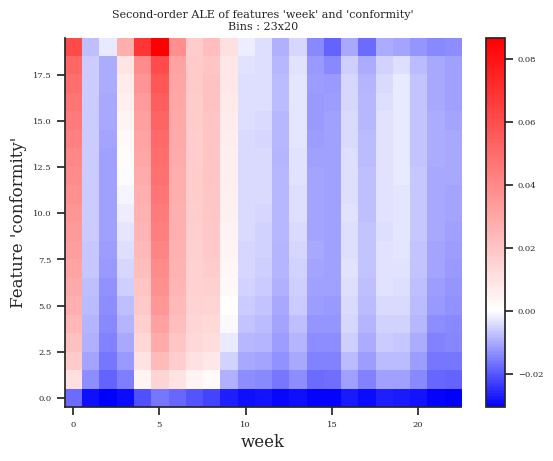

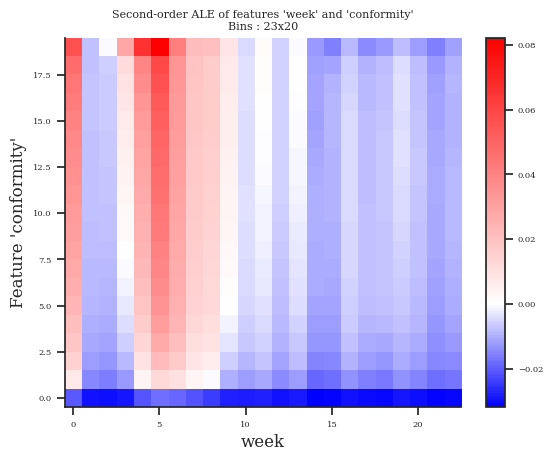

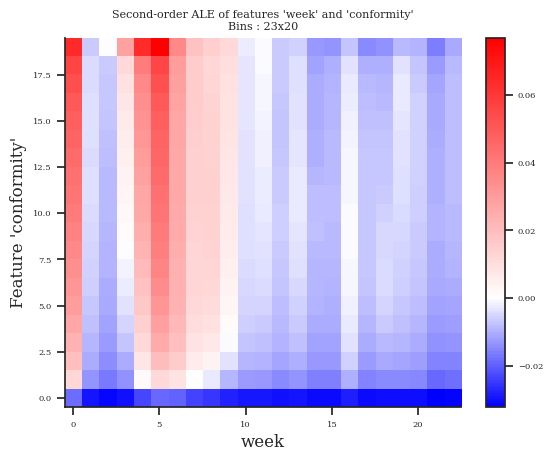

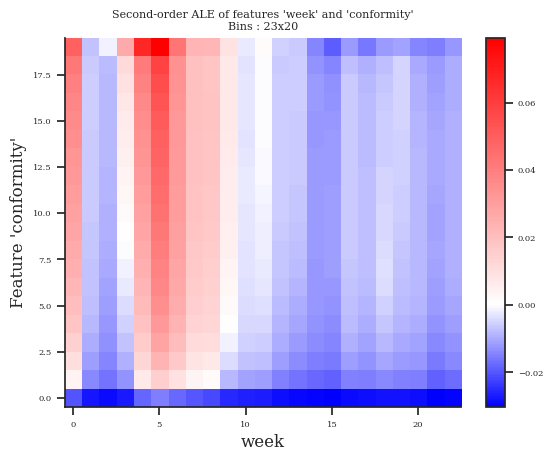

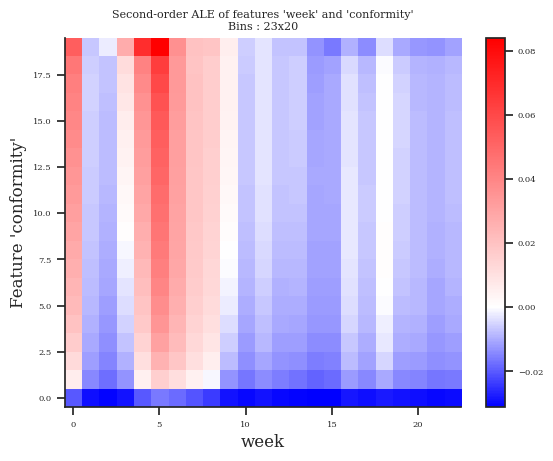

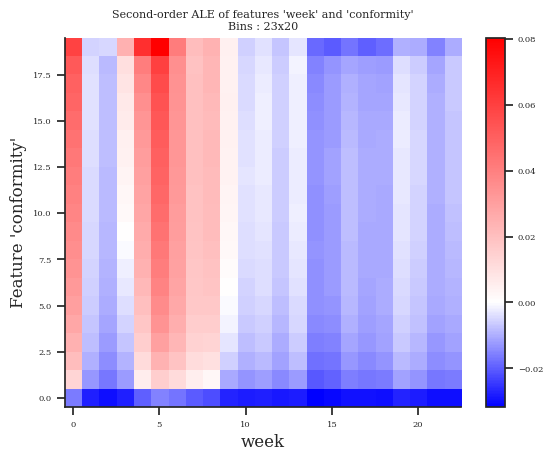

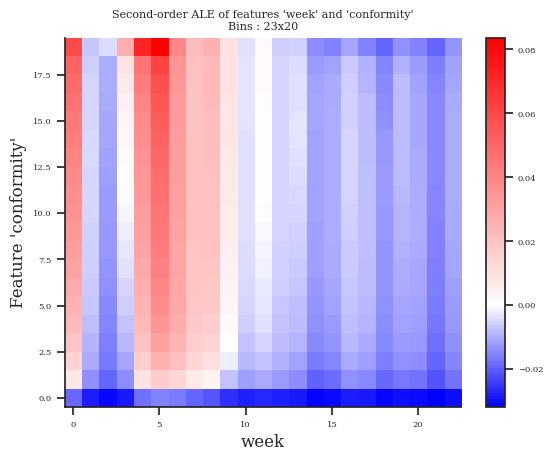

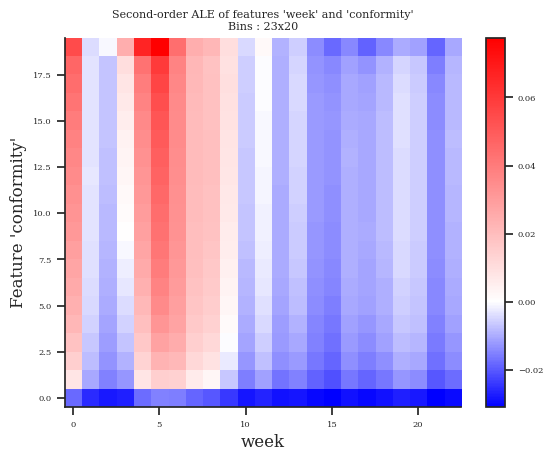

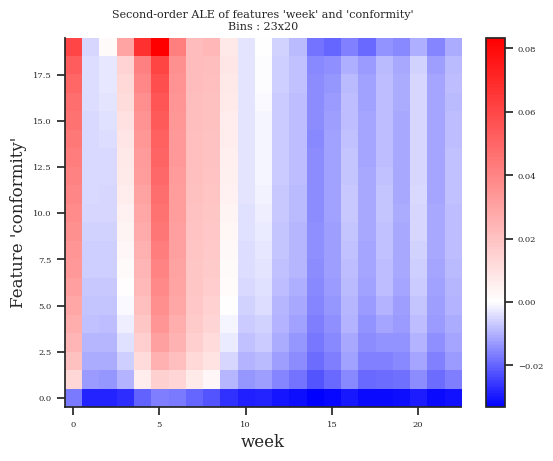

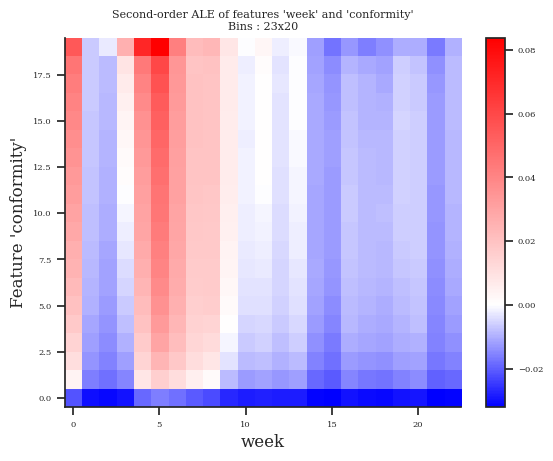

In [11]:
# 计算全局ale，转化成xarray的格式
bins = 20
quantiles = np.unique(
   np.quantile(
       dataset['treatments'].reshape(-1), np.linspace(0, 1, bins + 1), interpolation="lower"
   )
)
ALE_1ST = {
   'RNN_Model': [],
   }
n_bootstrap = 10

for _ in range(n_bootstrap):
    sub_dataset = dataset_sampling(dataset, 1000)
    window_ale_fig, ale, _ = compute_ale(sub_dataset, 'rmsn_' + str(exp_name), b_use_predicted_confounders=False, features=['week', 'conformity'], default_quantiles=quantiles)
    ale_1st = np.sum(ale, axis=0)
    ALE_1ST['RNN_Model'].append(ale_1st)

for key in ALE_1ST.keys():
    ALE_1ST[key] = np.array(ALE_1ST[key])
ale_dataset = create_ale_dataset(ALE_1ST, quantiles, dataset['treatments'], ['RNN_Model'], 'conformity')

In [12]:
# 还原SCI的log值
conformity_bin_values_log = ale_dataset['conformity__bin_values'].values
conformity_bin_values_original = np.exp(conformity_bin_values_log)-1
ale_dataset['conformity__bin_values'] = (('n_bins__conformity'), conformity_bin_values_original)

In [13]:
conformity_log = ale_dataset['conformity'].values
conformity_original = np.exp(conformity_log)-1
ale_dataset['conformity'] = (('n_X'), conformity_original)

In [14]:
ale_dataset

<xarray.Dataset>
Dimensions:                     (n_bootstrap: 10, n_bins__conformity: 20,
                                 n_X: 15456000)
Dimensions without coordinates: n_bootstrap, n_bins__conformity, n_X
Data variables:
    conformity__RNN_Model__ale  (n_bootstrap, n_bins__conformity) float64 -0....
    conformity__bin_values      (n_bins__conformity) float32 3.991 ... 3.63e+04
    conformity                  (n_X) float32 243.5 238.5 223.8 ... 391.0 595.8
Attributes:
    estimator_output:  raw
    estimators used:   ['RNN_Model']
    method:            ale
    dimension:         1D
    features used:     ['conformity']

In [15]:
estimator = [('RNN_Model',RandomForestRegressor())]
explainer = skexplain.ExplainToolkit(estimator)

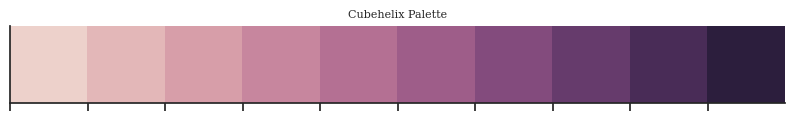

In [18]:
# 生成 cubehelix 调色盘
cubehelix_palette = sns.cubehelix_palette(n_colors=10)
# 显示调色盘中的所有颜色
sns.palplot(cubehelix_palette)
plt.title('Cubehelix Palette')
plt.show()

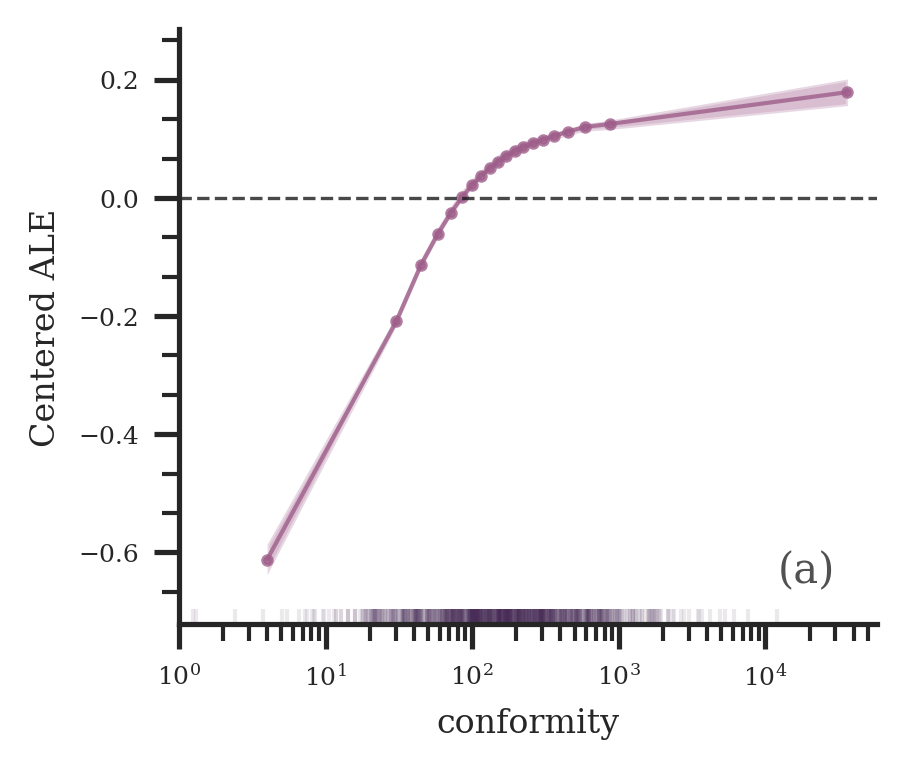

In [48]:
#修改可视化效果
#fig, ax = plt.subplots(dpi=300)
fig, ax = explainer.plot_ale(
                                   ale = ale_dataset,
                                   features='conformity',
                                   display_units=plotting_config.display_units,
                                   display_feature_names=plotting_config.display_feature_names,
                                   line_kws={'marker': 'o', 'markersize':2,'linewidth':1, 'line_colors': [cubehelix_palette[5]]},
                                   add_hist = False,
                                  )

ax.set_xscale('log')
ax.set_ylabel('Centered ALE', fontsize = 8)
ax.set_xlim(left=1)

# ax.set_xticks(conformity_bin_values_original)
# ax.set_xticklabels([f'{val:.2f}' for val in conformity_bin_values_original])

data = ale_dataset['conformity'].values
if len(data) > 1000:
    data_sample = np.random.choice(data, size=1000, replace=False)
else:
    data_sample = data
sns.rugplot(data_sample, ax=ax, color=cubehelix_palette[-2], alpha=0.1)

plt.show()

In [ ]:
ale_dataset['conformity']

### 计算ICE

In [8]:
# 选取一定样本，对个体计算ale
def select_indiviudal_from_dataset(dataset, index, overall=32000):
    indiv_indices = [index, overall+index, overall*2 + index]
    indiv_dataset = {key: value[indiv_indices] for key, value in dataset.items()}
    return indiv_dataset

In [18]:
def construct_relevant_dataframe(dataset, model_name, b_use_predicted_confounders,):
    model_name = model_name + '_use_confounders_' + str(b_use_predicted_confounders)
    model_root = os.path.join('results', model_name)
    config = {'covariate_cols':['gender','age','income','weekday_0','weekday_1','weekday_2','weekday_3','weekday_4', 'weekday_5', 'weekday_6',
           'voluntary','festivals','year_0','year_1','year_2','edu','married','dist_yes','density',
                           'entropy','temperature','percipit','E1','E2'],
            'treatment_cols':['conformity'],
             }
    
    # shape of data
    num_samples, length, num_covariates = dataset['covariates'].shape
    _, _, num_treatments = dataset['treatments'].shape
    num_years = 3
    FE_predict = Feature_Engineering(dataset, for_factor_model = False)
    X = FE_predict.construct_dataframe(config)
    dataset['output_means'] = FE_predict.scale_params['outcomes'][:, 0]
    dataset['output_stds'] = FE_predict.scale_params['outcomes'][:, 1]
    # add timeline and week column
    X['timeline'] = np.tile(np.arange(length), num_samples)
    start_date = pd.Timestamp('2019-12-21')
    X['date'] = X['timeline'].apply(lambda x: start_date + pd.Timedelta(days=x))
    X['week'] = ((X['date'] - start_date).dt.days / 7).astype(int)
    X['pid'] = np.repeat(np.arange(int(num_samples/3)), length*3)
    
    # ############################################################################################
    def ale_use_predict(X, dataset, config, model_root, FE_predict, b_use_predicted_confounders):
        # change data
        mod_dataset = dataset.copy()
        # 将修改完的值添加到mod_dataset
        covariate_shapes = dataset['covariates'].shape
        mod_dataset['covariates'] = X[config['covariate_cols']].values.reshape(covariate_shapes[0],covariate_shapes[1],covariate_shapes[2])
        treatment_shapes = dataset['treatments'].shape
        mod_dataset['treatments'] = X[config['treatment_cols']].values.reshape(treatment_shapes[0],treatment_shapes[1],treatment_shapes[2])

        # 使用原来的参数做标准化
        mod_dataset = FE_predict.get_dataset_normalize(mod_dataset, num_covariates, num_treatments)
        # 调用函数预测
        predictions, _ = \
        rnn_predict(dataset=mod_dataset, MODEL_ROOT=model_root,
                    b_use_predicted_confounders=b_use_predicted_confounders)
        outputs = predictions.reshape(-1)
        del mod_dataset; gc.collect()
        return outputs
    # ############################################################################################
    # define predictor
    predictor = lambda x: ale_use_predict(x, dataset, config, model_root, FE_predict, b_use_predicted_confounders)
    
    return X, predictor

In [89]:
def compute_ice(predictor, train_set, features, bins, default_quantiles=None):
    
    if len(features) != 2:
        raise ValueError(
            "'features' contained '{n_feat}' features. Expected 2.".format(
                n_feat=len(features)
            )
        )
    # if compute time-varying ALE, use first order quant, divide into 2 conditions: week or sliding windows
    # extract a part of code from _first_order_ale_quant and modify##########################
    feature = [feature for feature in features if feature != "week"][0]
    # feature = 'conformity'
    if default_quantiles is None:
        quantiles, real_bins = _get_quantiles(train_set, feature, bins)
    else:
        quantiles, real_bins = default_quantiles, len(default_quantiles) - 1
    # adjust week to match index
    #adjusted_weeks_list = [week - 1 for week in sorted(train_set['week'].unique())]
    quantiles_list = tuple(np.append(sorted(train_set['week'].unique()), max(train_set['week'])+1) if f=='week' else quantiles for f in features)
    bins_list = tuple(len(train_set['week'].unique()) if f=='week' else real_bins for f in features)
    logger.debug("Quantiles: {}.", quantiles)

    num_quantiles = len(quantiles)
    num_samples = len(train_set)
    predictions = np.zeros((num_quantiles, num_samples))

    # 遍历每个 week替换特征值
    for week in sorted(train_set['week'].unique()):
        # 筛选出对应 week 的数据行
        week_indices = train_set['week'] == week
        # feature_indices = np.clip(
        #     np.digitize(train_set[week_indices][feature], quantiles, right=True) - 1, 0, None
        #     )
        # 对每个个体的数据都换成bins去预测（类似pdp的做法）
        for i in range(num_quantiles):
            # 复制整个训练集
            mod_train_set = train_set.copy()
            # 只更新当前 week 的特定特征值
            mod_train_set.loc[week_indices, feature] = quantiles[i]
            # 对整个训练集进行预测并记录
            predictions[i][week_indices] = predictor(mod_train_set)[week_indices]

            del mod_train_set; gc.collect()

    effects = np.diff(predictions, axis=0)

    # 获取每个样本的分位数位置
    indices = np.zeros((num_samples, num_quantiles - 1))

    for i in range(num_samples):
        indices[i] = (np.arange(num_quantiles - 1)).astype("int")

    indiv_groups = pd.DataFrame(
        {"pid": train_set["pid"].values.repeat(num_quantiles - 1), 
         "time": train_set["week"].values.repeat(num_quantiles - 1), 
         "index": indices.flatten(), 
         "effects": effects.flatten()}
    )
    
    return effects, indiv_groups

In [97]:
 group.groupby(["time", "index"]).mean()

pid   effects
time index               
0    0      0.0  0.031160
     1      0.0  0.032003
     2      0.0  0.028742
     3      0.0  0.029684
     4      0.0  0.033511
...         ...       ...
22   15     0.0  0.038618
     16     0.0  0.036745
     17     0.0  0.036181
     18     0.0  0.029061
     19     0.0  0.025775

[460 rows x 2 columns]

In [129]:
index_groupby.size()

time  index
0     0        21
      1        21
      2        21
      3        21
      4        21
               ..
22    15       21
      16       21
      17       21
      18       21
      19       21
Length: 460, dtype: int64

In [127]:
# def aggregate_ice(predictions, train_set, features, default_quantiles):
predictions=ice_df; train_set=indiv_dataframe; features=['week', 'conformity']; default_quantiles=quantiles;
feature = [feature for feature in features if feature != "week"][0]
# feature = 'conformity'
if default_quantiles is None:
    quantiles, real_bins = _get_quantiles(train_set, feature, bins)
else:
    quantiles, real_bins = default_quantiles, len(default_quantiles) - 1
# adjust week to match index
#adjusted_weeks_list = [week - 1 for week in sorted(train_set['week'].unique())]
quantiles_list = tuple(np.append(sorted(train_set['week'].unique()), max(train_set['week'])+1) if f=='week' else quantiles for f in features)
bins_list = tuple(len(train_set['week'].unique()) if f=='week' else real_bins for f in features)

ale_1st_list = []
for _, group in predictions.groupby("pid"):
    # Compute mean effects.
    index_groupby = group.groupby(["time", "index"])
    mean_effects = index_groupby["effects"].mean()
    # Get the indices of the mean values.
    group_indices = mean_effects.index
    valid_grid_indices = tuple(zip(*group_indices))
    # Extract only the data.
    mean_effects = mean_effects.to_numpy().flatten()

    # Get the number of samples in each bin.
    n_samples = index_groupby.size().to_numpy()

    # Create a 2D array of the number of samples in each bin.
    samples_grid = np.zeros(bins_list)
    samples_grid[valid_grid_indices] = n_samples

    ale = np.ma.MaskedArray(
        np.zeros((len(quantiles_list[0]), len(quantiles_list[1]))),
        mask=np.ones((len(quantiles_list[0]), len(quantiles_list[1]))),
    )
    # Mark the first row/column as valid, since these are meant to contain 0s.
    ale.mask[0, :] = False
    ale.mask[:, 0] = False

    # Place the mean effects into the final array.
    # Since `ale` contains `len(quantiles)` rows/columns the first of which are
    # guaranteed to be valid (and filled with 0s), ignore the first row and column.
    ale[1:, 1:][valid_grid_indices] = mean_effects

    # Record where elements were missing.
    missing_bin_mask = ale.mask.copy()[1:, 1:]

    if np.any(missing_bin_mask):
        # Replace missing entries with their nearest neighbours.

        # Calculate the dense location matrices (for both features) of all bin centres.
        centres_list = np.meshgrid(
            *(_get_centres(quantiles) for quantiles in quantiles_list), indexing="ij"
        )

        # Select only those bin centres which are valid (had observation).
        valid_indices_list = np.where(~missing_bin_mask)
        tree = cKDTree(
            np.hstack(
                tuple(
                    centres[valid_indices_list][:, np.newaxis]
                    for centres in centres_list
                )
            )
        )

        row_indices = np.hstack(
            [inds.reshape(-1, 1) for inds in np.where(missing_bin_mask)]
        )
        # Select both columns for each of the rows above.
        column_indices = np.hstack(
            (
                np.zeros((row_indices.shape[0], 1), dtype=np.int8),
                np.ones((row_indices.shape[0], 1), dtype=np.int8),
            )
        )

        # Determine the indices of the points which are nearest to the empty bins.
        nearest_points = tree.query(tree.data[row_indices, column_indices])[1]

        nearest_indices = tuple(
            valid_indices[nearest_points] for valid_indices in valid_indices_list
        )

        # Replace the invalid bin values with the nearest valid ones.
        ale[1:, 1:][missing_bin_mask] = ale[1:, 1:][nearest_indices]

    time_index = np.argwhere(np.array(features) == "week")[0][0]
    ale = np.cumsum(ale, axis=1-time_index)
    if time_index == 0:
        # "week" 在第一个位置，对列应用 _get_centres
        ale = _get_centres(ale.T).T
        # 删除全0行或全0列
        ale = ale[1:,:]

    else:
        # "week" 在第二个位置，对行应用 _get_centres
        ale = _get_centres(ale)
        ale=ale[:,1:]

    # 计算整体的加权平均值
    total_weighted_average = np.sum(samples_grid * ale) / np.sum(samples_grid)
    # print(samples_grid)
    ale -= total_weighted_average
    # print(f"ale average = {total_weighted_average}")
    ale_1st = np.sum(ale, axis=0)

    # 将每个pid的ale_1st添加到列表中
    ale_1st_list.append(ale_1st)

# 将ale_1st_list转成numpy数组
# return np.array(ale_1st_list)

In [105]:
features

['week', 'conformity']

In [104]:
np.argwhere(features == "week")

array([], shape=(0, 0), dtype=int64)

In [44]:
# 获取个体数据集
n_bootstrap = 200
# 初始化新数据集
indiv_dataset = {
    'covariates': np.zeros((n_bootstrap * 3, 161, 24), dtype='float32'),
    'outcomes': np.zeros((n_bootstrap * 3, 161, 1), dtype='float32'),
    'sequence_length': np.zeros((n_bootstrap * 3,), dtype='int64'),
    'treatments': np.zeros((n_bootstrap * 3, 161, 1), dtype='float32')
}
for index in range(n_bootstrap):
    indiv_data = select_indiviudal_from_dataset(dataset, index)
    start_idx = index * 3
    end_idx = start_idx + 3
    
    indiv_dataset['covariates'][start_idx:end_idx] = indiv_data['covariates']
    indiv_dataset['outcomes'][start_idx:end_idx] = indiv_data['outcomes']
    indiv_dataset['sequence_length'][start_idx:end_idx] = indiv_data['sequence_length']
    indiv_dataset['treatments'][start_idx:end_idx] = indiv_data['treatments']

In [45]:
indiv_dataframe, predictor = construct_relevant_dataframe(indiv_dataset,'rmsn_' + str(exp_name), b_use_predicted_confounders=False)
indiv_dataframe.tail()

gender  age  income  weekday_0  weekday_1  weekday_2  weekday_3  \
96595     1.0  0.0     2.0        0.0        0.0        0.0        0.0   
96596     1.0  0.0     2.0        1.0        0.0        0.0        0.0   
96597     1.0  0.0     2.0        0.0        1.0        0.0        0.0   
96598     1.0  0.0     2.0        0.0        0.0        1.0        0.0   
96599     1.0  0.0     2.0        0.0        0.0        0.0        1.0   

       weekday_4  weekday_5  weekday_6  ...   entropy  temperature   percipit  \
96595        0.0        0.0        1.0  ...  4.632507    29.900000   0.000000   
96596        0.0        0.0        0.0  ...  4.632507    29.299999   6.300000   
96597        0.0        0.0        0.0  ...  4.632507    29.900000   0.000000   
96598        0.0        0.0        0.0  ...  4.632507    30.000000   0.000000   
96599        0.0        0.0        0.0  ...  4.632507    27.900000  44.200001   

        E1   E2  conformity  timeline       date  week  pid  
96595  0.0  0.0    5.251102       156 2020-05-25    22  199  
96596  0.0  0.0    5.425187       157 2020-05-26    22  199  
96597  0.0  0.0    5.041517       158 2020-05-27    22  199  
96598  0.0  0.0    5.005932       159 2020-05-28    22  199  
96599  0.0  0.0    5.074132       160 2020-05-29    22  199  

[5 rows x 29 columns]

In [72]:
ICE = compute_ice(predictor, 
                  indiv_dataframe, 
                  ['week', 'conformity'], 
                  20, 
                  quantiles)

2024-05-25 18:11:15.113 | DEBUG    | __main__:compute_ice:21 - Quantiles: [ 0.         3.2152407  3.6751142  3.9700499  4.1934595  4.377766
  4.5387115  4.6839633  4.820632   4.951911   5.081497   5.211106
  5.3442826  5.484105   5.632727   5.7976036  5.989179   6.225538
  6.53361    7.0024943 13.996733 ].


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.34it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.25it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.13it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.32it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.00it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.41it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.97it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.89it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.42it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.88it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.95it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.42it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.02it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.22it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.43it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.04it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.46it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.34it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.34it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.40it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.34it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.83it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.38it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.33it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.27it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.45it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.25it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.28it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.48it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.35it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.51it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.36it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.29it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.29it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.96it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.85it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.41it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.35it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.37it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.41it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.90it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.38it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.30it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.26it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.49it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.36it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.30it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.38it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.27it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.27it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.35it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.31it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.15it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.37it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.31it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.45it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.03it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.25it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.08it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.30it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.79it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.12it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.32it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.25it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.39it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.38it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.30it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.42it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.31it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.45it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.31it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.23it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.23it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.09it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.14it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.18it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.02it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.04it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.26it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.84it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.43it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.39it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.22it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.28it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.27it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.13it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.34it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.29it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.17it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.36it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.24it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.64it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.84it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.02it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.09it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.14it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.85it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.30it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.24it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.09it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.33it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.83it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.94it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.29it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.07it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.23it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.18it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.82it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.26it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.99it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.28it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.33it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.28it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.02it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.28it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.93it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.19it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.44it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.74it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.84it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.41it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.28it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.01it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.38it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.35it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.49it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.29it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.34it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.83it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.97it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.10it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.10it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.70it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.38it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.27it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.16it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.25it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.28it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.12it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.23it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.14it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.12it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.90it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.94it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.12it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.33it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.18it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.35it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.22it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.14it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.26it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.22it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.19it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.37it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.00it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.15it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.32it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.21it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.94it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.02it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.17it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.43it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.26it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.01it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.37it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.03it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.19it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.43it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.23it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.34it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.57it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.13it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.26it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.44it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.20it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.05it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.44it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.29it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.40it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.26it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.15it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.33it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.02it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.31it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.43it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.32it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.38it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.07it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.26it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.36it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.00it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.37it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.30it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.23it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.17it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.87it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.10it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.15it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.22it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.82it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.26it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.04it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.80it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.23it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.93it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.06it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.33it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.22it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.91it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.21it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.09it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.08it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.93it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.06it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.02it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.32it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.32it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.09it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.22it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.15it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.14it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.87it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.95it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.13it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.72it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.18it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.32it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.28it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.23it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.88it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.55it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.89it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.02it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.79it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.18it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.87it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.16it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.93it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.16it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.03it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.26it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.73it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.33it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.06it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.17it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.32it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.94it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.98it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.34it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.22it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.12it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.36it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.25it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.27it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.05it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.82it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.28it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.96it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.90it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.41it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.15it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.93it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.99it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.79it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.85it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.41it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.93it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.39it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.34it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.99it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.27it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.11it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.14it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.48it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.24it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.17it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.08it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.97it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.26it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.07it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.79it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.28it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.95it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.39it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.38it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.29it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.90it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.08it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.30it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.17it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.49it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.04it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.15it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.02it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.31it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.09it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.19it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.31it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.52it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.96it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.33it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.42it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.21it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.96it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.18it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.14it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.27it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.30it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.90it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.32it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.20it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.25it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.42it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.22it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.31it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.36it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.75it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.25it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.32it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.35it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.92it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.75it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.87it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.92it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.86it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.05it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.35it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.15it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.30it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.02it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.93it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.16it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.02it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.93it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.41it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.92it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.93it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.32it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.36it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.31it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.52it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.91it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.28it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.04it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.25it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.38it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.29it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.17it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.37it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.96it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.03it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.34it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.22it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.35it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.27it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.90it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.22it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.07it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.17it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.29it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.39it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.92it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.30it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.30it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.30it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.41it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.40it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.06it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.13it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.35it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.19it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.44it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.24it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.48it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.10it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.35it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.36it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.17it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.26it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.03it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.21it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.16it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.89it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.86it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.02it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.44it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.30it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.43it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.96it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.25it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.38it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.32it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.23it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.78it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.96it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.58it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.20it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.10it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.40it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.94it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.88it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.45it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.17it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.29it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.20it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.78it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.19it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.27it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.11it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.86it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.42it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.93it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.25it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.12it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.87it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.20it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.08it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.93it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.31it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.16it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.32it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.31it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.05it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.29it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.28it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.17it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.41it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.08it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.97it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.20it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.20it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.18it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.41it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.04it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.25it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.40it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.27it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.33it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.35it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.04it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.29it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.23it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.10it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.92it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.18it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.95it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.11it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.20it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.31it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.33it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.18it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.22it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.32it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.87it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.38it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.23it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.07it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.09it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.02it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.93it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.36it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.97it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.08it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.12it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.11it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.85it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.80it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.01it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.34it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.05it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.79it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.03it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.70it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.63it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.22it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.78it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.13it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.18it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.16it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.25it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.89it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.22it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.04it/s]


In [76]:
effect = ICE[0]
ice_df = ICE[1]

In [126]:
centralized_ICE = aggregate_ice(ice_df, indiv_dataframe, ['week', 'conformity'], quantiles)

[[21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21.
  21. 21.]
 [21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21.
  21. 21.]
 [21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21.
  21. 21.]
 [21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21.
  21. 21.]
 [21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21.
  21. 21.]
 [21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21.
  21. 21.]
 [21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21.
  21. 21.]
 [21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21.
  21. 21.]
 [21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21.
  21. 21.]
 [21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21.
  21. 21.]
 [21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21.
  21. 21.]
 [21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21.

In [120]:
mask = (centralized_ICE.max(axis=1) <= 2) & (centralized_ICE.min(axis=1) >= -2)
# 使用布尔索引删除行
filtered_centralized_ICE = centralized_ICE[mask]
filtered_centralized_ICE.shape

(190, 20)

In [114]:
def create_ice_dataset(ice_dict, quantiles, model_names, feature_name):
  
    # quantiles取平均
    quantiles = (quantiles[:-1] + quantiles[1:]) / 2

    # 创建data_vars字典
    data_vars = {}
    for model_name in model_names:
        ice = ice_dict[model_name]
        # 如果 ale 是一维数组，则添加一个维度
        if ice.ndim == 1:
            ice = ice[np.newaxis, :]
        
        data_vars[f"{feature_name}__{model_name}__ice"] = (["n_bootstrap", f"n_bins__{feature_name}"], ice)

    data_vars[f"{feature_name}__bin_values"] = ([f"n_bins__{feature_name}"], quantiles)

    # 创建 xarray.Dataset
    dataset = xr.Dataset(
        data_vars=data_vars,
        attrs={
            "estimator_output": "raw",
            "estimators used": model_names,
            "method": "ale",
            "dimension": "1D",
            "features used": [feature_name],
        }
    )

    return dataset

In [121]:
ice_dataset = create_ice_dataset({'RNN_Model':filtered_centralized_ICE}, quantiles, ['RNN_Model'], 'conformity')

In [122]:
ice_dataset

<xarray.Dataset>
Dimensions:                     (n_bootstrap: 190, n_bins__conformity: 20)
Dimensions without coordinates: n_bootstrap, n_bins__conformity
Data variables:
    conformity__RNN_Model__ice  (n_bootstrap, n_bins__conformity) float64 -0....
    conformity__bin_values      (n_bins__conformity) float32 1.608 ... 10.5
Attributes:
    estimator_output:  raw
    estimators used:   ['RNN_Model']
    method:            ale
    dimension:         1D
    features used:     ['conformity']

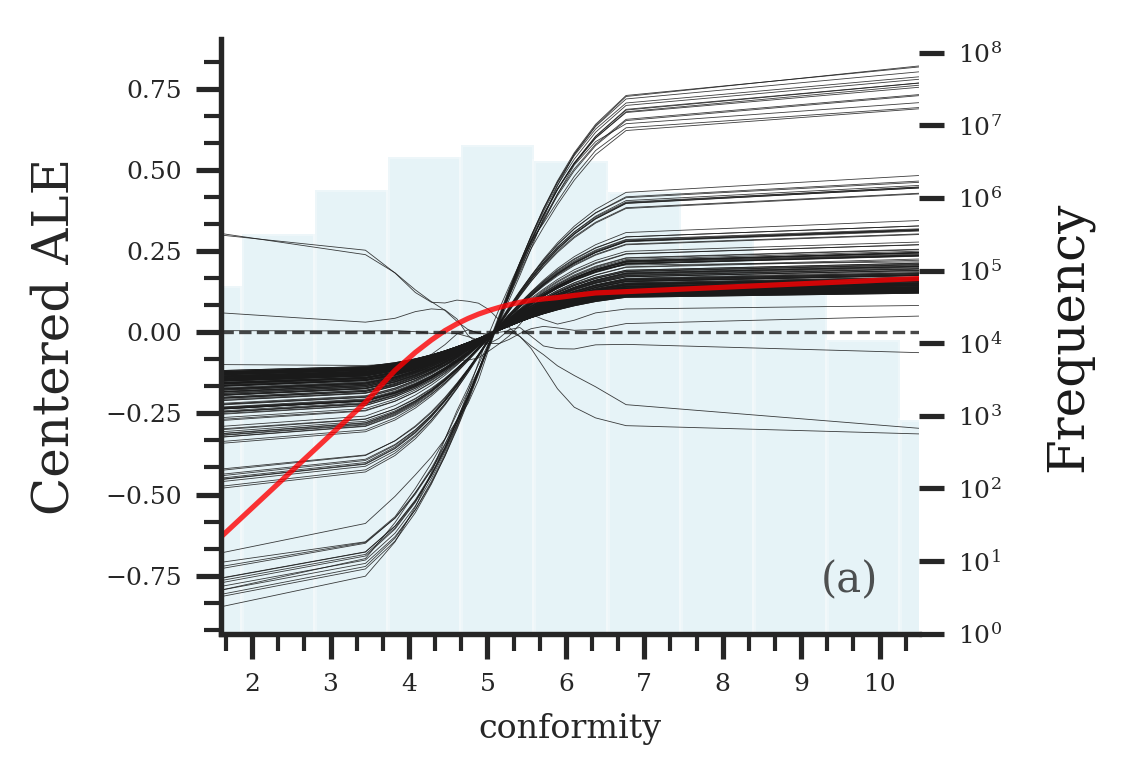

In [123]:
fig, ax = explainer.plot_ale(
                                   ale = ale_dataset,
                                   features='conformity',
                                   display_units=plotting_config.display_units,
                                   display_feature_names=plotting_config.display_feature_names,
                                   ice_curves=ice_dataset,
                                  )

## 绘制2D ALE

In [7]:
# load data and model
dataset20 = load_data("results/all_data_2020_dataset_with_substitute_confounders.h5")
# 选取32w
dataset20 = dataset_sampling(dataset20, num_select=32000)

In [ ]:
# 计算2阶交互
exp_name = "all_data_2020"
_, ale, quantiles_list = compute_ale(dataset20, 'rmsn_' + str(exp_name), b_use_predicted_confounders=True, features=['conformity','voluntary'])

In [23]:
# 构建xarray数据集
def create_2d_ale_dataset(ale_dict, quantiles_list, values, model_names, feature_names):
  
    # quantiles取平均
    centered_list = []
    for quantiles in quantiles_list:
        quantiles = (quantiles[:-1] + quantiles[1:]) / 2
        centered_list.append(quantiles)
    quantiles_list = centered_list

    # 创建data_vars字典
    data_vars = {}
    for model_name in model_names:
        ale = ale_dict[model_name]
        # ale添加一个维度
        ale = ale[np.newaxis, :]
        
        data_vars[f"{feature_names[0]}__{feature_names[1]}__{model_name}__ale"] = \
            (["n_bootstrap", f"n_bins__{feature_names[0]}", f"n_bins__{feature_names[1]}"], ale)

    for i in range(2):
        data_vars[f"{feature_names[i]}__bin_values"] = ([f"n_bins__{feature_names[i]}"], quantiles_list[i])
        data_vars[feature_names[i]] = (["n_X"], values[i].reshape(-1))

    # 创建 xarray.Dataset
    dataset = xr.Dataset(
        data_vars=data_vars,
        attrs={
            "estimator_output": "raw",
            "estimators used": model_names,
            "method": "ale",
            "dimension": "2D",
            "features used": [(feature_names[0], feature_names[1])],
        }
    )

    return dataset

In [24]:
X = [dataset20['treatments'][:,:,0], dataset20['covariates'][:,:,10]]
ale_dict = {"RNN_Model": ale.filled(np.nan)}
model_names = ["RNN_Model"]
feature_names = ['conformity','voluntary']
ale_2d = create_2d_ale_dataset(ale_dict, quantiles_list, X, model_names, feature_names)

In [25]:
ale_2d

<xarray.Dataset>
Dimensions:                                (n_bootstrap: 1,
                                            n_bins__conformity: 20,
                                            n_bins__voluntary: 5, n_X: 5152000)
Dimensions without coordinates: n_bootstrap, n_bins__conformity,
                                n_bins__voluntary, n_X
Data variables:
    conformity__voluntary__RNN_Model__ale  (n_bootstrap, n_bins__conformity, n_bins__voluntary) float64 ...
    conformity__bin_values                 (n_bins__conformity) float32 1.394...
    conformity                             (n_X) float32 4.949 5.527 ... 5.433
    voluntary__bin_values                  (n_bins__voluntary) float32 0.3466...
    voluntary                              (n_X) float32 0.0 0.0 0.0 ... 0.0 0.0
Attributes:
    estimator_output:  raw
    estimators used:   ['RNN_Model']
    method:            ale
    dimension:         2D
    features used:     [('conformity', 'voluntary')]

In [73]:
def _second_order_quant_plot(fig, ax, quantiles_list, ale, mark_empty=True, n_interp=50, **kwargs):
    # define colormap - let value 0 equals white
    min_val = np.min(ale)
    max_val = np.max(ale)
    midpoint = abs(min_val) / (abs(max_val) + abs(min_val))
    colors = [(0, "blue"), (midpoint, "white"), (1, "red")]
    linear_cmap = mcolors.LinearSegmentedColormap.from_list("my_cmap", colors)
    
    centres_list = [_get_centres(quantiles) for quantiles in quantiles_list]
    print("plotting contour...")
    n_x, n_y = _check_two_ints(n_interp)
    x = np.linspace(centres_list[0][0], centres_list[0][-1], n_x)
    y = np.linspace(centres_list[1][0], centres_list[1][-1], n_y)

    X, Y = np.meshgrid(x, y, indexing="xy")
    ale_interp = scipy.interpolate.interp2d(centres_list[0], centres_list[1], ale.T)
    # CF = ax.contourf(X, Y, ale_interp(x, y), cmap="bwr", levels=30, alpha=0.7, **kwargs)
    CF = ax.contourf(X, Y, ale_interp(x, y), cmap=linear_cmap, vmin=min_val, vmax=max_val, levels=30, alpha=0.7, **kwargs)

    if mark_empty and np.any(ale.mask):
        # Do not autoscale, so that boxes at the edges (contourf only plots the bin
        # centres, not their edges) don't enlarge the plot.
        plt.autoscale(False)
        # Add rectangles to indicate cells without samples.
        for i, j in zip(*np.where(ale.mask)):
            ax.add_patch(
                Rectangle(
                    [quantiles_list[0][i], quantiles_list[1][j]],
                    quantiles_list[0][i + 1] - quantiles_list[0][i],
                    quantiles_list[1][j + 1] - quantiles_list[1][j],
                    linewidth=1,
                    edgecolor="k",
                    facecolor="none",
                    alpha=0.4,
                )
            )
    
    # fig.colorbar(CF)
    return fig, ax, CF

In [78]:
def _ax_quantiles(ax, quantiles, twin="x"):
    
    if twin not in ("x", "y"):
        raise ValueError("'twin' should be one of 'x' or 'y'.")

    # logger.debug("Quantiles: {}.", quantiles)

    # Duplicate the 'opposite' axis so we can define a distinct set of ticks for the
    # desired axis (`twin`).
    ax_mod = ax.twiny() if twin == "x" else ax.twinx()

    # Set the new axis' ticks for the desired axis.
    getattr(ax_mod, "set_{twin}ticks".format(twin=twin))(quantiles)
    # Set the corresponding tick labels.

    # Calculate tick label percentage values for each quantile (bin edge).
    percentages = (
        100 * np.arange(len(quantiles), dtype=np.float64) / (len(quantiles) - 1)
    )

    # If there is a fractional part, add a decimal place to show (part of) it.
    fractional = (~np.isclose(percentages % 1, 0)).astype("int8")

    getattr(ax_mod, "set_{twin}ticklabels".format(twin=twin))(
        [
            "{0:0.{1}f}%".format(percent, format_fraction)
            for percent, format_fraction in zip(percentages, fractional)
        ],
        color="#545454",
        fontsize=7,
    )
    getattr(ax_mod, "set_{twin}lim".format(twin=twin))(
        getattr(ax, "get_{twin}lim".format(twin=twin))()
    )
    
    # 设置刻度线的长度
    ax_mod.tick_params(axis=twin, length=2)  # 设置刻度线长度为6

In [93]:
def add_histogram_axis(
        ax,
        data,
        bins=15,
        min_value=None,
        max_value=None,
        density=True,
        orientation="vertical",
        **kwargs,
    ):
    
        color = kwargs.get("color", "xkcd:steel")
        edgecolor = kwargs.get("edgecolor", "white")

        hist_values, bin_edges = np.histogram(data, bins=bins)
        print(hist_values, bin_edges)
        if orientation=='vertical':
            ax.bar(bin_edges[:-1], hist_values, width=np.diff(bin_edges), align='edge',
               alpha=0.35, color=color, edgecolor=edgecolor, zorder=1)
        else:
            ax.barh(bin_edges[:-1], hist_values, height=np.diff(bin_edges), align='edge',
               alpha=0.35, color=color, edgecolor=edgecolor, zorder=1)

plotting contour...
[   4043   18875   88707  326749  834015 1417341 1318876  702157  313760
   98442   26904    1989     106      28       8] [ 0.          0.77768743  1.5553749   2.3330624   3.1107497   3.8884373
  4.666125    5.4438124   6.2214994   6.999187    7.7768745   8.554562
  9.33225    10.109937   10.887625   11.665312  ]


`interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://gist.github.com/ev-br/8544371b40f414b7eaf3fe6217209bff`

        `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

        For legacy code, nearly bug-for-bug compatible replacements are
        `RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
        scattered 2D data.

        In new code, for regular grids use `RegularGridInterpolator` instead.
        For scattered data, prefer `LinearNDInterpolator` or
        `CloughTocher2DInterpolator`.

        For more details see


[4128000  288000  288000  320000  128000] [0.        0.8221747 1.6443495 2.4665241 3.288699  4.1108737]


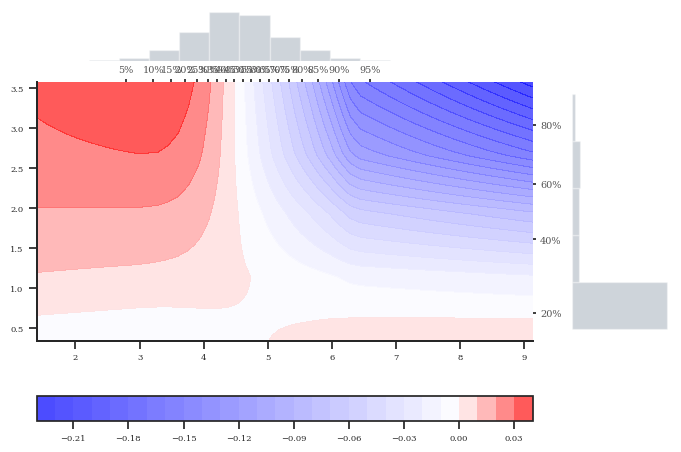

In [94]:
data = ale_2d
fig, ax = plt.subplots()
fig, ax, cf = _second_order_quant_plot(fig, ax, quantiles_list, ale)
for twin, quantiles in zip(("x", "y"), quantiles_list):
    _ax_quantiles(ax, quantiles, twin=twin)

# 创建新的轴用于绘制直方图
top_ax = ax.inset_axes([0, 1.08, 1, 0.2], transform=ax.transAxes)
rhs_ax = ax.inset_axes([1.08, 0, 0.2, 1], transform=ax.transAxes)

xdata1 = data[f"{feature_names[0]}__bin_values"].values
xdata2 = data[f"{feature_names[1]}__bin_values"].values

xdata1_hist = data[f"{feature_names[0]}"].values
xdata2_hist = data[f"{feature_names[1]}"].values

# 添加顶部的直方图
add_histogram_axis(
    top_ax,
    xdata1_hist,
    bins=15,
    orientation="vertical",
    min_value=xdata1[1],
    max_value=xdata1[-2],
    color="xkcd:steel",
    edgecolor="white"
)
# 添加右侧的直方图
add_histogram_axis(
    rhs_ax,
    xdata2_hist,
    bins=5,
    orientation="horizontal",
    min_value=xdata2[1],
    max_value=xdata2[-2],
    color="xkcd:steel",
    edgecolor="white"
)

# 设置隐藏轴线标签和框架
top_ax.xaxis.set_visible(False)
top_ax.yaxis.set_visible(False)
top_ax.spines['top'].set_visible(False)
top_ax.spines['right'].set_visible(False)
top_ax.spines['left'].set_visible(False)
top_ax.spines['bottom'].set_visible(False)
top_ax.tick_params(axis='x', which='both', labelbottom=False)
top_ax.tick_params(axis='y', which='both', labelleft=False)

rhs_ax.xaxis.set_visible(False)
rhs_ax.yaxis.set_visible(False)
rhs_ax.spines['top'].set_visible(False)
rhs_ax.spines['right'].set_visible(False)
rhs_ax.spines['left'].set_visible(False)
rhs_ax.spines['bottom'].set_visible(False)
rhs_ax.tick_params(axis='x', which='both', labelbottom=False)
rhs_ax.tick_params(axis='y', which='both', labelleft=False)


# scatter = False
# if scatter:
#     idx = np.random.choice(
#                         len(xdata1_hist), size=min(2000, len(xdata1_hist))
#                     )
#     ax.scatter(xdata1_hist[idx], xdata2_hist[idx], alpha=0.3, color="grey", s=1)
fig.colorbar(cf, ax=ax, orientation='horizontal')
plt.show()

In [28]:
xdata1_hist

array([4.948607 , 5.527403 , 5.331993 , ..., 6.1913395, 4.0101423,
       5.4330816], dtype=float32)

In [29]:
xdata2_hist

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

TypeError: Dimensions of C (20, 5) should be one smaller than X(20) and Y(5) while using shading='flat' see help(pcolormesh)

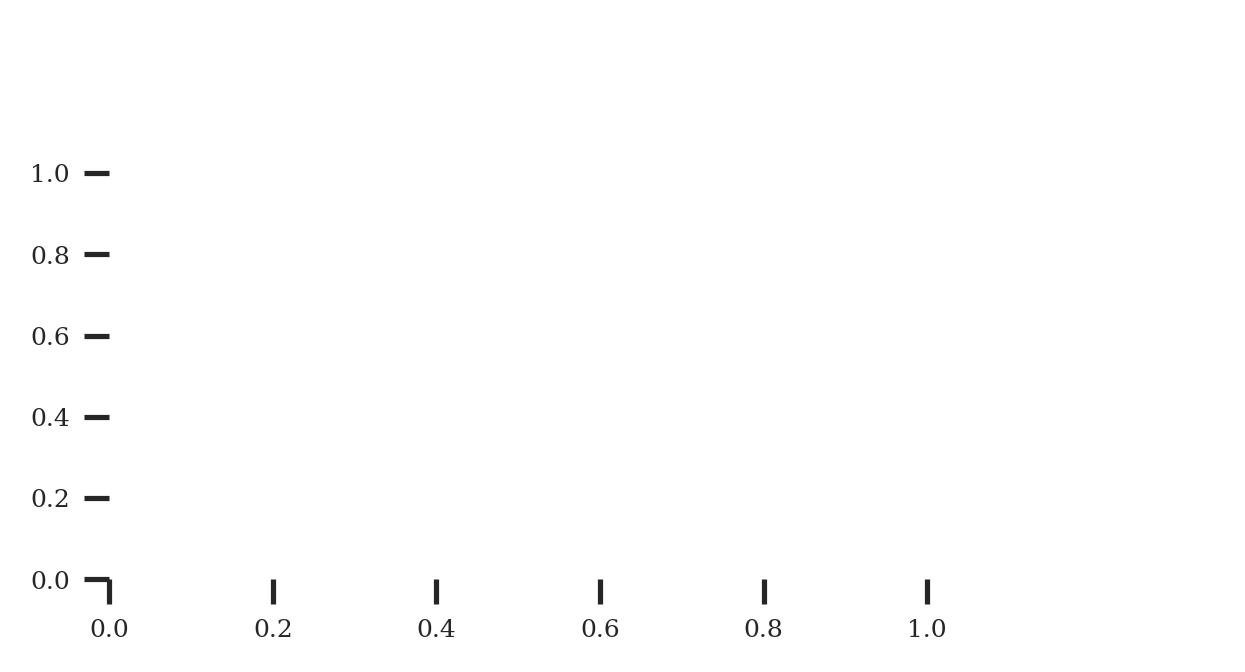

In [30]:
estimator = [('RNN_Model',RandomForestRegressor())]
explainer = skexplain.ExplainToolkit(estimator)

fig, ax = explainer.plot_ale(
                                   ale = ale_2d,
                                   features=[('conformity', 'voluntary')],
                                   estimator_names = 'RNN_Model',
                                   scatter = False,
                                   display_units=plotting_config.display_units,
                                   display_feature_names=plotting_config.display_feature_names,
                                  )

## 特征重要性（基于ALE标准差）

In [40]:
# 导入数据
dataset = load_data("../data/sample_3w2_add.h5")

index_to_remove = dataset['covariates'].shape[2] - 5
dataset['covariates'] = np.delete(dataset['covariates'], index_to_remove, axis=2)

index_to_remove = dataset['covariates'].shape[2] - 5
dataset['covariates'] = np.delete(dataset['covariates'], index_to_remove, axis=2)

for key in dataset.keys():
    print(key)
    print(dataset[key].shape)
    print(dataset[key].dtype)

covariates
(96000, 161, 23)
float32
outcomes
(96000, 161, 1)
float32
sequence_length
(96000,)
int64
treatments
(96000, 161, 1)
float32


In [41]:
# 模型编号
# exp_name = "add_ent_model_optimal_v2"
exp_name = "base_model_optimal_v2"

In [42]:
# features = ['conformity','entropy']

features = ['conformity', 'gender','age','income','weekday_0','weekday_1','weekday_2','weekday_3','weekday_4', 'weekday_5', 'weekday_6',
            'voluntary','festivals','year_0','year_1','year_2','edu','married','dist_yes','density','temperature','percipit','E1','E2']

# features = ['conformity', 'gender','age','income','weekday_0','weekday_1','weekday_2','weekday_3','weekday_4', 'weekday_5', 'weekday_6',
#             'voluntary','festivals','year_0','year_1','year_2','edu','married','dist_yes','density','entropy','temperature','percipit','E1','E2']

2024-06-06 21:27:00.436 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         3.2039437  3.6821668  3.9737926  4.201229   4.3831086
  4.5396347  4.680584   4.816735   4.9498916  5.076676   5.2116346
  5.3490934  5.49011    5.636813   5.8039975  6.0019135  6.2522807
  6.5663924  7.030119  13.235176 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.26it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.72it/s]
2024-06-06 21:27:04.418 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         3.2039437  3.6821668  3.9737926  4.201229   4.3831086
  4.5396347  4.680584   4.816735   4.9498916  5.076676   5.2116346
  5.3490934  5.49011    5.636813   5.8039975  6.0019135  6.2522807
  6.5663924  7.030119  13.235176 ].


[ 1.6019719  3.4430552  3.8279796  4.087511   4.2921686  4.4613714
  4.6101093  4.748659   4.883313   5.0132837  5.1441555  5.280364
  5.4196014  5.5634613  5.7204056  5.9029555  6.127097   6.4093366
  6.798256  10.1326475]


2024-06-06 21:27:05.378 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [0. 1.].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.40it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.46it/s]
2024-06-06 21:27:09.468 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [0. 1.].


[0.5]


2024-06-06 21:27:10.399 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [0. 2.].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.35it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.30it/s]
2024-06-06 21:27:14.601 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [0. 2.].


[1.]


2024-06-06 21:27:15.538 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [0. 1. 2. 3. 4.].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.46it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.24it/s]
2024-06-06 21:27:19.653 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [0. 1. 2. 3. 4.].


[0.5 1.5 2.5 3.5]


2024-06-06 21:27:20.586 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [0. 1.].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.43it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.78it/s]
2024-06-06 21:27:24.743 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [0. 1.].


[0.5]


2024-06-06 21:27:25.670 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [0. 1.].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.46it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.47it/s]
2024-06-06 21:27:29.755 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [0. 1.].


[0.5]


2024-06-06 21:27:30.690 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [0. 1.].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.64it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.11it/s]
2024-06-06 21:27:34.962 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [0. 1.].


[0.5]


2024-06-06 21:27:35.898 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [0. 1.].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.44it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.59it/s]
2024-06-06 21:27:40.077 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [0. 1.].


[0.5]


2024-06-06 21:27:41.010 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [0. 1.].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.78it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.39it/s]
2024-06-06 21:27:45.183 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [0. 1.].


[0.5]


2024-06-06 21:27:46.112 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [0. 1.].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.46it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.32it/s]
2024-06-06 21:27:50.245 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [0. 1.].


[0.5]


2024-06-06 21:27:51.175 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [0. 1.].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.75it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.25it/s]
2024-06-06 21:27:55.368 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [0. 1.].


[0.5]


2024-06-06 21:27:56.315 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [0.        1.3862944 4.1108737].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.33it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.16it/s]
2024-06-06 21:28:00.527 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [0.        1.3862944 4.1108737].


[0.6931472 2.748584 ]


2024-06-06 21:28:01.463 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [0. 1.].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.40it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.85it/s]
2024-06-06 21:28:05.613 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [0. 1.].


[0.5]


2024-06-06 21:28:06.557 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [0. 1.].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.19it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.22it/s]
2024-06-06 21:28:10.720 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [0. 1.].


[0.5]


2024-06-06 21:28:11.651 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [0. 1.].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.34it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.80it/s]
2024-06-06 21:28:15.824 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [0. 1.].


[0.5]


2024-06-06 21:28:16.768 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [0. 1.].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.51it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.97it/s]
2024-06-06 21:28:21.042 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [0. 1.].


[0.5]


2024-06-06 21:28:22.014 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [0.         0.20833743 0.29575667 0.34219557 0.3682047  0.39108992
 0.41106078 0.42435765 0.44568124 0.4588026  0.47000602 0.48436126
 0.49802557 0.51078796 0.5215085  0.5362224  0.5508974  0.56623685
 0.5816997  0.6024616  0.7084644 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.88it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.38it/s]
2024-06-06 21:28:26.405 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [0.         0.20833743 0.29575667 0.34219557 0.3682047  0.39108992
 0.41106078 0.42435765 0.44568124 0.4588026  0.47000602 0.48436126
 0.49802557 0.51078796 0.5215085  0.5362224  0.5508974  0.56623685
 0.5816997  0.6024616  0.7084644 ].


[0.10416871 0.25204706 0.3189761  0.35520014 0.3796473  0.40107536
 0.41770923 0.43501943 0.45224193 0.4644043  0.47718364 0.4911934
 0.50440675 0.5161482  0.52886546 0.5435599  0.55856717 0.5739683
 0.59208065 0.655463  ]


2024-06-06 21:28:27.374 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [0.        0.9223633 1.3554688 1.7001953 1.9882812 2.2421875 2.4550781
 2.6835938 2.8808594 3.0761719 3.2871094 3.5351562 3.8398438 5.234375 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.65it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.03it/s]
2024-06-06 21:28:31.799 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [0.        0.9223633 1.3554688 1.7001953 1.9882812 2.2421875 2.4550781
 2.6835938 2.8808594 3.0761719 3.2871094 3.5351562 3.8398438 5.234375 ].


[0.46118164 1.138916   1.527832   1.8442383  2.1152344  2.3486328
 2.569336   2.7822266  2.9785156  3.1816406  3.4111328  3.6875
 4.5371094 ]


2024-06-06 21:28:32.744 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [  0.          2.3946688   7.0784736  10.624343   13.7134285  16.689335
  19.753448   22.909204   25.624802   28.748297   31.089237   34.668644
  38.17778    42.79685    46.758514   52.409195   58.186974   64.90584
  69.873535   83.10578   116.92719  ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.15it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.20it/s]
2024-06-06 21:28:37.021 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [  0.          2.3946688   7.0784736  10.624343   13.7134285  16.689335
  19.753448   22.909204   25.624802   28.748297   31.089237   34.668644
  38.17778    42.79685    46.758514   52.409195   58.186974   64.90584
  69.873535   83.10578   116.92719  ].


[  1.1973344   4.7365713   8.851408   12.168886   15.201382   18.221392
  21.331326   24.267002   27.18655    29.918766   32.87894    36.42321
  40.487312   44.77768    49.583855   55.298084   61.546406   67.38969
  76.489655  100.01649  ]


2024-06-06 21:28:38.006 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [0.         0.01501407 0.02314815 0.0304013  0.03945052 0.04892622
 0.06536085 0.08179152 0.10168434 0.12037253 0.14107984 0.15989022
 0.17601852 0.20210786 0.22859623 0.25273988 0.2788561  0.30143166
 0.33486435 0.39684394 0.58154786].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.06it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.15it/s]
2024-06-06 21:28:42.478 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [0.         0.01501407 0.02314815 0.0304013  0.03945052 0.04892622
 0.06536085 0.08179152 0.10168434 0.12037253 0.14107984 0.15989022
 0.17601852 0.20210786 0.22859623 0.25273988 0.2788561  0.30143166
 0.33486435 0.39684394 0.58154786].


[0.00750704 0.01908111 0.02677472 0.03492591 0.04418837 0.05714354
 0.07357618 0.09173793 0.11102843 0.13072619 0.15048504 0.16795437
 0.18906319 0.21535204 0.24066806 0.26579797 0.29014388 0.31814802
 0.36585414 0.48919588]


More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
2024-06-06 21:28:43.477 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [11.4 15.9 17.2 18.5 19.2 20.1 20.4 20.9 21.4 22.1 22.7 23.8 24.5 25.6
 26.3 27.1 27.9 28.5 29.3 29.9 32.2].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.88it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.10it/s]
2024-06-06 21:28:48.003 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [11.4 15.9 17.2 18.5 19.2 20.1 20.4 20.9 21.4 22.1 22.7 23.8 24.5 25.6
 26.3 27.1 27.9 28.5 29.3 29.9 32.2].


[13.65     16.55     17.85     18.85     19.650002 20.25     20.65
 21.15     21.75     22.400002 23.25     24.15     25.05     25.95
 26.7      27.5      28.2      28.9      29.599998 31.05    ]


2024-06-06 21:28:48.991 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.   0.2  0.6  1.8  3.3  7.3 14.1 26.2 90.6].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.64it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.93it/s]
2024-06-06 21:28:53.455 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.   0.2  0.6  1.8  3.3  7.3 14.1 26.2 90.6].


[ 0.1       0.4       1.2       2.55      5.3      10.700001 20.150002
 58.4     ]


2024-06-06 21:28:54.409 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [0. 1.].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.31it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.43it/s]
2024-06-06 21:28:58.719 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [0. 1.].


[0.5]


2024-06-06 21:28:59.653 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [0. 1.].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.21it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.54it/s]
2024-06-06 21:29:03.959 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [0. 1.].


[0.5]


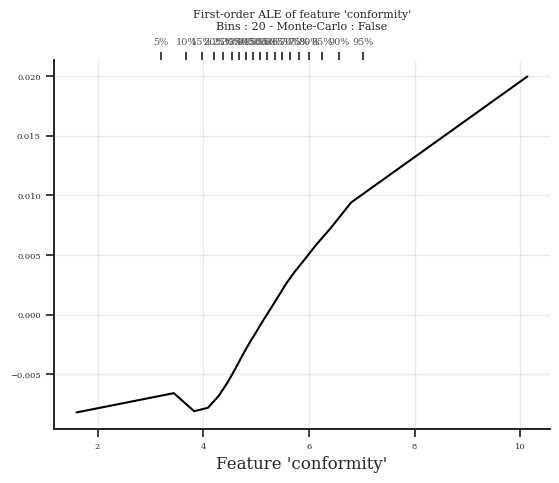

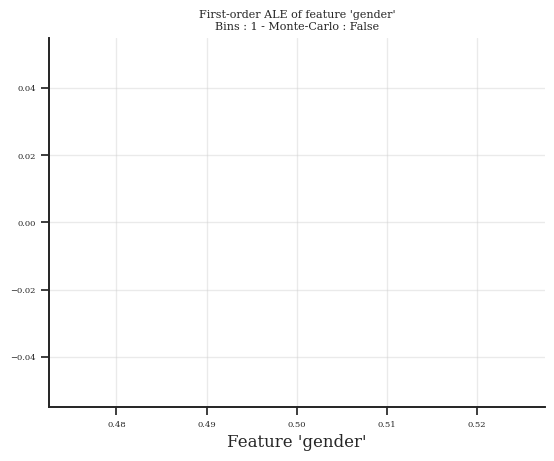

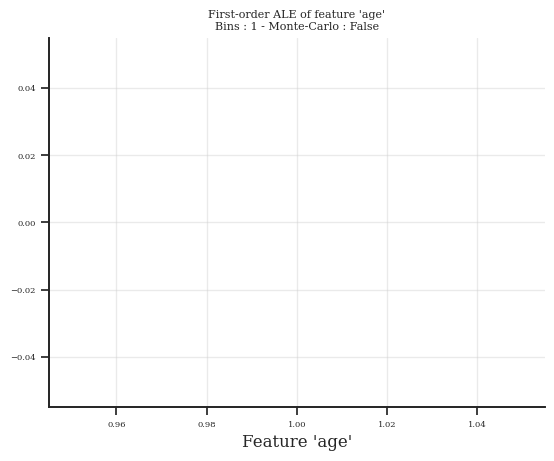

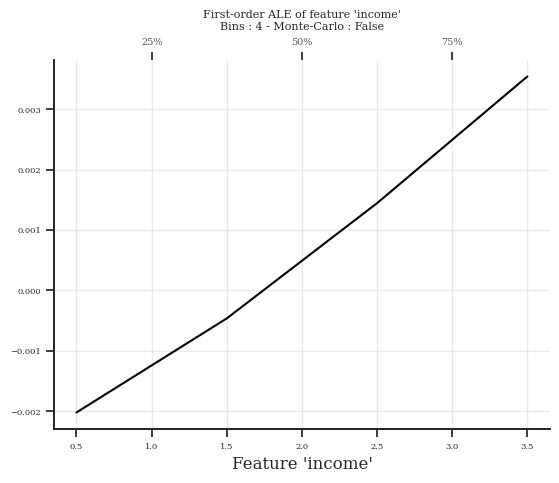

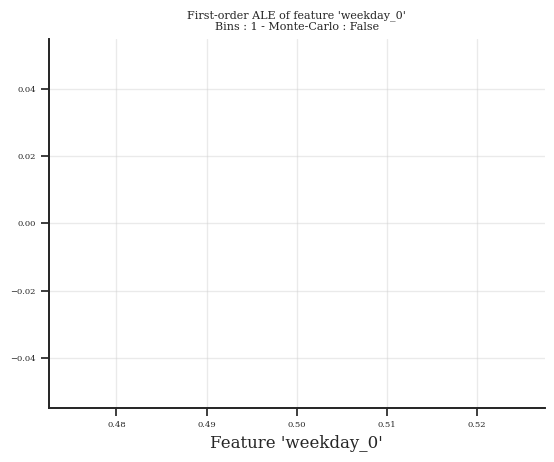

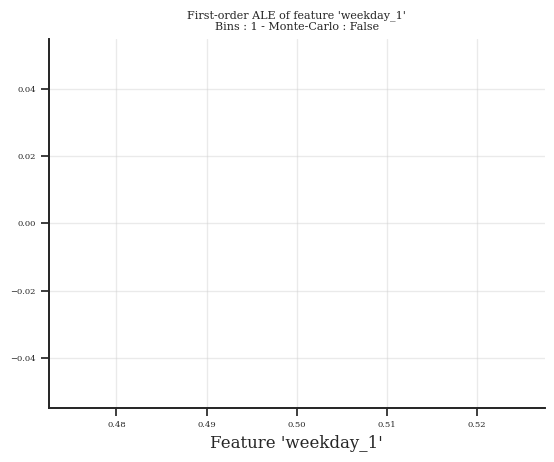

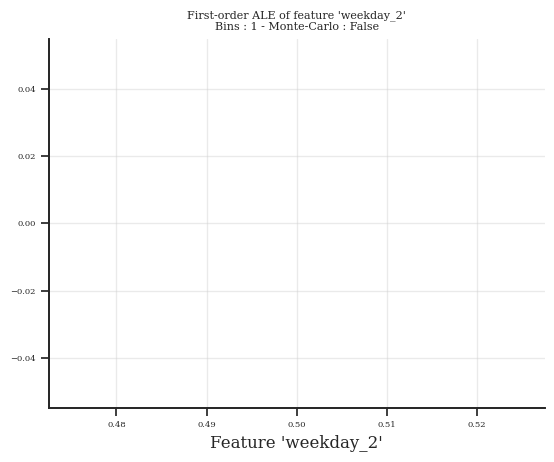

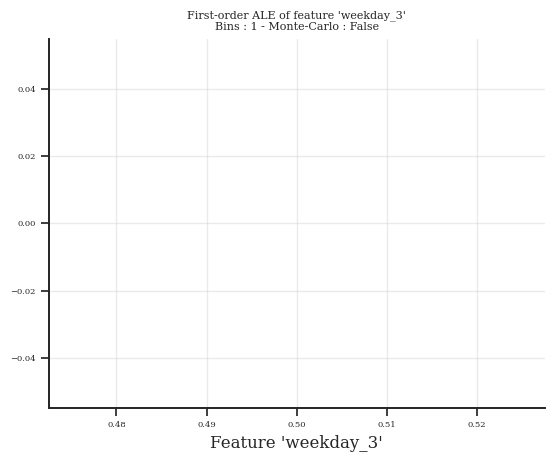

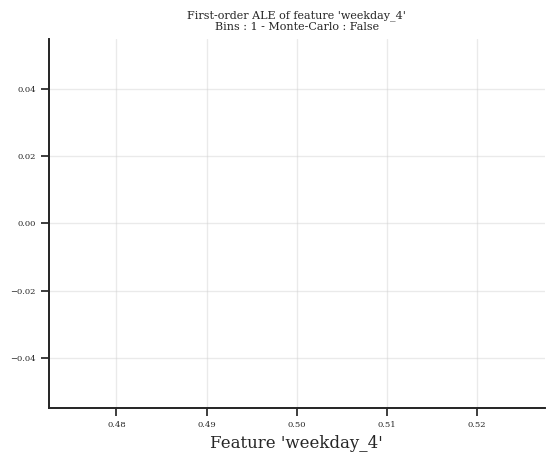

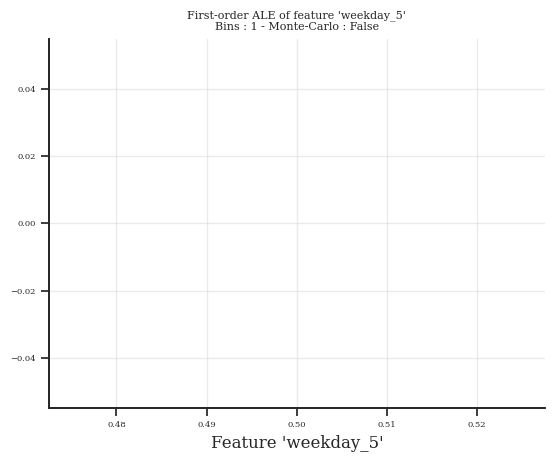

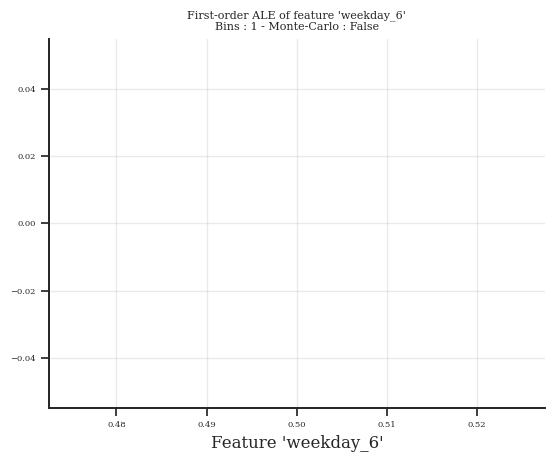

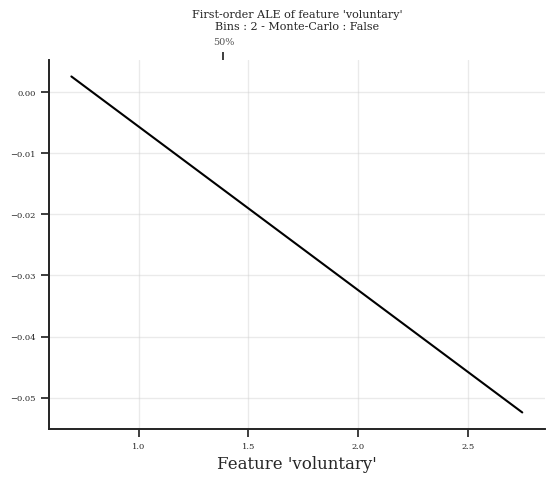

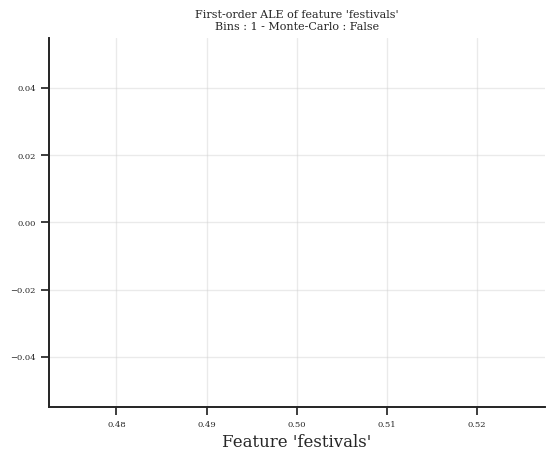

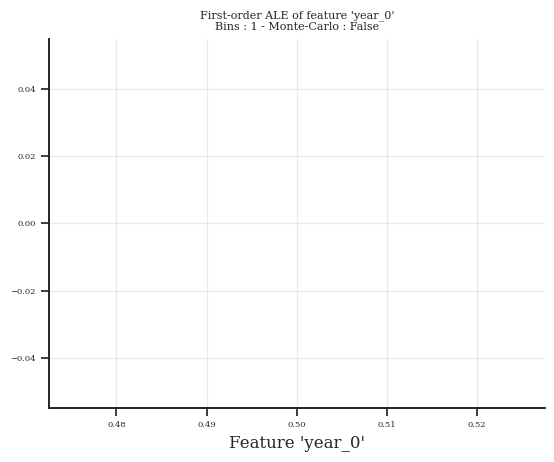

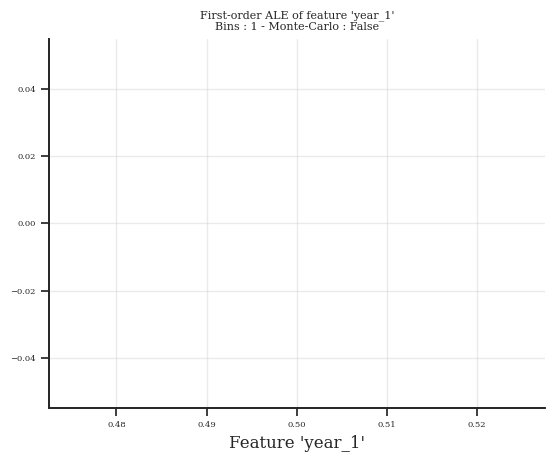

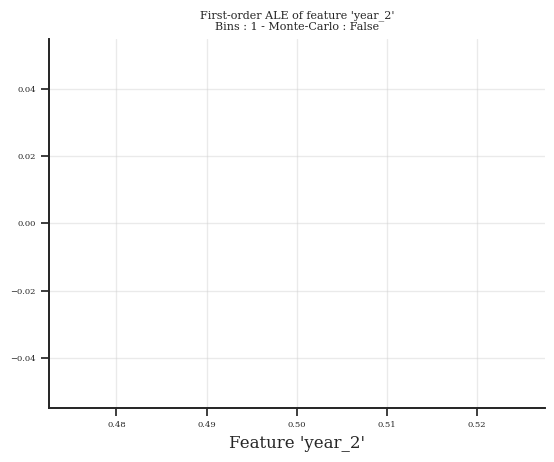

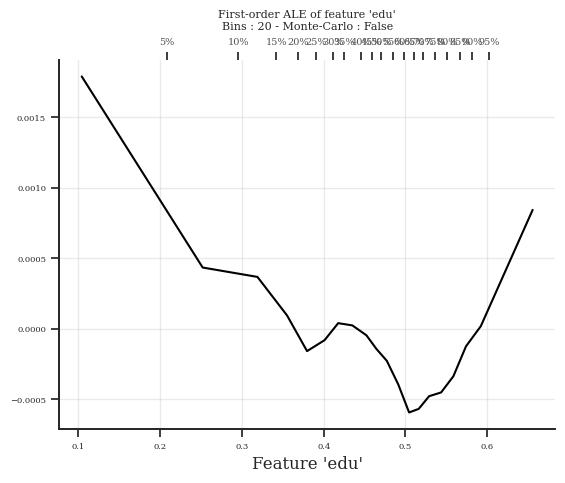

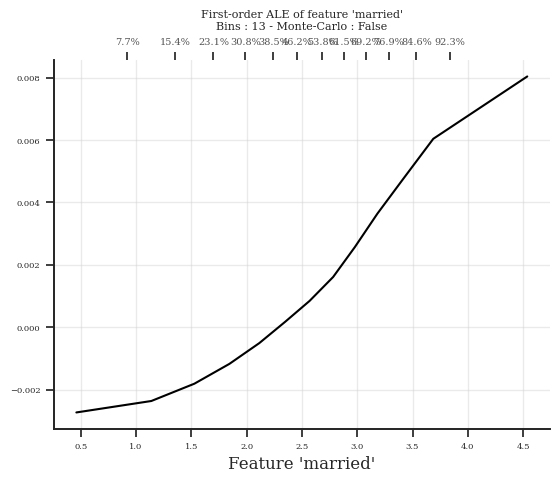

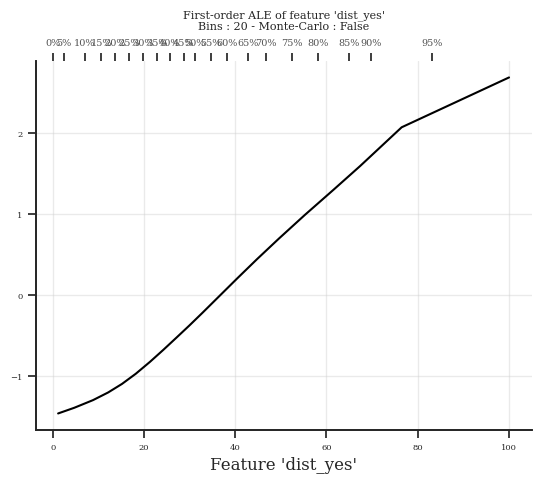

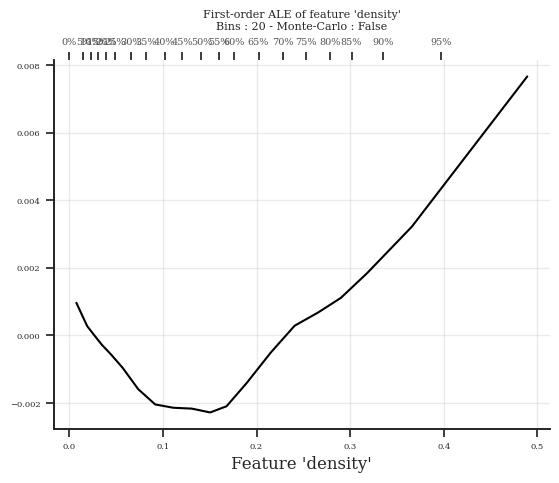

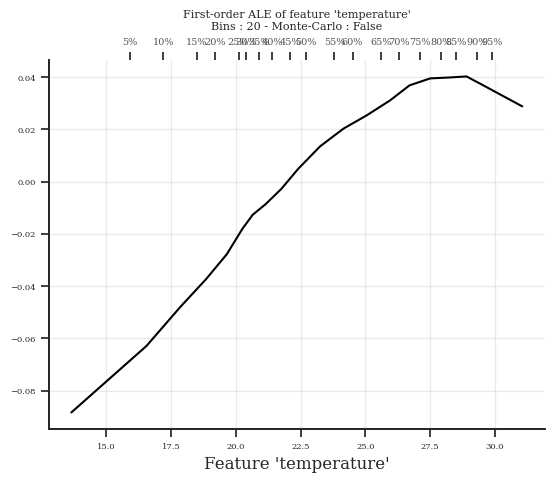

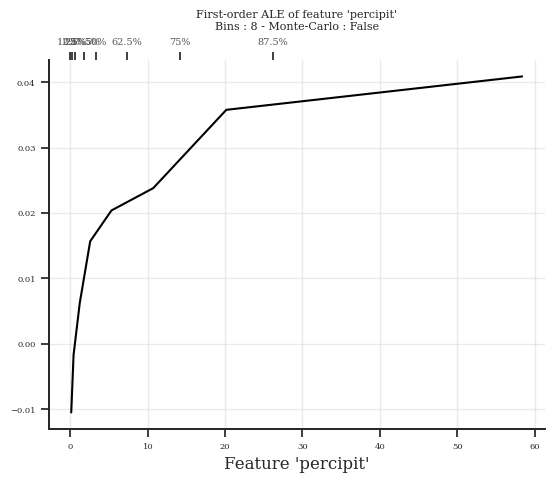

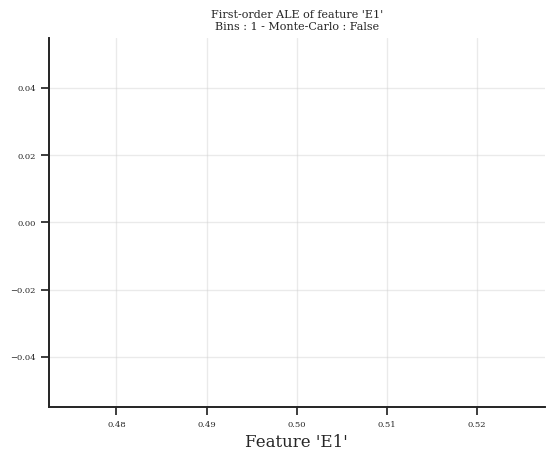

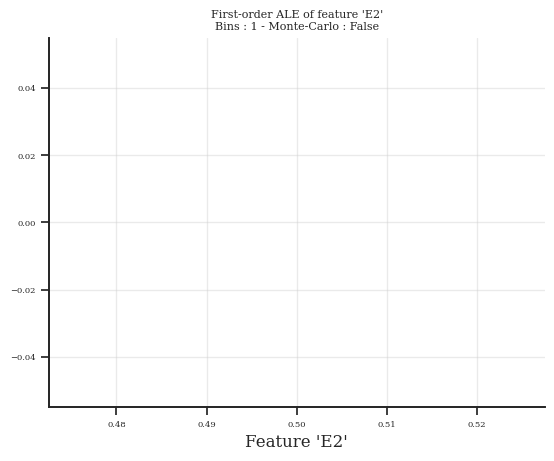

In [43]:
ALE_1ST = {}
ALE_1ST_bin = {}
feature_values = {}

for feature in features:
# for feature in ['conformity', 'gender','age','income','voluntary','festivals','edu','married','density','temperature','percipit']:
    # n_bootstrap = 1
    sub_dataset = dataset_sampling(dataset, 1000)
    # for _ in range(n_bootstrap):
    
    ale_fig, ale_1st, quantiles_tmp = compute_ale(sub_dataset, 'rmsn_'+str(exp_name), b_use_predicted_confounders=False, features = [feature])
    ALE_1ST[feature] = ale_1st
    
    quantiles_tmp = (quantiles_tmp[:-1] + quantiles_tmp[1:]) / 2
    ALE_1ST_bin[feature] = quantiles_tmp
    
    if feature == 'conformity':
        feature_values[feature]=dataset['treatments'][:,:,0]
    else:
        feature_index = features.index(feature) - 1
        feature_value = dataset['covariates'][:,:,feature_index]
        # feature_values[feature] = np.repeat(feature_value, 3, axis=0)
        feature_values[feature] = feature_value
        
        
for key in ALE_1ST.keys():
    ALE_1ST[key] = np.array(ALE_1ST[key])

for key in ALE_1ST_bin.keys():
    ALE_1ST_bin[key] = np.array(ALE_1ST_bin[key])

for key in feature_values.keys():
    feature_values[key] = np.array(feature_values[key])

# ale_dataset = create_ale_dataset(ALE_1ST, quantiles, dataset['treatments'], ['RNN_Model'], 'conformity')

In [44]:
model_name = 'RNN_Model'

data_vars = {}
for feature in features:
# for feature in ['conformity', 'gender','age','income','voluntary','festivals','edu','married','density','temperature','percipit']:
    ale = ALE_1ST[feature]
    if ale.ndim == 1:
        ale = ale[np.newaxis, :]
    data_vars[f"{feature}__{model_name}__ale"] = (["n_bootstrap", f"n_bins__{feature}"], ale)
    
    quantiles = ALE_1ST_bin[feature]
    data_vars[f"{feature}__bin_values"] = ([f"n_bins__{feature}"], quantiles)
    
    feature_value = feature_values[feature]
    if feature_value.ndim > 1:
        flattened_value = feature_value.reshape(-1)
    else:
        flattened_value = feature_value
    data_vars[feature] = (["n_X"], flattened_value)

    
ale_1d_dataset = xr.Dataset(
    data_vars=data_vars,
    #coords={
    #    "n_bootstrap": np.arange(ale.shape[0]), 
    #    f"n_bins__{feature_name}": np.arange(quantiles.shape[0]),  
    #    "n_X": np.arange(flattened_values.shape[0]),  
    #},
    attrs={
        "estimator_output": "raw",
        "estimators used": [model_name],
        "method": "ale",
        "dimension": "1D",
        "features used": features,
    }
)

for key in feature_values.keys():
    if feature_values[key].ndim > 1:
        feature_values[key] = feature_values[key].reshape(-1)
    feature_values[key] = pd.Series(feature_values[key])

X = pd.DataFrame()
X = X.assign(**feature_values)

y = pd.Series(dataset['outcomes'][:,:,0].flatten())

In [45]:
explainer = skexplain.ExplainToolkit(estimators=('RNN_Model', RandomForestRegressor()),X=X, y=y)


ale_var_1d = explainer.ale_variance(ale=ale_1d_dataset)

Degrees of freedom <= 0 for slice.


In [46]:
ale_var_1d

<xarray.Dataset>
Dimensions:                           (n_vars_ale_variance: 24, n_bootstrap: 1)
Dimensions without coordinates: n_vars_ale_variance, n_bootstrap
Data variables:
    ale_variance_rankings__RNN_Model  (n_vars_ale_variance) <U11 'dist_yes' ....
    ale_variance_scores__RNN_Model    (n_vars_ale_variance, n_bootstrap) float64 ...
Attributes:
    estimator_output:  raw
    estimators used:   ['RNN_Model']
    method:            ale_variance
    estimator output:  probability
    interaction:       False
    evaluation_fn:     sigma_ale

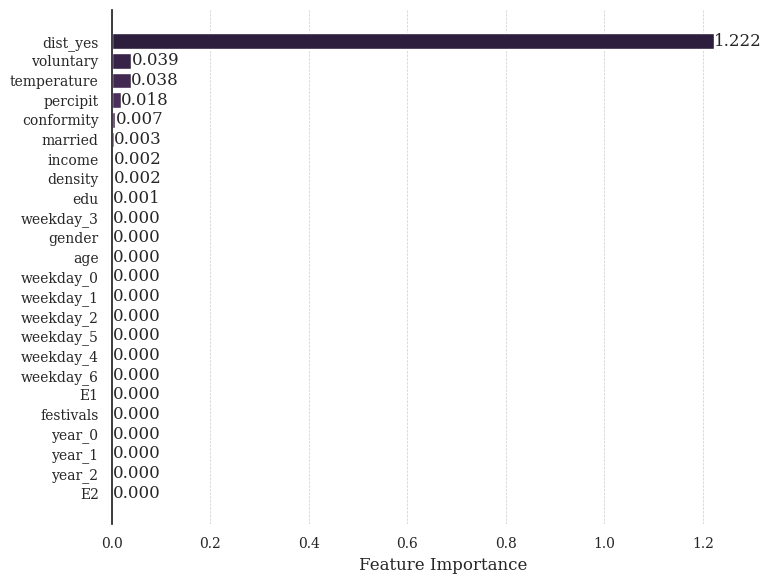

In [47]:
features_ale_var = ale_var_1d['ale_variance_rankings__RNN_Model']
scores_ale_var = ale_var_1d['ale_variance_scores__RNN_Model'][:,0]

# 生成 cubehelix 调色盘
cubehelix_palette = sns.cubehelix_palette(n_colors=len(features),reverse=True)

fig, ax = plt.subplots(figsize=(8, 6))
# 创建水平条形图
bars = ax.barh(features_ale_var, scores_ale_var, color = [cubehelix_palette[i] for i in range(0, len(features))])

for bar in bars:
    width = bar.get_width()
    label_x_pos = width + 0.001
    ax.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'{width:.3f}', va='center', ha='left')

ax.invert_yaxis()
    
ax.set_xlabel('Feature Importance')
ax.set_xlim(0, max(scores_ale_var) * 1.1)
ax.grid(True, linestyle='--', linewidth=0.5, which='major', axis='x')
ax.tick_params(axis='both', which='major', labelsize=10, tick1On=False, tick2On=False)
ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)
plt.tight_layout()

plt.savefig('./figures/fig_1a_feature_importance_all_var.png',  dpi=300)
# plt.savefig('./figures/fig_1a_feature_importance_selected_var.png',  dpi=300)


plt.show()


## 一阶ALE预测（三年整体）

In [3]:
# 导入数据
dataset = load_data("../data/sample_3w2_add.h5")

index_to_remove = dataset['covariates'].shape[2] - 5
dataset['covariates'] = np.delete(dataset['covariates'], index_to_remove, axis=2)

index_to_remove = dataset['covariates'].shape[2] - 5
dataset['covariates'] = np.delete(dataset['covariates'], index_to_remove, axis=2)

for key in dataset.keys():
    print(key)
    print(dataset[key].shape)
    print(dataset[key].dtype)

covariates
(96000, 161, 23)
float32
outcomes
(96000, 161, 1)
float32
sequence_length
(96000,)
int64
treatments
(96000, 161, 1)
float32


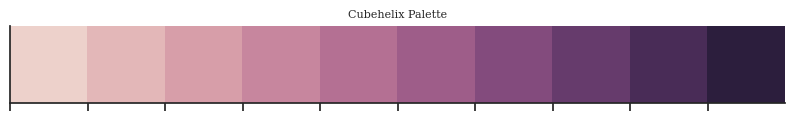

In [4]:
# 模型编号
exp_name = "base_model_optimal_v2"

# 生成 cubehelix 调色盘
cubehelix_palette = sns.cubehelix_palette(n_colors=10)
# 显示调色盘中的所有颜色
sns.palplot(cubehelix_palette)
plt.title('Cubehelix Palette')
plt.show()

the `interpolation=` argument to quantile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
2024-06-06 18:49:27.235 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         3.2165167  3.675762   3.9697833  4.1984253  4.3803034
  4.541171   4.6855083  4.822077   4.954372   5.0869555  5.2132745
  5.3400874  5.468778   5.610711   5.7636223  5.940614   6.150145
  6.446803   6.944569  11.74844  ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 0it [00:00, ?it/s]2024-06-06 18:49:28.572089: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
Predicting rnn_propensity_weighted: 16it [00:01, 14.27it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.87it/s]
2024-06-06 18:49:31.361 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         3.2165167  3.675762   3.9697833  4.1984253  4.3803034
  4.541171   4.6855083  4.822077   4.954372   5.0869555  5.2132745
  5.3400874  5.468778   5.610711   5.7636223  5.940614   6.150145
  6.446803   6.944569  11.74844  ].


[1.6082584 3.4461393 3.8227725 4.0841045 4.2893643 4.460737  4.6133394
 4.753793  4.8882246 5.0206637 5.150115  5.276681  5.404433  5.5397444
 5.6871667 5.8521185 6.0453796 6.2984743 6.6956863 9.346504 ]


2024-06-06 18:49:32.461 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         3.1957955  3.6671546  3.9757938  4.2019534  4.3854203
  4.5491695  4.689807   4.8268733  4.9545145  5.0806437  5.2158012
  5.3453903  5.480943   5.6187396  5.7773743  5.9697094  6.1983657
  6.499978   6.970648  12.180914 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.26it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.13it/s]
2024-06-06 18:49:36.192 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         3.1957955  3.6671546  3.9757938  4.2019534  4.3854203
  4.5491695  4.689807   4.8268733  4.9545145  5.0806437  5.2158012
  5.3453903  5.480943   5.6187396  5.7773743  5.9697094  6.1983657
  6.499978   6.970648  12.180914 ].


[1.5978978 3.4314752 3.821474  4.088874  4.293687  4.4672947 4.6194882
 4.75834   4.8906937 5.017579  5.1482224 5.280596  5.413167  5.5498414
 5.698057  5.873542  6.084038  6.3491716 6.735313  9.575781 ]


2024-06-06 18:49:37.311 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         3.247492   3.7027178  4.0105     4.2360697  4.420003
  4.5844913  4.726842   4.8602295  4.990213   5.117226   5.2430353
  5.3747535  5.515673   5.6651773  5.846286   6.046232   6.2897267
  6.595304   7.0463753 13.565665 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.28it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.52it/s]
2024-06-06 18:49:41.072 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         3.247492   3.7027178  4.0105     4.2360697  4.420003
  4.5844913  4.726842   4.8602295  4.990213   5.117226   5.2430353
  5.3747535  5.515673   5.6651773  5.846286   6.046232   6.2897267
  6.595304   7.0463753 13.565665 ].


[ 1.623746   3.4751048  3.8566089  4.123285   4.3280363  4.502247
  4.6556664  4.7935357  4.9252214  5.0537195  5.180131   5.308894
  5.4452133  5.5904255  5.7557316  5.946259   6.1679792  6.4425154
  6.82084   10.306021 ]


2024-06-06 18:49:42.174 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         3.2185261  3.6846216  3.9890249  4.207013   4.3801336
  4.533264   4.675769   4.8131194  4.946834   5.0803413  5.2137623
  5.3530583  5.4979486  5.6478667  5.8180914  6.0103083  6.245361
  6.54885    6.9878454 13.557776 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.30it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.74it/s]
2024-06-06 18:49:45.998 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         3.2185261  3.6846216  3.9890249  4.207013   4.3801336
  4.533264   4.675769   4.8131194  4.946834   5.0803413  5.2137623
  5.3530583  5.4979486  5.6478667  5.8180914  6.0103083  6.245361
  6.54885    6.9878454 13.557776 ].


[ 1.6092631  3.4515738  3.8368232  4.098019   4.2935734  4.456699
  4.6045165  4.744444   4.8799767  5.013588   5.147052   5.28341
  5.4255037  5.5729074  5.732979   5.9142     6.1278343  6.397105
  6.7683477 10.272811 ]


2024-06-06 18:49:47.121 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         3.2712011  3.729539   4.0088744  4.223266   4.3950787
  4.5475845  4.684398   4.812694   4.9407177  5.066116   5.1919346
  5.319439   5.4573545  5.6056995  5.7652755  5.952837   6.1822925
  6.4986963  6.947611  12.17737  ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.68it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.93it/s]
2024-06-06 18:49:50.974 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         3.2712011  3.729539   4.0088744  4.223266   4.3950787
  4.5475845  4.684398   4.812694   4.9407177  5.066116   5.1919346
  5.319439   5.4573545  5.6056995  5.7652755  5.952837   6.1822925
  6.4986963  6.947611  12.17737  ].


[1.6356006 3.50037   3.8692067 4.1160703 4.3091726 4.4713316 4.6159916
 4.748546  4.876706  5.003417  5.1290255 5.2556868 5.3883967 5.531527
 5.6854877 5.8590565 6.067565  6.340494  6.7231536 9.56249  ]


2024-06-06 18:49:52.163 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         3.193925   3.6429534  3.9374244  4.1605473  4.345438
  4.506146   4.6635547  4.8043756  4.9352036  5.0600657  5.1851206
  5.3121305  5.447087   5.5931587  5.749973   5.9418836  6.195502
  6.5272346  7.0287833 13.333468 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.21it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.15it/s]
2024-06-06 18:49:56.085 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         3.193925   3.6429534  3.9374244  4.1605473  4.345438
  4.506146   4.6635547  4.8043756  4.9352036  5.0600657  5.1851206
  5.3121305  5.447087   5.5931587  5.749973   5.9418836  6.195502
  6.5272346  7.0287833 13.333468 ].


[ 1.5969625  3.4184391  3.7901888  4.048986   4.2529926  4.4257917
  4.5848503  4.733965   4.8697896  4.997635   5.122593   5.2486258
  5.3796086  5.5201225  5.671566   5.845928   6.0686927  6.361368
  6.778009  10.181126 ]


2024-06-06 18:49:57.272 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         3.1728544  3.6476314  3.933224   4.1543727  4.341895
  4.512046   4.6647263  4.803139   4.9312806  5.061696   5.1889286
  5.322361   5.4614387  5.608521   5.7728167  5.960507   6.1966496
  6.497615   6.9446483 12.574203 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.97it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.37it/s]
2024-06-06 18:50:01.084 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         3.1728544  3.6476314  3.933224   4.1543727  4.341895
  4.512046   4.6647263  4.803139   4.9312806  5.061696   5.1889286
  5.322361   5.4614387  5.608521   5.7728167  5.960507   6.1966496
  6.497615   6.9446483 12.574203 ].


[1.5864272 3.410243  3.7904277 4.0437984 4.2481337 4.4269705 4.588386
 4.7339325 4.86721   4.9964886 5.1253123 5.255645  5.3919    5.53498
 5.690669  5.866662  6.078578  6.347132  6.7211313 9.759425 ]


2024-06-06 18:50:02.220 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         3.2218497  3.681917   3.9785898  4.208212   4.4002166
  4.564387   4.717963   4.864523   4.9991956  5.1279244  5.2582226
  5.398431   5.5408545  5.6852207  5.8449864  6.0351214  6.259392
  6.5556564  7.010465  12.261133 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.17it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.99it/s]
2024-06-06 18:50:06.131 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         3.2218497  3.681917   3.9785898  4.208212   4.4002166
  4.564387   4.717963   4.864523   4.9991956  5.1279244  5.2582226
  5.398431   5.5408545  5.6852207  5.8449864  6.0351214  6.259392
  6.5556564  7.010465  12.261133 ].


[1.6109248 3.4518833 3.8302534 4.093401  4.3042145 4.4823017 4.6411753
 4.791243  4.931859  5.06356   5.1930733 5.3283267 5.4696426 5.6130376
 5.7651033 5.940054  6.147257  6.407524  6.783061  9.635799 ]


2024-06-06 18:50:07.290 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         3.1976185  3.6895125  3.9878705  4.213053   4.3987603
  4.560768   4.70667    4.848398   4.985391   5.114495   5.24792
  5.3852167  5.5258837  5.6772738  5.8428125  6.0311737  6.266693
  6.5981545  7.063118  12.161499 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.52it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.84it/s]
2024-06-06 18:50:11.137 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         3.1976185  3.6895125  3.9878705  4.213053   4.3987603
  4.560768   4.70667    4.848398   4.985391   5.114495   5.24792
  5.3852167  5.5258837  5.6772738  5.8428125  6.0311737  6.266693
  6.5981545  7.063118  12.161499 ].


[1.5988092 3.4435654 3.8386915 4.100462  4.305907  4.479764  4.633719
 4.777534  4.916895  5.049943  5.1812077 5.3165684 5.45555   5.6015787
 5.760043  5.936993  6.1489334 6.4324236 6.830636  9.6123085]


2024-06-06 18:50:12.304 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         3.197543   3.6719522  3.9583967  4.1737943  4.359237
  4.5184016  4.666452   4.8083754  4.941568   5.0698295  5.196787
  5.329617   5.4671636  5.6083446  5.767241   5.953379   6.193044
  6.503633   6.970187  13.250521 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.19it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.06it/s]
2024-06-06 18:50:16.254 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         3.197543   3.6719522  3.9583967  4.1737943  4.359237
  4.5184016  4.666452   4.8083754  4.941568   5.0698295  5.196787
  5.329617   5.4671636  5.6083446  5.767241   5.953379   6.193044
  6.503633   6.970187  13.250521 ].


[ 1.5987715  3.4347477  3.8151746  4.0660954  4.2665157  4.4388194
  4.592427   4.7374134  4.8749714  5.0056987  5.1333084  5.2632017
  5.3983903  5.537754   5.687793   5.86031    6.0732117  6.3483386
  6.73691   10.110353 ]


2024-06-06 18:50:17.376 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.02105341  3.2123153   3.6969256   3.989525    4.223971    4.4103804
  4.5650687   4.715202    4.8597107   4.995862    5.1291375   5.259584
  5.389273    5.5230384   5.6695614   5.833896    6.0283737   6.273625
  6.5624332   7.0234103  11.822988  ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.23it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.27it/s]
2024-06-06 18:50:21.229 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.02105341  3.2123153   3.6969256   3.989525    4.223971    4.4103804
  4.5650687   4.715202    4.8597107   4.995862    5.1291375   5.259584
  5.389273    5.5230384   5.6695614   5.833896    6.0283737   6.273625
  6.5624332   7.0234103  11.822988  ].


[1.6166843 3.4546204 3.8432255 4.106748  4.317176  4.4877243 4.6401353
 4.7874565 4.9277864 5.0625    5.1943607 5.3244286 5.456156  5.5963
 5.751729  5.931135  6.150999  6.418029  6.792922  9.423199 ]


2024-06-06 18:50:22.436 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.10701573  3.253861    3.718968    4.0130634   4.2237535   4.3952417
  4.548357    4.6887136   4.8252716   4.9533186   5.0751877   5.2024765
  5.3408937   5.48489     5.635321    5.802528    6.000296    6.2524905
  6.5837245   7.032704   12.410282  ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.94it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.24it/s]
2024-06-06 18:50:26.408 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.10701573  3.253861    3.718968    4.0130634   4.2237535   4.3952417
  4.548357    4.6887136   4.8252716   4.9533186   5.0751877   5.2024765
  5.3408937   5.48489     5.635321    5.802528    6.000296    6.2524905
  6.5837245   7.032704   12.410282  ].


[1.6804383 3.4864144 3.8660157 4.118408  4.309498  4.4717994 4.618535
 4.7569923 4.889295  5.014253  5.138832  5.271685  5.412892  5.5601053
 5.7189245 5.901412  6.1263933 6.4181075 6.808214  9.721493 ]


2024-06-06 18:50:27.591 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         3.2243977  3.6894846  3.9774795  4.188689   4.3589444
  4.5168576  4.663639   4.8009534  4.933839   5.0670466  5.2033467
  5.3327746  5.4672236  5.6170444  5.7883983  5.979283   6.2283907
  6.5413947  7.0349755 13.351713 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.06it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.58it/s]
2024-06-06 18:50:31.580 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         3.2243977  3.6894846  3.9774795  4.188689   4.3589444
  4.5168576  4.663639   4.8009534  4.933839   5.0670466  5.2033467
  5.3327746  5.4672236  5.6170444  5.7883983  5.979283   6.2283907
  6.5413947  7.0349755 13.351713 ].


[ 1.6121988  3.4569411  3.833482   4.083084   4.273817   4.437901
  4.590248   4.732296   4.8673964  5.0004425  5.1351967  5.2680607
  5.399999   5.5421343  5.7027216  5.8838406  6.103837   6.3848925
  6.788185  10.193344 ]


2024-06-06 18:50:32.788 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         3.1753328  3.6739922  3.9832418  4.21693    4.4028807
  4.5588675  4.702209   4.82994    4.951574   5.0750012  5.2013254
  5.334014   5.475507   5.6251903  5.7924137  5.977598   6.215429
  6.5102625  6.9625664 11.542979 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.82it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.13it/s]
2024-06-06 18:50:36.675 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         3.1753328  3.6739922  3.9832418  4.21693    4.4028807
  4.5588675  4.702209   4.82994    4.951574   5.0750012  5.2013254
  5.334014   5.475507   5.6251903  5.7924137  5.977598   6.215429
  6.5102625  6.9625664 11.542979 ].


[1.5876664 3.4246626 3.828617  4.1000857 4.309905  4.480874  4.630538
 4.766074  4.8907566 5.0132875 5.1381636 5.2676697 5.4047604 5.5503483
 5.708802  5.885006  6.0965137 6.3628454 6.7364144 9.252773 ]


2024-06-06 18:50:37.809 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         3.1268964  3.6055279  3.9108078  4.145476   4.3355355
  4.5011673  4.645333   4.7788386  4.9085617  5.03734    5.1660933
  5.292374   5.4313655  5.577566   5.7316236  5.9145756  6.150244
  6.4654737  6.946938  12.412481 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.69it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.19it/s]
2024-06-06 18:50:41.633 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         3.1268964  3.6055279  3.9108078  4.145476   4.3355355
  4.5011673  4.645333   4.7788386  4.9085617  5.03734    5.1660933
  5.292374   5.4313655  5.577566   5.7316236  5.9145756  6.150244
  6.4654737  6.946938  12.412481 ].


[1.5634482 3.3662121 3.7581677 4.028142  4.2405057 4.418351  4.57325
 4.7120857 4.8437004 4.972951  5.101717  5.2292337 5.36187   5.504466
 5.654595  5.8230996 6.0324097 6.307859  6.706206  9.679709 ]


2024-06-06 18:50:42.772 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         3.2368994  3.6857457  3.960901   4.172904   4.355904
  4.52294    4.672282   4.8171353  4.953202   5.0847597  5.222182
  5.353508   5.4911456  5.6412373  5.8000937  5.992218   6.2231727
  6.5271177  6.9685235 13.195486 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.42it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.16it/s]
2024-06-06 18:50:46.563 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         3.2368994  3.6857457  3.960901   4.172904   4.355904
  4.52294    4.672282   4.8171353  4.953202   5.0847597  5.222182
  5.353508   5.4911456  5.6412373  5.8000937  5.992218   6.2231727
  6.5271177  6.9685235 13.195486 ].


[ 1.6184497  3.4613225  3.8233232  4.0669026  4.2644043  4.439422
  4.5976114  4.744709   4.8851686  5.018981   5.153471   5.2878447
  5.422327   5.5661917  5.7206655  5.896156   6.1076956  6.375145
  6.747821  10.082005 ]


2024-06-06 18:50:47.718 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         3.2346492  3.6919448  3.9910667  4.2204466  4.403566
  4.5623684  4.7073903  4.842307   4.9711924  5.096272   5.219234
  5.3459716  5.480059   5.6182394  5.777342   5.9581413  6.1846347
  6.4856496  6.9478526 11.730381 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.18it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.13it/s]
2024-06-06 18:50:51.602 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         3.2346492  3.6919448  3.9910667  4.2204466  4.403566
  4.5623684  4.7073903  4.842307   4.9711924  5.096272   5.219234
  5.3459716  5.480059   5.6182394  5.777342   5.9581413  6.1846347
  6.4856496  6.9478526 11.730381 ].


[1.6173246 3.463297  3.8415058 4.1057568 4.312006  4.4829674 4.634879
 4.774849  4.9067497 5.0337324 5.157753  5.282603  5.4130154 5.5491495
 5.6977906 5.8677416 6.0713882 6.335142  6.716751  9.339117 ]


2024-06-06 18:50:52.787 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         3.1813242  3.6587424  3.9567852  4.176507   4.3593926
  4.5267663  4.6760917  4.8059716  4.932073   5.0594378  5.183161
  5.3076262  5.44497    5.6010337  5.77462    5.9681535  6.208761
  6.5141215  6.9887743 13.565665 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.66it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.32it/s]
2024-06-06 18:50:56.628 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         3.1813242  3.6587424  3.9567852  4.176507   4.3593926
  4.5267663  4.6760917  4.8059716  4.932073   5.0594378  5.183161
  5.3076262  5.44497    5.6010337  5.77462    5.9681535  6.208761
  6.5141215  6.9887743 13.565665 ].


[ 1.5906621  3.4200335  3.8077638  4.066646   4.26795    4.4430795
  4.601429   4.7410316  4.8690224  4.995755   5.1212993  5.2453938
  5.376298   5.5230017  5.687827   5.8713865  6.088457   6.3614416
  6.7514477 10.27722  ]


2024-06-06 18:50:57.794 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         3.269234   3.7117927  4.001489   4.2227182  4.4040647
  4.562091   4.7030745  4.8351493  4.964218   5.0903587  5.219605
  5.349969   5.482999   5.6204944  5.788028   5.984845   6.2171984
  6.5212445  6.976929  11.964804 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.32it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.39it/s]
2024-06-06 18:51:01.617 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         3.269234   3.7117927  4.001489   4.2227182  4.4040647
  4.562091   4.7030745  4.8351493  4.964218   5.0903587  5.219605
  5.349969   5.482999   5.6204944  5.788028   5.984845   6.2171984
  6.5212445  6.976929  11.964804 ].


[1.634617  3.4905133 3.8566408 4.1121035 4.3133917 4.483078  4.6325827
 4.7691116 4.899684  5.0272884 5.1549816 5.284787  5.416484  5.5517464
 5.704261  5.8864365 6.101022  6.3692217 6.749087  9.470866 ]


2024-06-06 18:51:02.755 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         3.2351773  3.681734   3.9786289  4.2036715  4.3860617
  4.5522733  4.699316   4.8369856  4.968546   5.0966725  5.2239356
  5.3568506  5.496953   5.6445966  5.806913   5.9838786  6.2025776
  6.476672   6.936519  13.313993 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.27it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.20it/s]
2024-06-06 18:51:06.635 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         3.2351773  3.681734   3.9786289  4.2036715  4.3860617
  4.5522733  4.699316   4.8369856  4.968546   5.0966725  5.2239356
  5.3568506  5.496953   5.6445966  5.806913   5.9838786  6.2025776
  6.476672   6.936519  13.313993 ].


[ 1.6175886  3.4584556  3.8301816  4.0911503  4.2948666  4.4691677
  4.6257944  4.768151   4.9027658  5.032609   5.160304   5.290393
  5.426902   5.570775   5.7257547  5.8953958  6.0932283  6.339625
  6.7065954 10.125257 ]


More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
2024-06-06 18:51:07.780 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         3.2756379  3.7155428  4.0014954  4.213373   4.392252
  4.5513334  4.698231   4.837034   4.964208   5.09074    5.217721
  5.3472347  5.479463   5.621629   5.783555   5.9700565  6.1946883
  6.4970765  6.9898667 12.082724 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.45it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.22it/s]
2024-06-06 18:51:11.602 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         3.2756379  3.7155428  4.0014954  4.213373   4.392252
  4.5513334  4.698231   4.837034   4.964208   5.09074    5.217721
  5.3472347  5.479463   5.621629   5.783555   5.9700565  6.1946883
  6.4970765  6.9898667 12.082724 ].


[1.6378189 3.4955902 3.858519  4.1074343 4.3028126 4.4717927 4.6247826
 4.7676325 4.9006214 5.0274744 5.1542306 5.282478  5.413349  5.550546
 5.702592  5.876806  6.0823727 6.3458824 6.7434716 9.536295 ]


2024-06-06 18:51:12.744 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         3.1940496  3.6634045  3.9527645  4.1786294  4.3607655
  4.5178003  4.656349   4.787995   4.9174476  5.0373793  5.157079
  5.286825   5.420339   5.562405   5.7185607  5.905637   6.139988
  6.441805   6.9514184 12.261133 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.25it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.65it/s]
2024-06-06 18:51:16.588 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         3.1940496  3.6634045  3.9527645  4.1786294  4.3607655
  4.5178003  4.656349   4.787995   4.9174476  5.0373793  5.157079
  5.286825   5.420339   5.562405   5.7185607  5.905637   6.139988
  6.441805   6.9514184 12.261133 ].


[1.5970248 3.4287271 3.8080845 4.0656967 4.269697  4.439283  4.5870748
 4.722172  4.852721  4.977413  5.097229  5.2219524 5.3535824 5.491372
 5.640483  5.8120985 6.0228124 6.2908964 6.6966114 9.606276 ]


2024-06-06 18:51:17.556 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         3.191535   3.6394472  3.953271   4.1802974  4.3661523
  4.524027   4.6727448  4.8039746  4.9311047  5.058612   5.1879363
  5.316613   5.4505076  5.596226   5.754863   5.9423246  6.16943
  6.483719   6.947959  11.822988 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.49it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.34it/s]
2024-06-06 18:51:21.504 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         3.191535   3.6394472  3.953271   4.1802974  4.3661523
  4.524027   4.6727448  4.8039746  4.9311047  5.058612   5.1879363
  5.316613   5.4505076  5.596226   5.754863   5.9423246  6.16943
  6.483719   6.947959  11.822988 ].


[1.5957675 3.415491  3.796359  4.066784  4.273225  4.4450893 4.598386
 4.7383595 4.8675394 4.9948583 5.123274  5.2522745 5.38356   5.523367
 5.6755447 5.8485937 6.055877  6.3265743 6.715839  9.385473 ]


2024-06-06 18:51:22.470 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         3.2515283  3.694874   3.9824877  4.2069125  4.3905334
  4.5469785  4.689918   4.821724   4.9451575  5.067027   5.189745
  5.321651   5.4626575  5.607291   5.774468   5.9613543  6.196229
  6.5044537  6.9701266 11.189008 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.68it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.19it/s]
2024-06-06 18:51:26.550 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         3.2515283  3.694874   3.9824877  4.2069125  4.3905334
  4.5469785  4.689918   4.821724   4.9451575  5.067027   5.189745
  5.321651   5.4626575  5.607291   5.774468   5.9613543  6.196229
  6.5044537  6.9701266 11.189008 ].


[1.6257641 3.4732013 3.8386807 4.0947    4.298723  4.4687557 4.6184483
 4.755821  4.883441  5.006092  5.128386  5.255698  5.392154  5.534974
 5.69088   5.8679113 6.0787916 6.3503413 6.7372904 9.079567 ]


2024-06-06 18:51:27.506 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         3.2264433  3.6822333  3.9678724  4.1940384  4.373246
  4.533227   4.677145   4.813713   4.944898   5.0745344  5.1961923
  5.3301005  5.463409   5.611767   5.776086   5.978219   6.217538
  6.5341554  7.0239654 11.802388 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.26it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.33it/s]
2024-06-06 18:51:31.487 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         3.2264433  3.6822333  3.9678724  4.1940384  4.373246
  4.533227   4.677145   4.813713   4.944898   5.0745344  5.1961923
  5.3301005  5.463409   5.611767   5.776086   5.978219   6.217538
  6.5341554  7.0239654 11.802388 ].


[1.6132216 3.4543383 3.8250527 4.0809555 4.2836423 4.4532366 4.605186
 4.745429  4.879306  5.009716  5.1353636 5.2631464 5.3967547 5.537588
 5.6939263 5.8771524 6.0978785 6.375847  6.7790604 9.413177 ]


2024-06-06 18:51:32.451 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         3.2755046  3.702159   3.993056   4.218324   4.406097
  4.566809   4.7142296  4.8494034  4.977957   5.104628   5.2322836
  5.364063   5.5049744  5.659341   5.822281   6.027432   6.264563
  6.571877   7.025327  12.4664   ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.68it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.04it/s]
2024-06-06 18:51:36.622 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         3.2755046  3.702159   3.993056   4.218324   4.406097
  4.566809   4.7142296  4.8494034  4.977957   5.104628   5.2322836
  5.364063   5.5049744  5.659341   5.822281   6.027432   6.264563
  6.571877   7.025327  12.4664   ].


[1.6377523 3.4888318 3.8476076 4.10569   4.3122106 4.486453  4.640519
 4.7818165 4.91368   5.041292  5.168456  5.298173  5.434519  5.5821576
 5.740811  5.924856  6.1459975 6.41822   6.798602  9.745864 ]


2024-06-06 18:51:37.613 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         3.2894611  3.7318916  4.0182915  4.2414436  4.4197593
  4.581997   4.7252793  4.8574743  4.982623   5.107194   5.2361646
  5.365924   5.5020657  5.652099   5.822592   6.0167494  6.241458
  6.542225   7.0396605 12.030027 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.86it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.69it/s]
2024-06-06 18:51:41.975 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         3.2894611  3.7318916  4.0182915  4.2414436  4.4197593
  4.581997   4.7252793  4.8574743  4.982623   5.107194   5.2361646
  5.365924   5.5020657  5.652099   5.822592   6.0167494  6.241458
  6.542225   7.0396605 12.030027 ].


[1.6447306 3.5106764 3.8750916 4.1298676 4.3306017 4.5008783 4.653638
 4.791377  4.9200487 5.0449085 5.1716795 5.3010445 5.433995  5.5770826
 5.7373457 5.9196706 6.1291037 6.3918414 6.7909427 9.534843 ]


2024-06-06 18:51:42.942 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         3.2382598  3.6819406  3.976114   4.202988   4.3994775
  4.564165   4.714727   4.8540444  4.9858036  5.11463    5.24177
  5.3658566  5.5020165  5.6369004  5.7954326  5.9674416  6.1863103
  6.485082   6.9888663 11.2675495].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.92it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.06it/s]
2024-06-06 18:51:47.082 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         3.2382598  3.6819406  3.976114   4.202988   4.3994775
  4.564165   4.714727   4.8540444  4.9858036  5.11463    5.24177
  5.3658566  5.5020165  5.6369004  5.7954326  5.9674416  6.1863103
  6.485082   6.9888663 11.2675495].


[1.6191299 3.4601002 3.8290272 4.089551  4.301233  4.481821  4.6394463
 4.7843857 4.919924  5.0502167 5.1782    5.303813  5.4339366 5.5694585
 5.7161665 5.8814373 6.0768757 6.335696  6.7369742 9.128208 ]


2024-06-06 18:51:48.057 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         3.1515765  3.6117628  3.9012556  4.11983    4.3070602
  4.474865   4.6211267  4.760243   4.890774   5.0190916  5.1442738
  5.2705503  5.4137     5.564771   5.725587   5.9106827  6.135495
  6.441167   6.873207  11.951445 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.75it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.22it/s]
2024-06-06 18:51:52.270 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         3.1515765  3.6117628  3.9012556  4.11983    4.3070602
  4.474865   4.6211267  4.760243   4.890774   5.0190916  5.1442738
  5.2705503  5.4137     5.564771   5.725587   5.9106827  6.135495
  6.441167   6.873207  11.951445 ].


[1.5757883 3.3816695 3.7565093 4.010543  4.213445  4.3909626 4.5479956
 4.690685  4.825508  4.9549327 5.0816827 5.207412  5.342125  5.489236
 5.645179  5.818135  6.023089  6.288331  6.657187  9.412326 ]


2024-06-06 18:51:53.255 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.07180115  3.2911768   3.7335317   4.0172987   4.234415    4.4187236
  4.580354    4.7248807   4.8601503   4.9885936   5.1231346   5.2582297
  5.3954535   5.5361857   5.685366    5.8455906   6.0376244   6.2879786
  6.5911546   7.0586195  11.986304  ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.21it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.48it/s]
2024-06-06 18:51:57.346 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.07180115  3.2911768   3.7335317   4.0172987   4.234415    4.4187236
  4.580354    4.7248807   4.8601503   4.9885936   5.1231346   5.2582297
  5.3954535   5.5361857   5.685366    5.8455906   6.0376244   6.2879786
  6.5911546   7.0586195  11.986304  ].


[1.681489  3.5123544 3.8754153 4.125857  4.3265696 4.499539  4.6526175
 4.7925158 4.9243717 5.0558643 5.1906824 5.3268414 5.4658194 5.610776
 5.765478  5.9416075 6.1628017 6.4395666 6.8248873 9.522462 ]


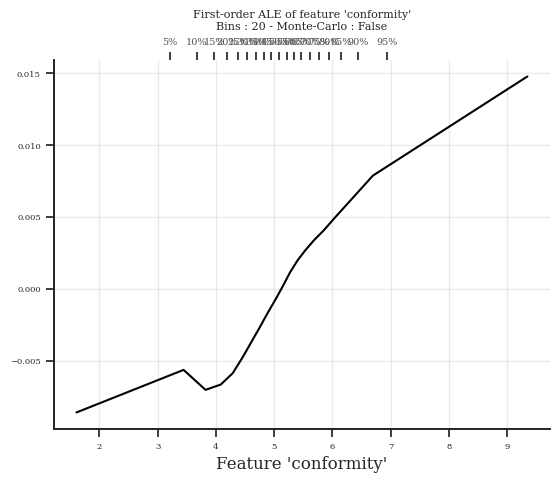

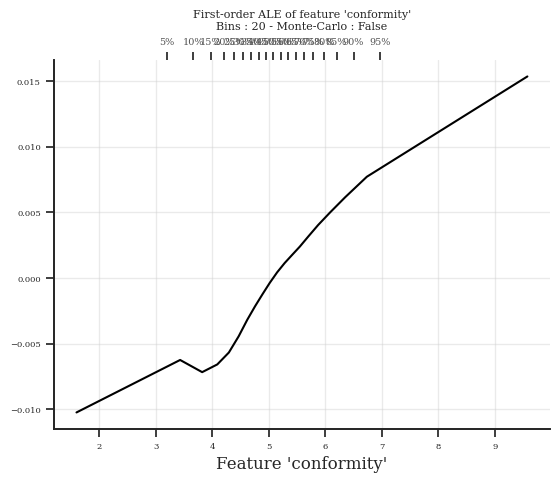

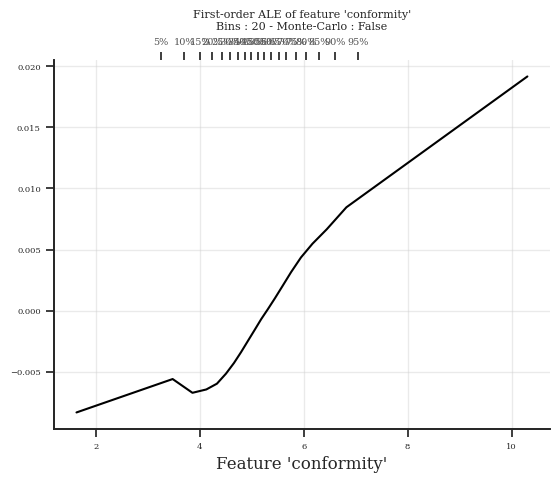

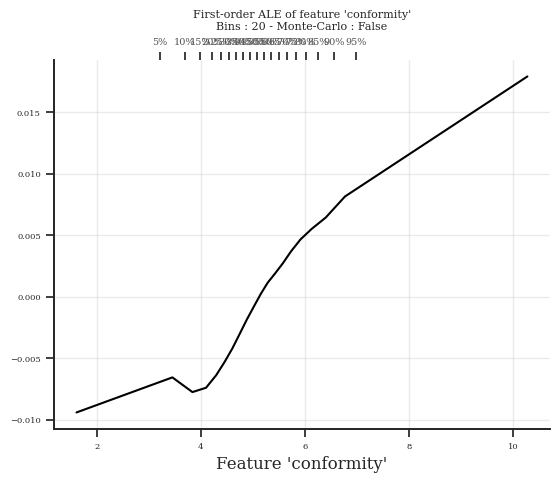

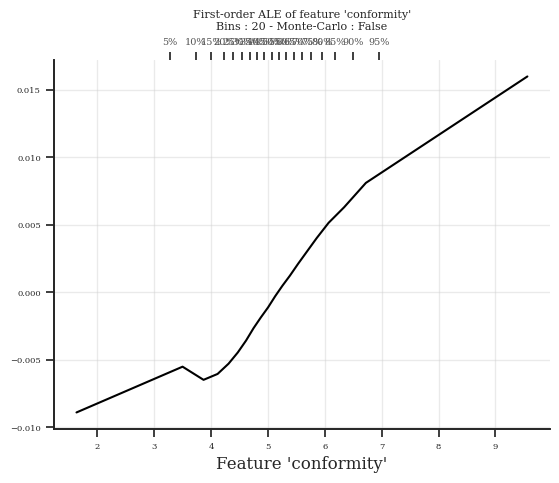

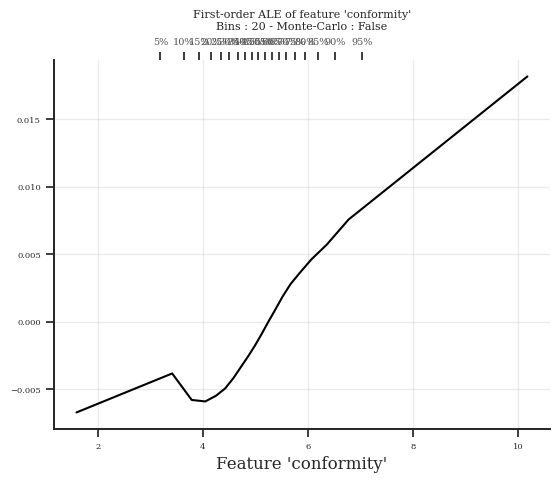

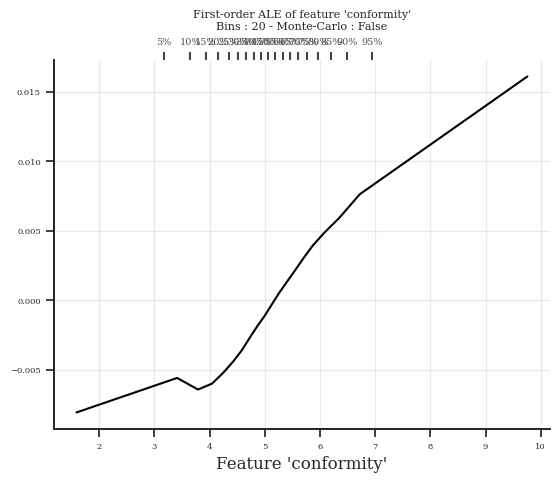

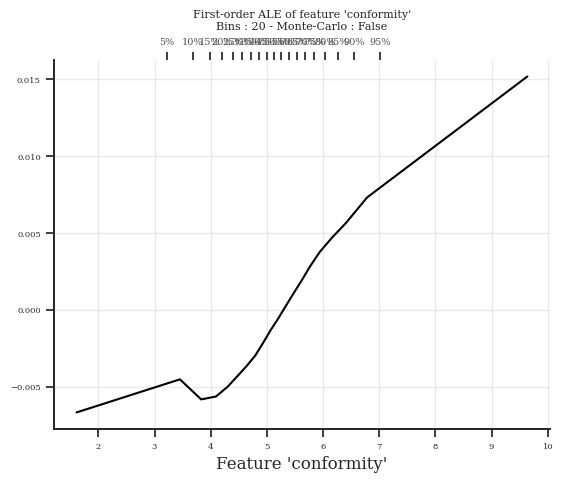

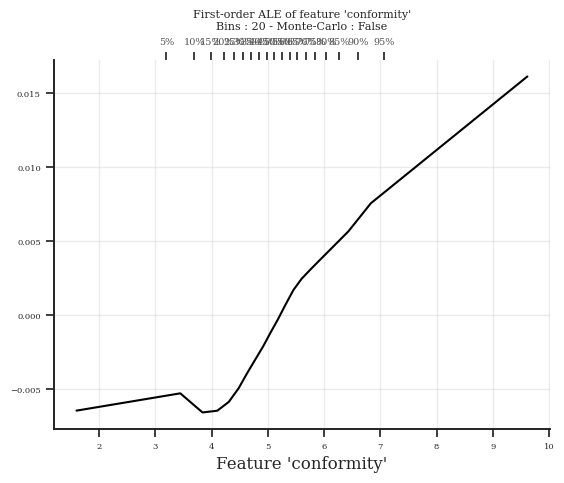

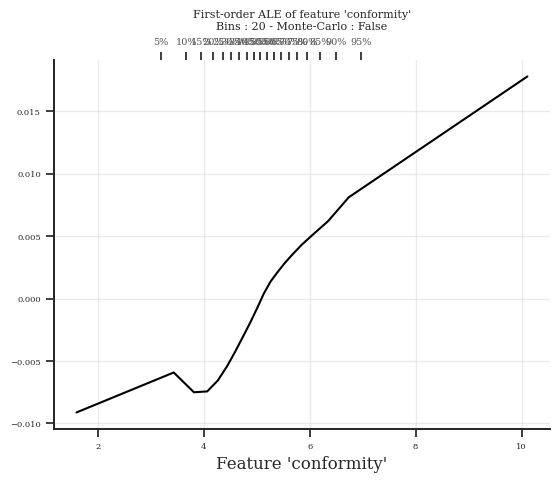

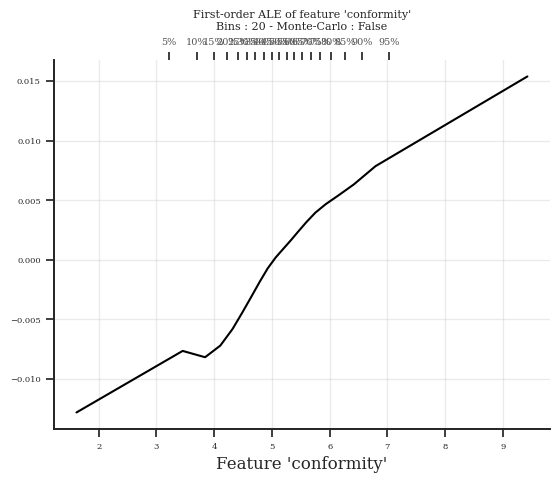

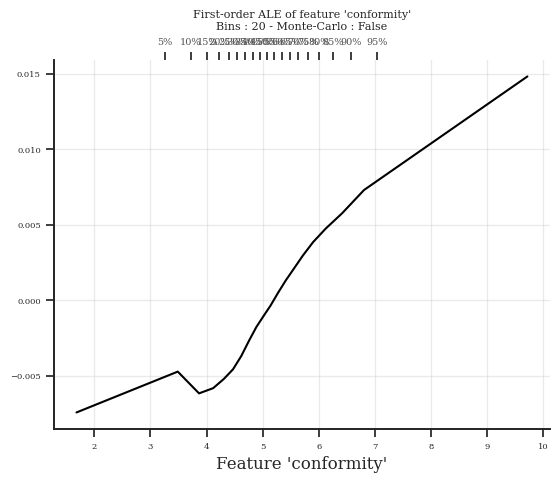

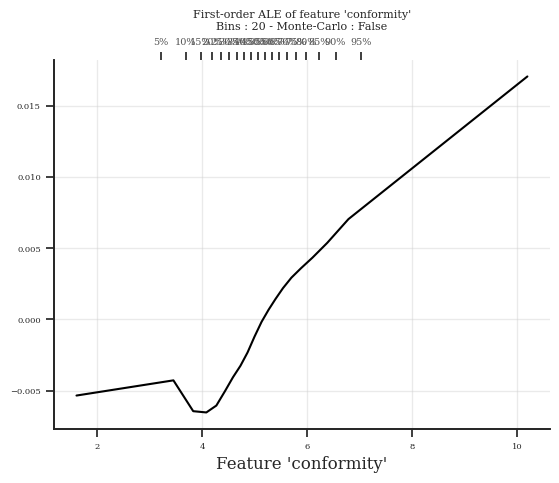

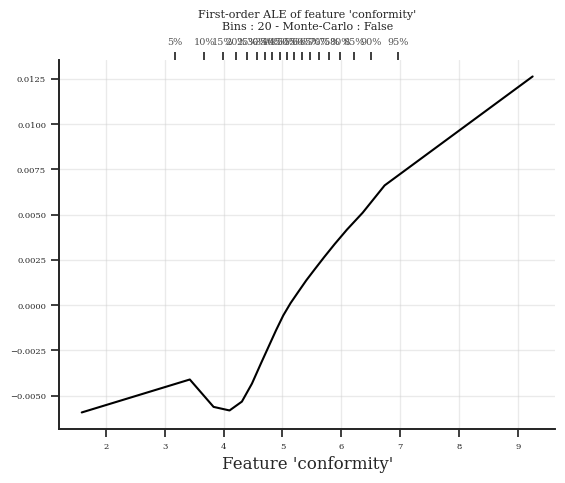

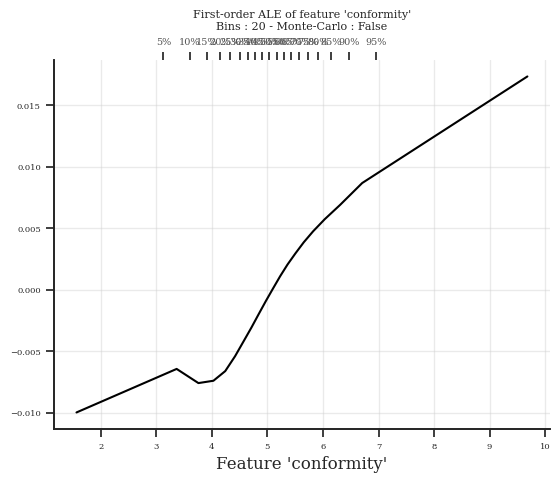

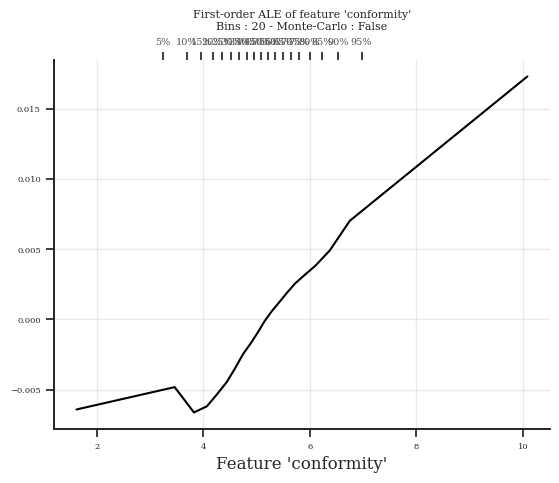

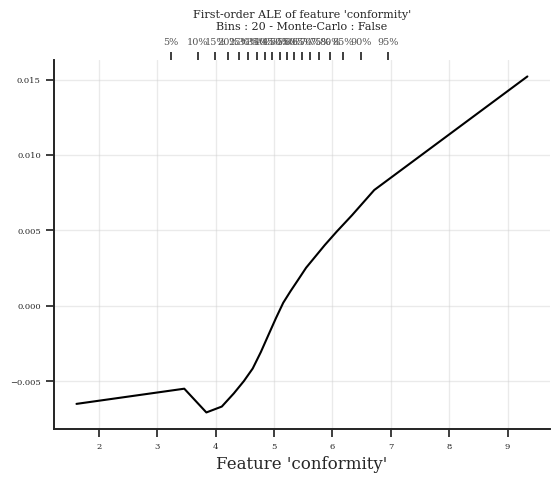

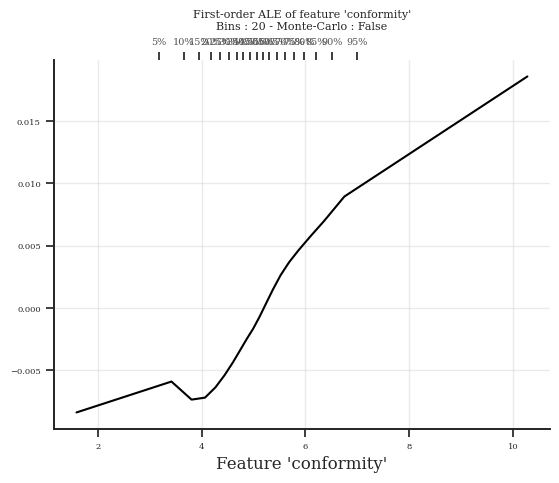

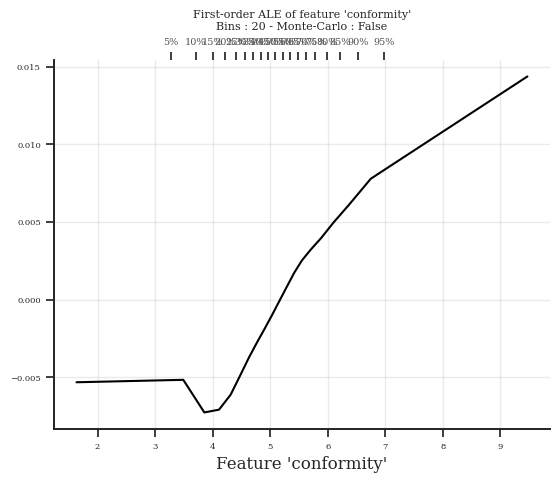

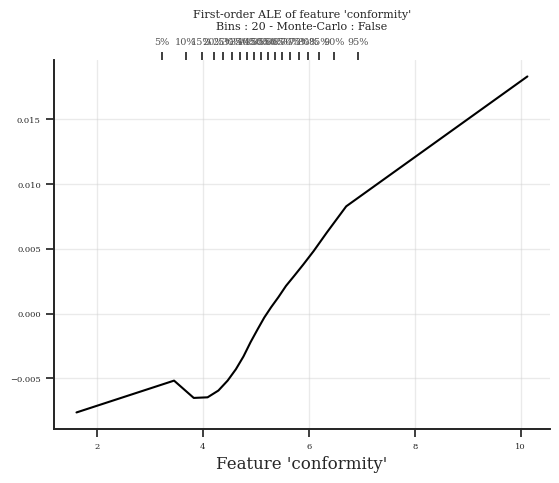

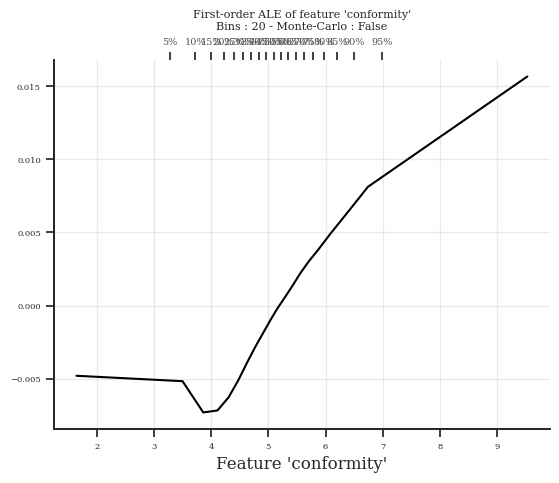

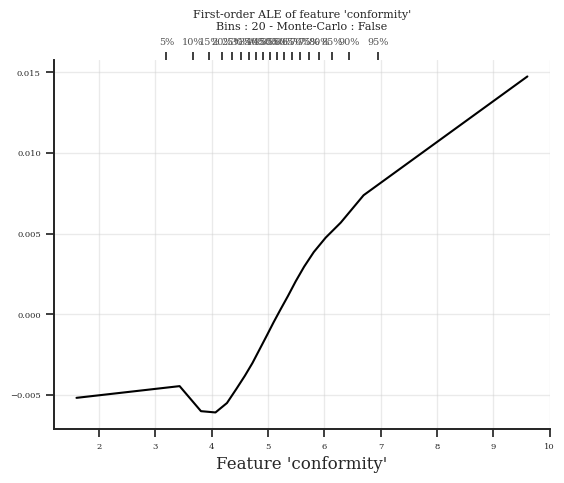

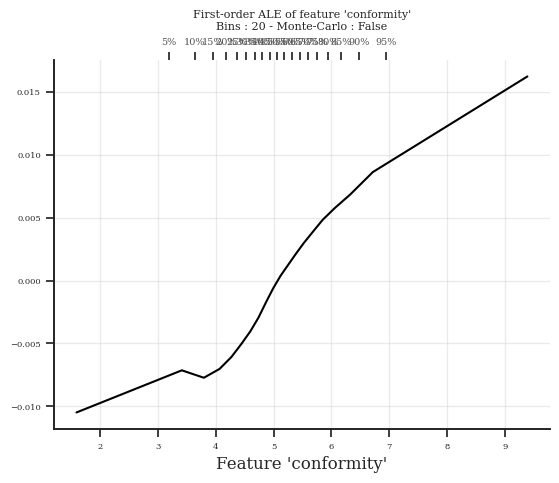

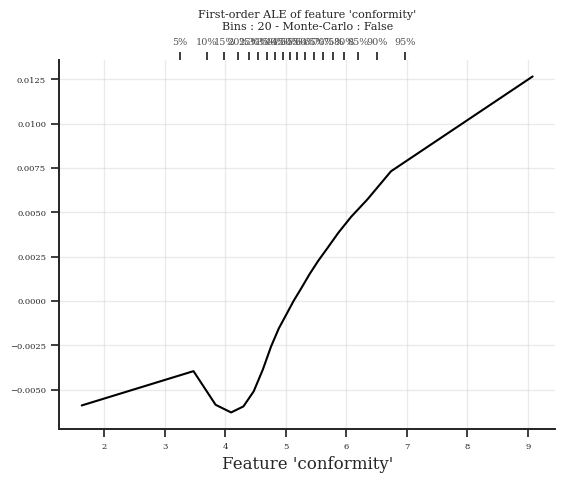

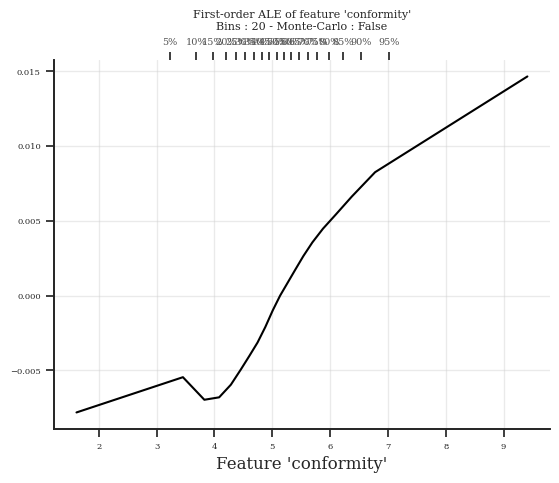

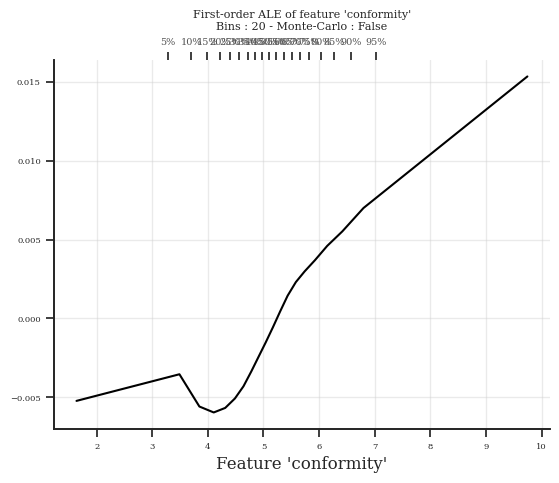

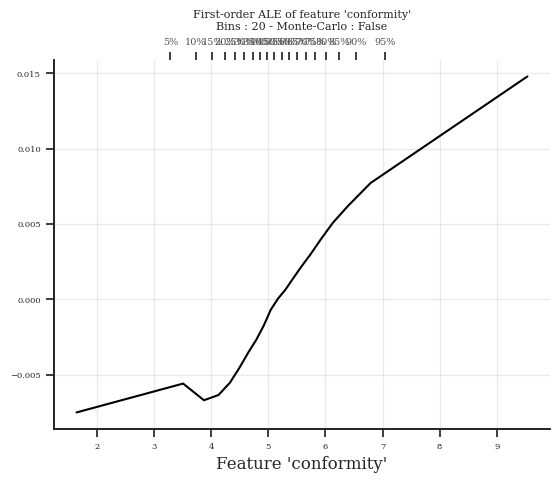

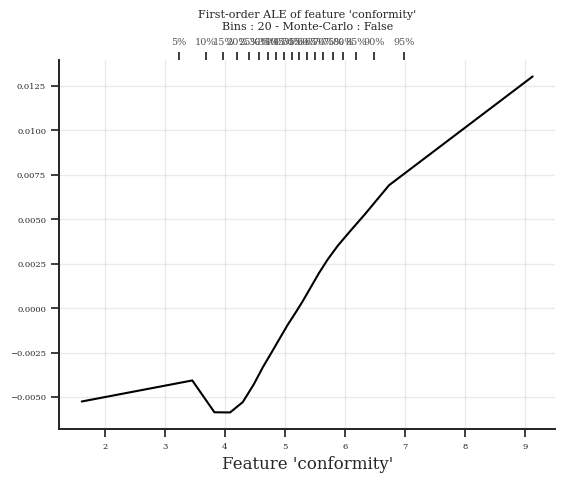

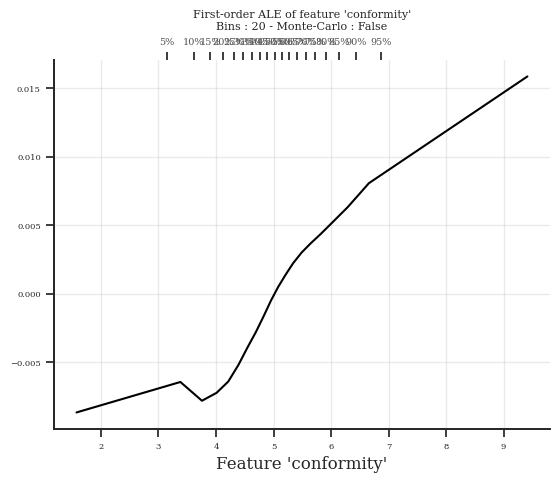

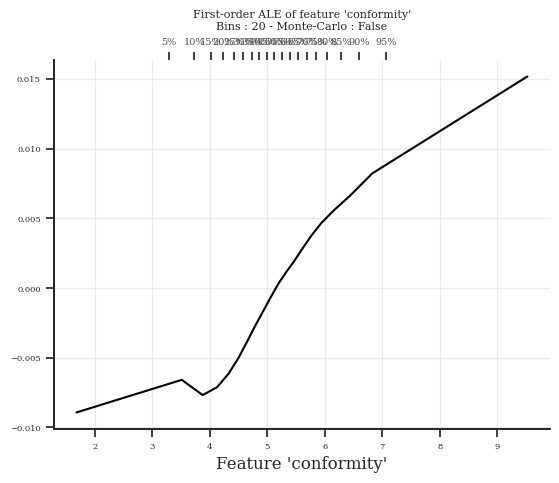

In [5]:
# 计算全局ale，转化成xarray的格式
# 似乎没有固定quantiles，需要再调整一下
bins = 20
quantiles = np.unique(
   np.quantile(
       dataset['treatments'].reshape(-1), np.linspace(0, 1, bins + 1), interpolation="lower"
   )
)
ALE_1ST = {
   'RNN_Model': [],
   }
n_bootstrap = 30

for _ in range(n_bootstrap):
    sub_dataset = dataset_sampling(dataset, 1000)
    ale_fig, ale_1st, _ = compute_ale(sub_dataset, 'rmsn_'+str(exp_name), b_use_predicted_confounders=False, features = ['conformity'], default_quantiles=quantiles)
    ALE_1ST['RNN_Model'].append(ale_1st)
    # window_ale_fig, ale, _ = compute_ale(sub_dataset, 'rmsn_' + str(exp_name), b_use_predicted_confounders=False, features=['week', 'conformity'], default_quantiles=quantiles)
    # ale_1st = np.sum(ale, axis=0)
    # ALE_1ST['RNN_Model'].append(ale_1st)

for key in ALE_1ST.keys():
    ALE_1ST[key] = np.array(ALE_1ST[key])
ale_dataset = create_ale_dataset(ALE_1ST, quantiles, dataset['treatments'], ['RNN_Model'], 'conformity')

In [31]:
#save
# ale_dataset.to_netcdf(path='./figures/figure_data/fig_1b.nc')

#read
ale_dataset = xr.open_dataset('./figures/figure_data/fig_1b.nc')

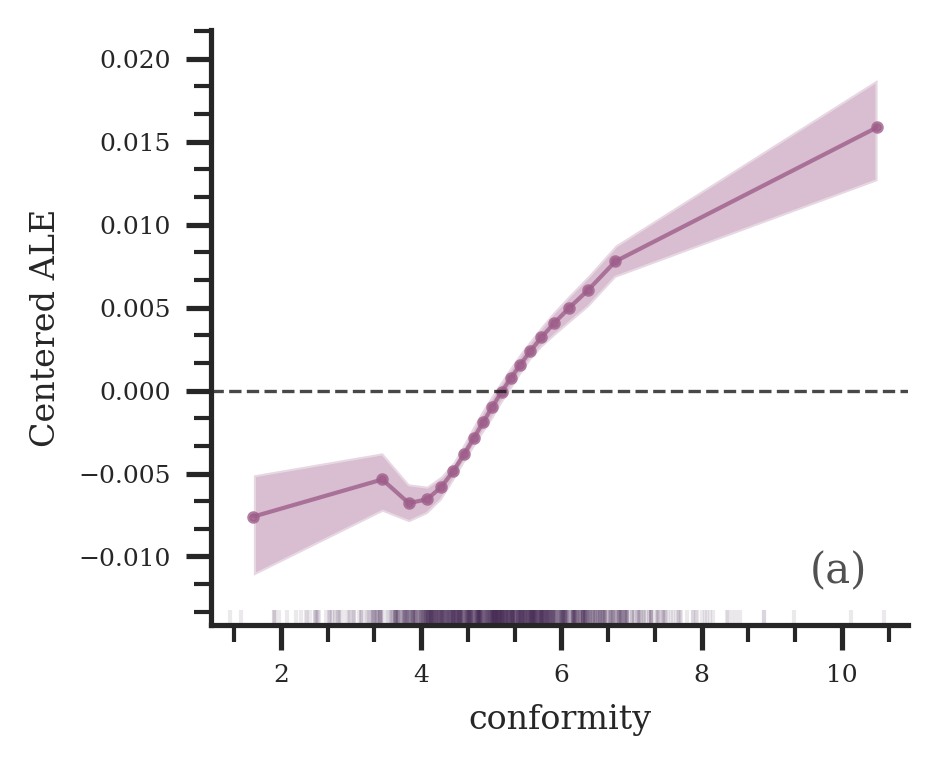

In [8]:
estimator = [('RNN_Model',RandomForestRegressor())]
explainer = skexplain.ExplainToolkit(estimator)

#修改可视化效果
#fig, ax = plt.subplots(dpi=300)
fig, ax = explainer.plot_ale(
                                   ale = ale_dataset,
                                   features='conformity',
                                   display_units=plotting_config.display_units,
                                   display_feature_names=plotting_config.display_feature_names,
                                   line_kws={'marker': 'o', 'markersize':2,'linewidth':1, 'line_colors': [cubehelix_palette[5]]},
                                   add_hist = False,
                                  )

# ax.set_xscale('log')
ax.set_ylabel('Centered ALE', fontsize = 8)
# ax.set_xlim(right = 1000)
ax.set_xlim(left=1)

# ax.set_xticks(conformity_bin_values_original)
# ax.set_xticklabels([f'{val:.2f}' for val in conformity_bin_values_original])

data = ale_dataset['conformity'].values
if len(data) > 1000:
    data_sample = np.random.choice(data, size=1000, replace=False)
else:
    data_sample = data
sns.rugplot(data_sample, ax=ax, color=cubehelix_palette[-2], alpha=0.1)

plt.savefig('./figures/fig_1b_SCI_ale_1st_log_log.png',  dpi=300)

plt.show()

In [32]:
# 还原SCI的log值
conformity_bin_values_log = ale_dataset['conformity__bin_values'].values
conformity_bin_values_original = np.exp(conformity_bin_values_log)-1
ale_dataset['conformity__bin_values'] = (('n_bins__conformity'), conformity_bin_values_original)

conformity_log = ale_dataset['conformity'].values
conformity_original = np.exp(conformity_log)-1
ale_dataset['conformity'] = (('n_X'), conformity_original)

ale_dataset

<xarray.Dataset>
Dimensions:                     (n_bootstrap: 30, n_bins__conformity: 20,
                                 n_X: 15456000)
Dimensions without coordinates: n_bootstrap, n_bins__conformity, n_X
Data variables:
    conformity__RNN_Model__ale  (n_bootstrap, n_bins__conformity) float64 ...
    conformity__bin_values      (n_bins__conformity) float32 3.991 ... 3.63e+04
    conformity                  (n_X) float32 243.5 238.5 223.8 ... 391.0 595.8
Attributes:
    estimator_output:  raw
    estimators used:   RNN_Model
    method:            ale
    dimension:         1D
    features used:     conformity

In [33]:
# 将ALE值转换为倍数
ale_values = ale_dataset['conformity__RNN_Model__ale'].values
ale_values_original = np.exp(ale_values)
ale_dataset['conformity__RNN_Model__ale'] = ([('n_bootstrap'),('n_bins__conformity')], ale_values_original)

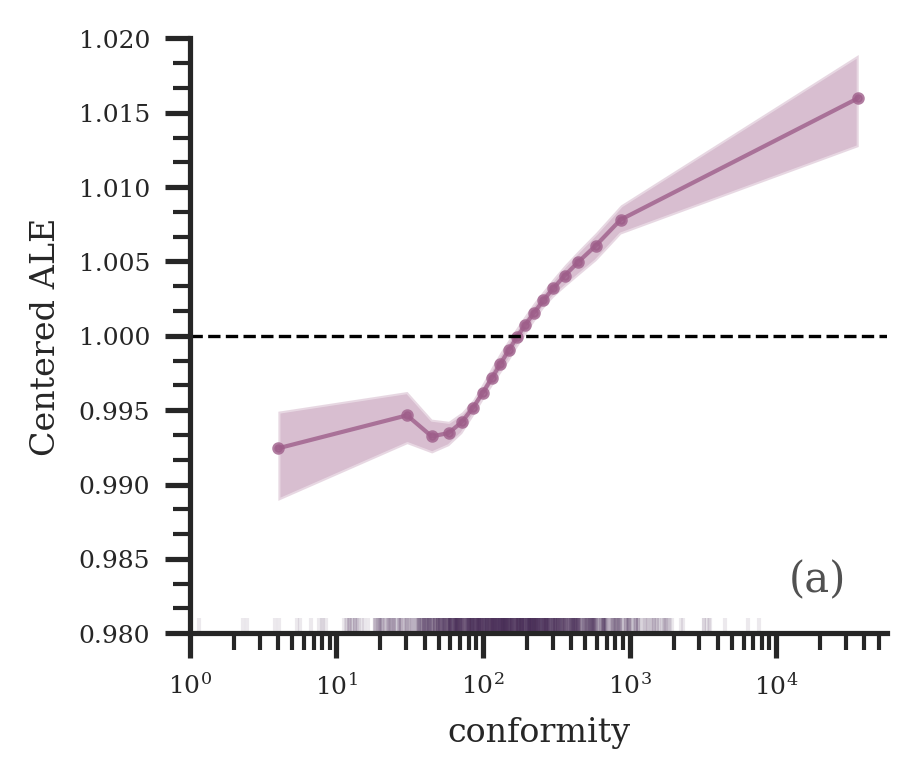

In [28]:
estimator = [('RNN_Model',RandomForestRegressor())]
explainer = skexplain.ExplainToolkit(estimator)

#修改可视化效果
#fig, ax = plt.subplots(dpi=300)
fig, ax = explainer.plot_ale(
                                   ale = ale_dataset,
                                   features='conformity',
                                   display_units=plotting_config.display_units,
                                   display_feature_names=plotting_config.display_feature_names,
                                   line_kws={'marker': 'o', 'markersize':2,'linewidth':1, 'line_colors': [cubehelix_palette[5]]},
                                   add_hist = False,
                                  )
ax.axhline(y=1, color='black', ls='--', lw=0.8)

ax.set_xscale('log')
ax.set_ylabel('Centered ALE', fontsize = 8)
# ax.set_xlim(right = 1000)
ax.set_xlim(left=1)
ax.set_ylim(bottom = 0.98, top = 1.02)


# ax.set_xticks(conformity_bin_values_original)
# ax.set_xticklabels([f'{val:.2f}' for val in conformity_bin_values_original])

data = ale_dataset['conformity'].values
if len(data) > 1000:
    data_sample = np.random.choice(data, size=1000, replace=False)
else:
    data_sample = data
sns.rugplot(data_sample, ax=ax, color=cubehelix_palette[-2], alpha=0.1)

plt.savefig('./figures/fig_1b_SCI_ale_1st_SCI_log.png',  dpi=300)

plt.show()

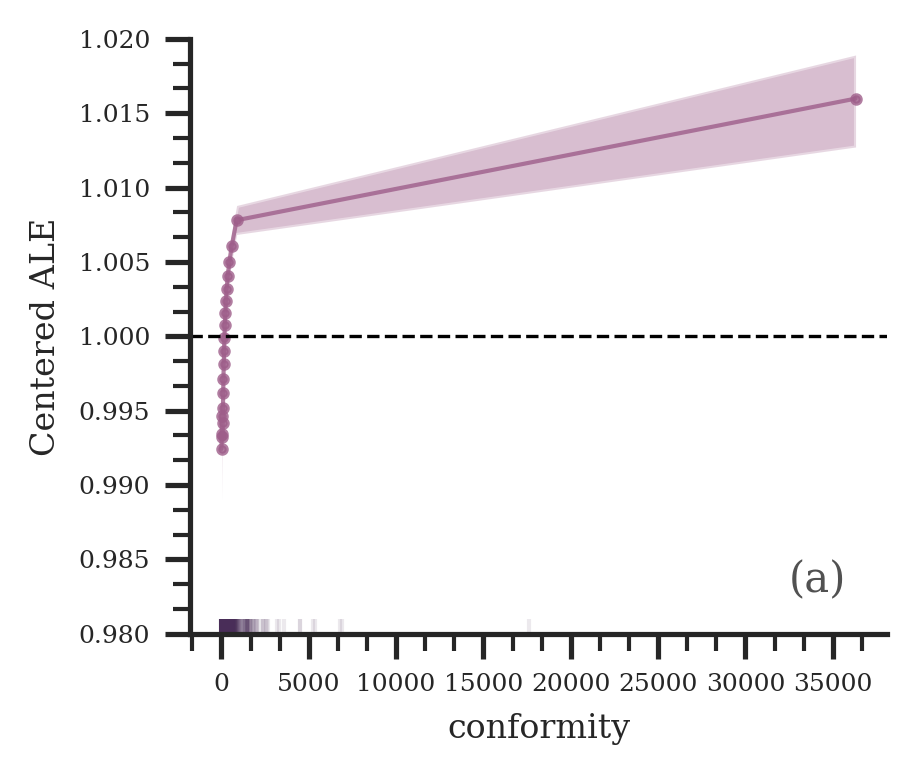

In [29]:
estimator = [('RNN_Model',RandomForestRegressor())]
explainer = skexplain.ExplainToolkit(estimator)

#修改可视化效果
#fig, ax = plt.subplots(dpi=300)
fig, ax = explainer.plot_ale(
                                   ale = ale_dataset,
                                   features='conformity',
                                   display_units=plotting_config.display_units,
                                   display_feature_names=plotting_config.display_feature_names,
                                   line_kws={'marker': 'o', 'markersize':2,'linewidth':1, 'line_colors': [cubehelix_palette[5]]},
                                   add_hist = False,
                                  )
ax.axhline(y=1, color='black', ls='--', lw=0.8)

# ax.set_xscale('log')
ax.set_ylabel('Centered ALE', fontsize = 8)
# ax.set_xlim(right = 1000)
# ax.set_xlim(left=1)
ax.set_ylim(bottom = 0.98, top = 1.02)


# ax.set_xticks(conformity_bin_values_original)
# ax.set_xticklabels([f'{val:.2f}' for val in conformity_bin_values_original])

data = ale_dataset['conformity'].values
if len(data) > 1000:
    data_sample = np.random.choice(data, size=1000, replace=False)
else:
    data_sample = data
sns.rugplot(data_sample, ax=ax, color=cubehelix_palette[-2], alpha=0.1)

plt.savefig('./figures/fig_1b_SCI_ale_1st_raw.png',  dpi=300)

plt.show()

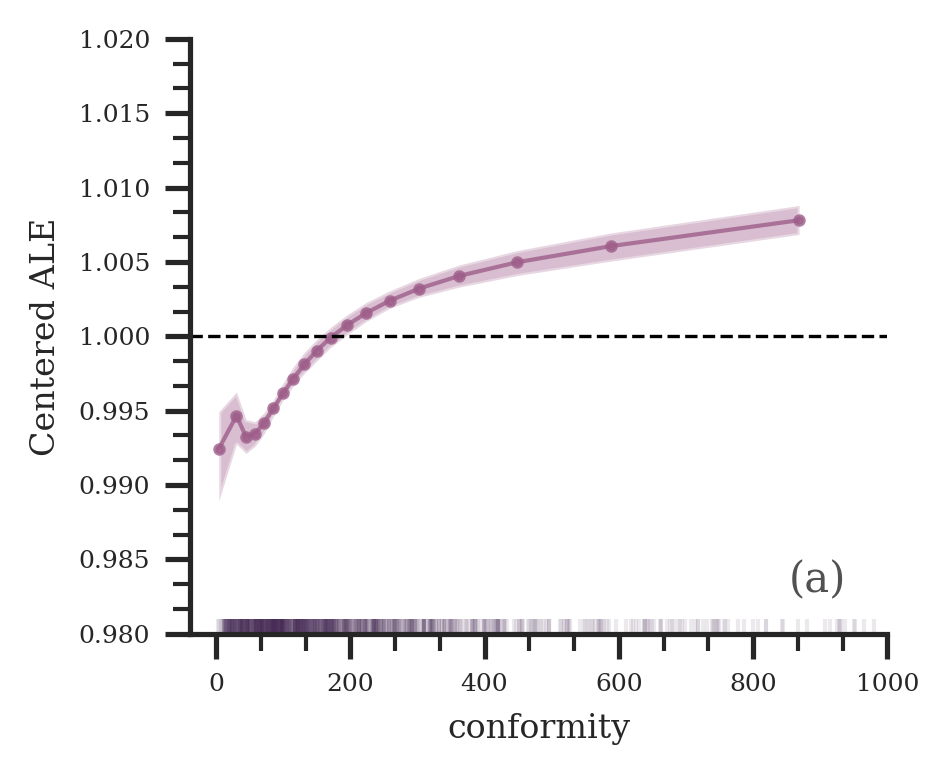

In [39]:
bins_to_keep = ale_dataset['n_bins__conformity'] != ale_dataset['n_bins__conformity'].loc[-1]
ale_dataset_select = ale_dataset.sel(n_bins__conformity=bins_to_keep)

estimator = [('RNN_Model',RandomForestRegressor())]
explainer = skexplain.ExplainToolkit(estimator)

#修改可视化效果
#fig, ax = plt.subplots(dpi=300)
fig, ax = explainer.plot_ale(
                                   ale = ale_dataset_select,
                                   features='conformity',
                                   display_units=plotting_config.display_units,
                                   display_feature_names=plotting_config.display_feature_names,
                                   line_kws={'marker': 'o', 'markersize':2,'linewidth':1, 'line_colors': [cubehelix_palette[5]]},
                                   add_hist = False,
                                  )
ax.axhline(y=1, color='black', ls='--', lw=0.8)

# ax.set_xscale('log')
ax.set_ylabel('Centered ALE', fontsize = 8)
ax.set_xlim(right = 1000)
# ax.set_xlim(left=1)
ax.set_ylim(bottom = 0.98, top = 1.02)


# ax.set_xticks(conformity_bin_values_original)
# ax.set_xticklabels([f'{val:.2f}' for val in conformity_bin_values_original])

data = ale_dataset['conformity'].values
if len(data) > 1000:
    data_sample = np.random.choice(data, size=1000, replace=False)
else:
    data_sample = data
sns.rugplot(data_sample, ax=ax, color=cubehelix_palette[-2], alpha=0.1)

plt.savefig('./figures/fig_1b_SCI_ale_1st_raw-1.png',  dpi=300)

plt.show()


## 一阶ALE预测（分年度）

In [3]:
# 导入数据
dataset = load_data("../data/sample_3w2_add.h5")

index_to_remove = dataset['covariates'].shape[2] - 5
dataset['covariates'] = np.delete(dataset['covariates'], index_to_remove, axis=2)

index_to_remove = dataset['covariates'].shape[2] - 5
dataset['covariates'] = np.delete(dataset['covariates'], index_to_remove, axis=2)

for key in dataset.keys():
    print(key)
    print(dataset[key].shape)
    print(dataset[key].dtype)

covariates
(96000, 161, 23)
float32
outcomes
(96000, 161, 1)
float32
sequence_length
(96000,)
int64
treatments
(96000, 161, 1)
float32


In [4]:
def obtain_dataset(dataset, column_index, selection=1):
        dataset_part = {}
        selected_indices = np.where(dataset['covariates'][:, :, column_index] == selection)[0]
        unique_selected_indices = np.unique(selected_indices)
        for key in dataset.keys():
            dataset_part[key] = dataset[key][unique_selected_indices]
        return dataset_part

column_2019 = 12  # index of year 2019 indicator
column_2020 = 13  # index of year 2020 indicator
column_2023 = 14  # index of year 2023 indicator

#dataset19 = obtain_dataset(dataset, column_2019)['treatments'][:,:,0]
#dataset20 = obtain_dataset(dataset, column_2020)['treatments'][:,:,0]
#dataset23 = obtain_dataset(dataset, column_2023)['treatments'][:,:,0]

dataset19 = obtain_dataset(dataset, column_2019)
dataset20 = obtain_dataset(dataset, column_2020)
dataset23 = obtain_dataset(dataset, column_2023)

In [5]:
# 模型编号
# exp_name = "add_ent_model_optimal_v2"
exp_name = "base_model_optimal_v2"

the `interpolation=` argument to quantile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
2024-06-05 01:51:35.974 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.6238731  4.0052543  4.362629   4.575267   4.7427387  4.881816
  5.0069337  5.1201468  5.2282515  5.3349304  5.4413657  5.5453014
  5.658528   5.7714925  5.896292   6.041754   6.208763   6.432903
  6.730506   7.164774  10.492968 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.93it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.03it/s]
2024-06-05 01:51:40.303 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.6238731  4.0052543  4.362629   4.575267   4.7427387  4.881816
  5.0069337  5.1201468  5.2282515  5.3349304  5.4413657  5.5453014
  5.658528   5.7714925  5.896292   6.041754   6.208763   6.432903
  6.730506   7.164774  10.492968 ].


[2.3145638 4.183942  4.468948  4.659003  4.8122773 4.944375  5.0635405
 5.174199  5.281591  5.3881483 5.493334  5.6019144 5.71501   5.8338923
 5.9690228 6.1252584 6.320833  6.581704  6.94764   8.828871 ]


2024-06-05 01:51:41.273 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.19593695  3.950716    4.309258    4.5244055   4.696924    4.845109
  4.9740696   5.092222    5.204561    5.3149743   5.417564    5.523174
  5.6312118   5.746531    5.8708315   6.0143266   6.181781    6.3992357
  6.6862593   7.154294   11.03893   ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.53it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.15it/s]
2024-06-05 01:51:45.527 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.19593695  3.950716    4.309258    4.5244055   4.696924    4.845109
  4.9740696   5.092222    5.204561    5.3149743   5.417564    5.523174
  5.6312118   5.746531    5.8708315   6.0143266   6.181781    6.3992357
  6.6862593   7.154294   11.03893   ].


[2.0733266 4.129987  4.416832  4.610665  4.7710166 4.9095893 5.033146
 5.1483917 5.2597675 5.366269  5.470369  5.577193  5.6888714 5.8086815
 5.9425793 6.098054  6.2905083 6.5427475 6.9202766 9.096612 ]


2024-06-05 01:51:46.479 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.46560156  3.9918468   4.3353395   4.5474925   4.718231    4.862393
  4.992327    5.107545    5.2150855   5.3258224   5.4333434   5.546832
  5.6678233   5.7883053   5.9136157   6.0694366   6.25245     6.48238
  6.8015943   7.2976418  10.52691   ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.15it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.30it/s]
2024-06-05 01:51:50.737 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.46560156  3.9918468   4.3353395   4.5474925   4.718231    4.862393
  4.992327    5.107545    5.2150855   5.3258224   5.4333434   5.546832
  5.6678233   5.7883053   5.9136157   6.0694366   6.25245     6.48238
  6.8015943   7.2976418  10.52691   ].


[2.2287242 4.1635933 4.441416  4.632862  4.790312  4.92736   5.0499363
 5.161315  5.270454  5.379583  5.4900875 5.6073275 5.7280645 5.8509607
 5.991526  6.160943  6.367415  6.641987  7.049618  8.912275 ]


2024-06-05 01:51:51.696 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.70444673  3.8668892   4.2671614   4.5146775   4.6879516   4.8282437
  4.964163    5.0894346   5.2050753   5.317267    5.425606    5.539139
  5.653306    5.765415    5.8955317   6.0396805   6.2073355   6.421462
  6.694587    7.1298265  11.452549  ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.20it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.04it/s]
2024-06-05 01:51:55.994 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.70444673  3.8668892   4.2671614   4.5146775   4.6879516   4.8282437
  4.964163    5.0894346   5.2050753   5.317267    5.425606    5.539139
  5.653306    5.765415    5.8955317   6.0396805   6.2073355   6.421462
  6.694587    7.1298265  11.452549  ].


[2.285668  4.067025  4.3909197 4.6013145 4.7580976 4.896203  5.0267987
 5.147255  5.2611713 5.371436  5.4823723 5.5962224 5.7093606 5.8304734
 5.967606  6.123508  6.314399  6.5580244 6.9122066 9.291187 ]


2024-06-05 01:51:56.950 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.29286712  3.9611976   4.313136    4.527151    4.6906857   4.831317
  4.96796     5.092005    5.2086816   5.3252344   5.4416695   5.5536194
  5.6649857   5.788994    5.922081    6.06808     6.2384877   6.454873
  6.752246    7.2289176  11.394829  ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.07it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.58it/s]
2024-06-05 01:52:01.272 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.29286712  3.9611976   4.313136    4.527151    4.6906857   4.831317
  4.96796     5.092005    5.2086816   5.3252344   5.4416695   5.5536194
  5.6649857   5.788994    5.922081    6.06808     6.2384877   6.454873
  6.752246    7.2289176  11.394829  ].


[2.1270323 4.137167  4.4201436 4.608918  4.7610016 4.899638  5.0299826
 5.150343  5.266958  5.383452  5.4976444 5.6093025 5.7269897 5.8555374
 5.9950805 6.153284  6.3466806 6.6035595 6.9905815 9.311873 ]


2024-06-05 01:52:02.237 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.0211127  3.9394996  4.3248105  4.5536394  4.722535   4.865913
  4.989814   5.1032     5.2081223  5.315485   5.425162   5.5316596
  5.639102   5.7664576  5.8968782  6.052226   6.240075   6.4789376
  6.778103   7.2250876 11.680396 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.28it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.84it/s]
2024-06-05 01:52:06.580 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.0211127  3.9394996  4.3248105  4.5536394  4.722535   4.865913
  4.989814   5.1032     5.2081223  5.315485   5.425162   5.5316596
  5.639102   5.7664576  5.8968782  6.052226   6.240075   6.4789376
  6.778103   7.2250876 11.680396 ].


[1.9803061 4.132155  4.439225  4.6380873 4.794224  4.927863  5.046507
 5.155661  5.2618036 5.370323  5.4784107 5.5853806 5.70278   5.831668
 5.974552  6.1461506 6.3595066 6.62852   7.0015955 9.452742 ]


2024-06-05 01:52:07.548 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.74237406  3.972946    4.322028    4.533594    4.6997433   4.8395295
  4.9652157   5.0836287   5.191225    5.302078    5.410835    5.517209
  5.630071    5.7444468   5.8678      6.006031    6.175029    6.395969
  6.6689634   7.1512017  10.733588  ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.43it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.95it/s]
2024-06-05 01:52:11.866 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.74237406  3.972946    4.322028    4.533594    4.6997433   4.8395295
  4.9652157   5.0836287   5.191225    5.302078    5.410835    5.517209
  5.630071    5.7444468   5.8678      6.006031    6.175029    6.395969
  6.6689634   7.1512017  10.733588  ].


[2.35766   4.147487  4.427811  4.6166687 4.769636  4.9023724 5.024422
 5.137427  5.2466516 5.3564563 5.4640217 5.57364   5.6872587 5.8061237
 5.9369154 6.09053   6.2854986 6.532466  6.910083  8.942395 ]


2024-06-05 01:52:12.822 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.23568909  3.94368     4.2923617   4.5175705   4.693355    4.84276
  4.9748387   5.0992475   5.2192855   5.3313084   5.4409237   5.5506096
  5.6684804   5.792358    5.928471    6.0845666   6.2575192   6.472733
  6.7130413   7.0851965  11.389751  ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.20it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.94it/s]
2024-06-05 01:52:17.107 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.23568909  3.94368     4.2923617   4.5175705   4.693355    4.84276
  4.9748387   5.0992475   5.2192855   5.3313084   5.4409237   5.5506096
  5.6684804   5.792358    5.928471    6.0845666   6.2575192   6.472733
  6.7130413   7.0851965  11.389751  ].


[2.0896845 4.118021  4.4049664 4.605463  4.768058  4.908799  5.037043
 5.1592665 5.275297  5.386116  5.4957666 5.6095448 5.730419  5.8604145
 6.006519  6.171043  6.365126  6.592887  6.899119  9.237474 ]


2024-06-05 01:52:18.066 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.19593695  3.937576    4.304181    4.537214    4.7131357   4.8694396
  5.0095177   5.130592    5.244059    5.352756    5.4611206   5.5693336
  5.675807    5.7849865   5.89995     6.030074    6.193       6.4081793
  6.672295    7.12421    11.322745  ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:01, 13.71it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.71it/s]
2024-06-05 01:52:22.519 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.19593695  3.937576    4.304181    4.537214    4.7131357   4.8694396
  5.0095177   5.130592    5.244059    5.352756    5.4611206   5.5693336
  5.675807    5.7849865   5.89995     6.030074    6.193       6.4081793
  6.672295    7.12421    11.322745  ].


[2.0667565 4.1208787 4.420697  4.6251745 4.7912874 4.939479  5.070055
 5.1873255 5.2984076 5.4069386 5.5152273 5.62257   5.7303967 5.8424683
 5.965012  6.111537  6.3005896 6.5402374 6.8982525 9.223477 ]


2024-06-05 01:52:23.517 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.32542244  4.0012064   4.343579    4.5648685   4.7367086   4.8763065
  5.0061135   5.1249895   5.2380934   5.3439813   5.453792    5.5645204
  5.6795764   5.8008533   5.9271965   6.080031    6.252888    6.472908
  6.7556767   7.1756706  10.745292  ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:01, 12.94it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.69it/s]
2024-06-05 01:52:28.105 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.32542244  4.0012064   4.343579    4.5648685   4.7367086   4.8763065
  5.0061135   5.1249895   5.2380934   5.3439813   5.453792    5.5645204
  5.6795764   5.8008533   5.9271965   6.080031    6.252888    6.472908
  6.7556767   7.1756706  10.745292  ].


[2.1633143 4.172393  4.4542236 4.6507883 4.8065076 4.94121   5.0655518
 5.1815414 5.2910376 5.3988867 5.509156  5.6220484 5.740215  5.864025
 6.0036135 6.1664596 6.362898  6.614292  6.9656734 8.960482 ]


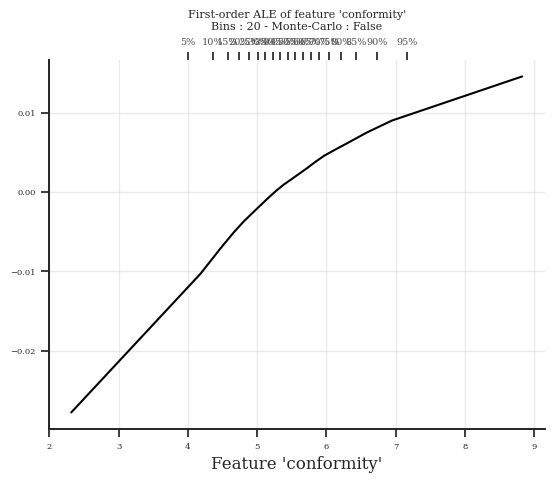

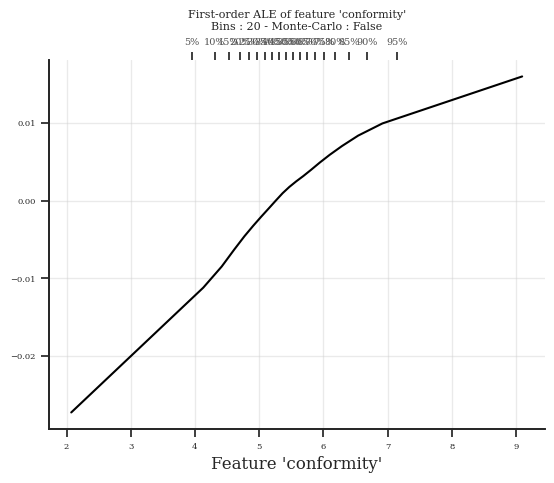

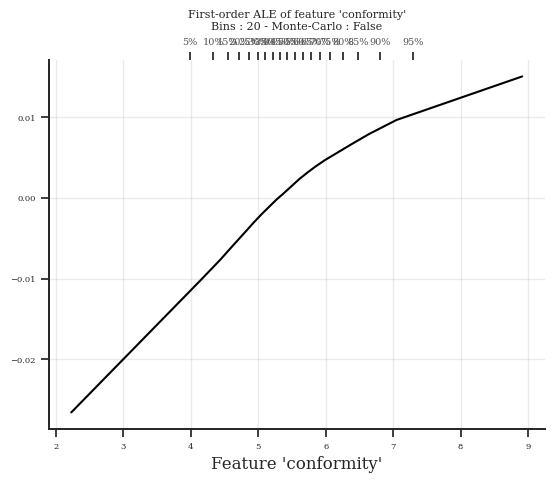

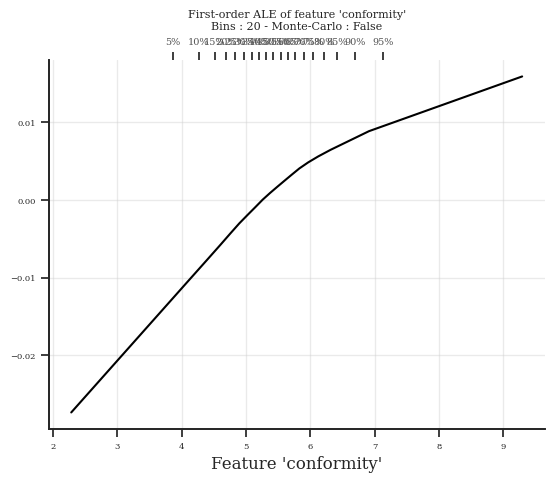

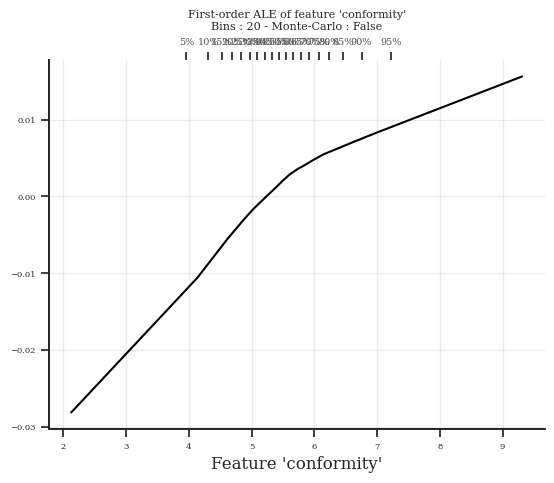

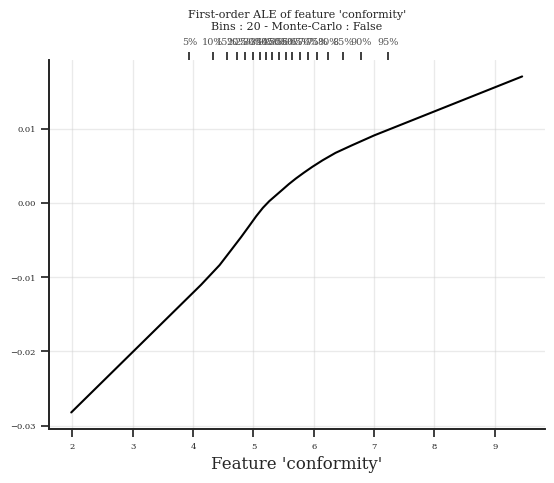

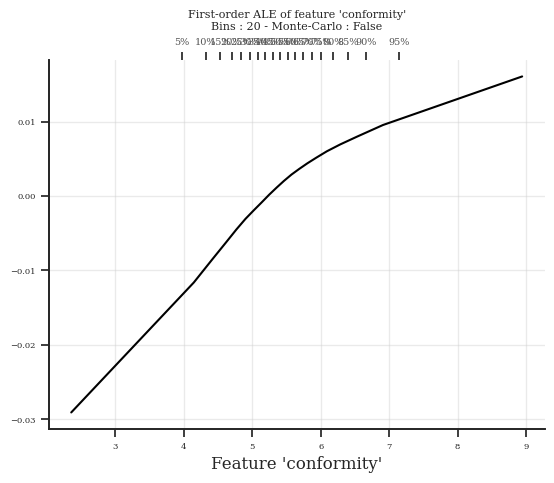

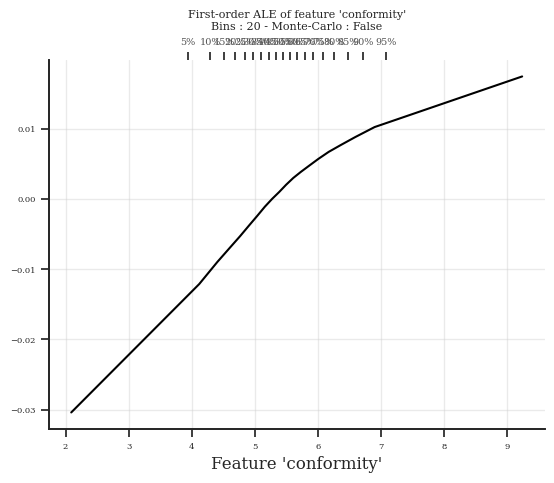

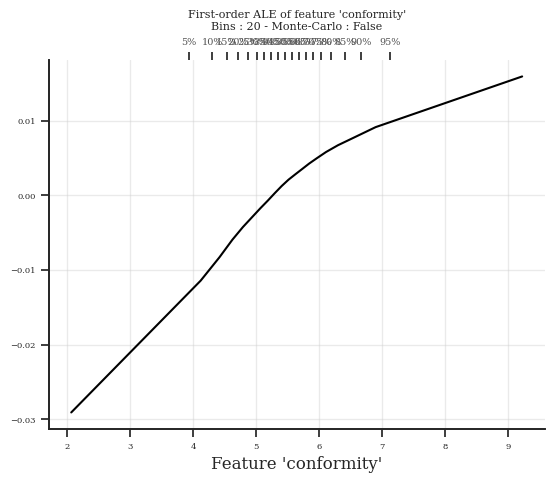

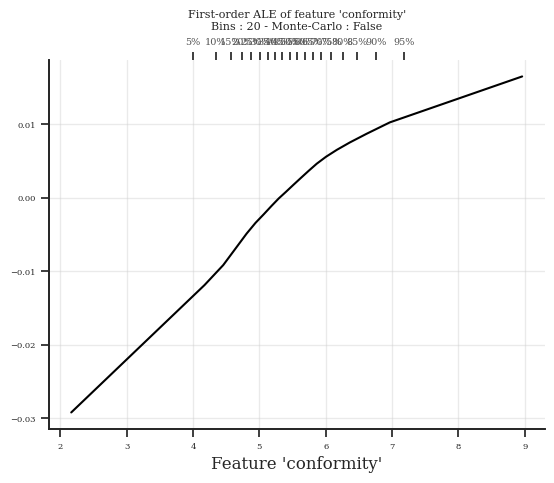

In [42]:
# 计算全局ale，转化成xarray的格式
bins = 20
quantiles = np.unique(
   np.quantile(
       dataset['treatments'].reshape(-1), np.linspace(0, 1, bins + 1), interpolation="lower"
   )
)

data_var = {}
n_bootstrap = 30


for i in [0,1,2]:
    dataset_year = [dataset19, dataset20, dataset23][i]
    year = [2019, 2020, 2023][i]
    ale = []
    
    for _ in range(n_bootstrap):
        sub_dataset = dataset_sampling(dataset_year, 1000)
        ale_fig, ale_1st, _ = compute_ale(sub_dataset, 'rmsn_'+str(exp_name), b_use_predicted_confounders=False, features = ['conformity'], default_quantiles=quantiles)
        ale.append(ale_1st)
    data_vars[f"conformity__RNN_model_{year}__ale"] = (["n_bootstrap", f"n_bins__{feature}"], ale)

data_vars[f"conformity__bin_values"] = (["n_bins__conformity"], quantiles)

data_vars[f"conformity"] = ([n_X],dataset['treatments'][:,:,0].flatten())

for key in data_var.keys():
    data_var[key] = np.array(data_var[key])
    
ale_dataset = xr.Dataset(
    data_vars=data_vars,
    #coords={
    #    "n_bootstrap": np.arange(ale.shape[0]), 
    #    f"n_bins__{feature_name}": np.arange(quantiles.shape[0]),  
    #    "n_X": np.arange(flattened_values.shape[0]),  
    #},
    attrs={
        "estimator_output": "raw",
        "estimators used": ['RNN_Model_2019', 'RNN_Model_2020', 'RNN_Model_2023'],
        "method": "ale",
        "dimension": "1D",
        "features used": "conformity",
    }
)
        
# ale_dataset = create_ale_dataset(ALE_1ST, quantiles, dataset['treatments'], ['RNN_Model'], 'conformity')

# 还原SCI的log值
conformity_bin_values_log = ale_dataset['conformity__bin_values'].values
conformity_bin_values_original = np.exp(conformity_bin_values_log)-1
ale_dataset['conformity__bin_values'] = (('n_bins__conformity'), conformity_bin_values_original)

conformity_log = ale_dataset['conformity'].values
conformity_original = np.exp(conformity_log)-1
ale_dataset['conformity'] = (('n_X'), conformity_original)

estimator = [('RNN_Model',RandomForestRegressor())]
explainer = skexplain.ExplainToolkit(estimator)


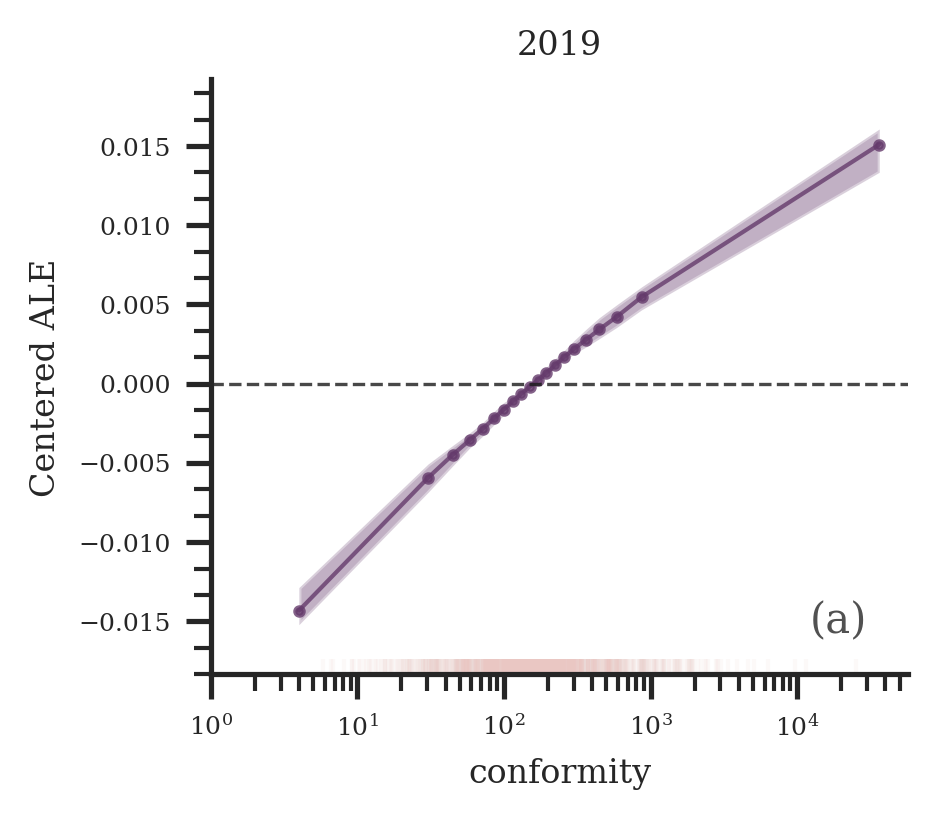

In [39]:
#修改可视化效果
#fig, ax = plt.subplots(dpi=300)
fig, ax = explainer.plot_ale(
                                   ale = ale_dataset,
                                   features='conformity',
                                   display_units=plotting_config.display_units,
                                   display_feature_names=plotting_config.display_feature_names,
                                   line_kws={'marker': 'o', 'markersize':2,'linewidth':1, 'line_colors': [cubehelix_palette[5]]},
                                   add_hist = False,
                                  )

ax.set_xscale('log')
ax.set_ylabel('Centered ALE', fontsize = 8)
# ax.set_xlim(right = 1000)
ax.set_xlim(left=1)
ax.set_title('2019')
# ax.set_xticks(conformity_bin_values_original)
# ax.set_xticklabels([f'{val:.2f}' for val in conformity_bin_values_original])

data = ale_dataset['conformity'].values
if len(data) > 1000:
    data_sample = np.random.choice(data, size=1000, replace=False)
else:
    data_sample = data
sns.rugplot(data_sample, ax=ax, color=cubehelix_palette[-2], alpha=0.1)

# plt.savefig('./figures/fig_1b_SCI_ale_1st.png',  dpi=300)
plt.show()

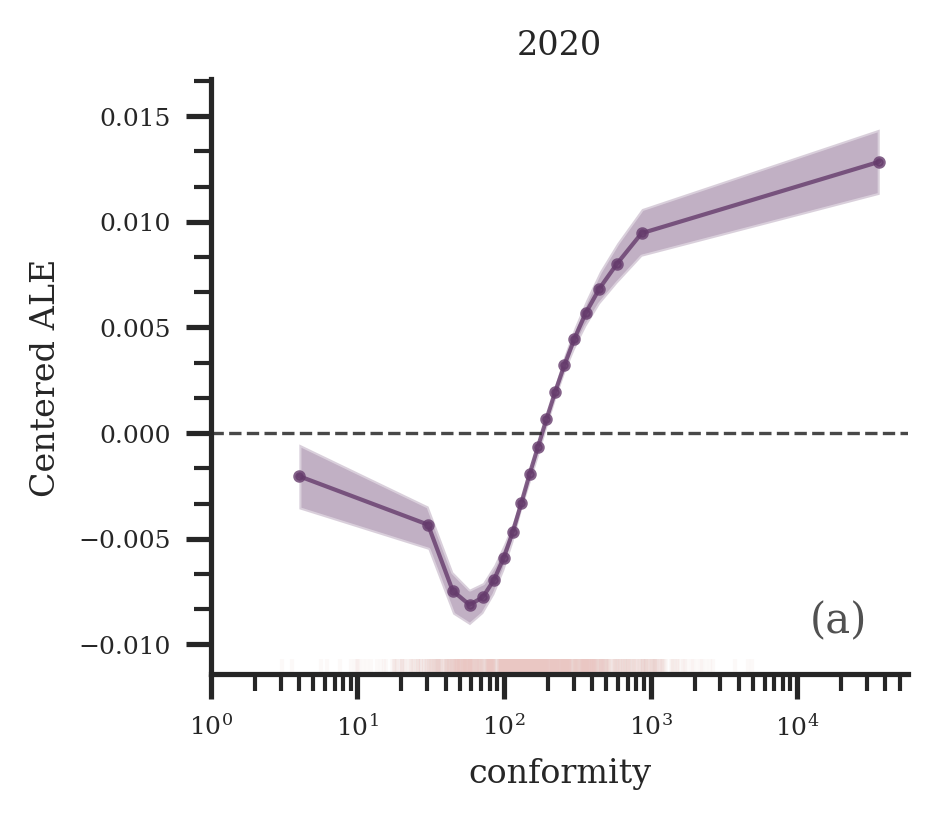

In [41]:
#修改可视化效果
#fig, ax = plt.subplots(dpi=300)
fig, ax = explainer.plot_ale(
                                   ale = ale_dataset,
                                   features='conformity',
                                   display_units=plotting_config.display_units,
                                   display_feature_names=plotting_config.display_feature_names,
                                   line_kws={'marker': 'o', 'markersize':2,'linewidth':1, 'line_colors': [cubehelix_palette[5]]},
                                   add_hist = False,
                                  )

ax.set_xscale('log')
ax.set_ylabel('Centered ALE', fontsize = 8)
# ax.set_xlim(right = 1000)
ax.set_xlim(left=1)
ax.set_title('2020')
# ax.set_xticks(conformity_bin_values_original)
# ax.set_xticklabels([f'{val:.2f}' for val in conformity_bin_values_original])

data = ale_dataset['conformity'].values
if len(data) > 1000:
    data_sample = np.random.choice(data, size=1000, replace=False)
else:
    data_sample = data
sns.rugplot(data_sample, ax=ax, color=cubehelix_palette[-2], alpha=0.1)

# plt.savefig('./figures/fig_1b_SCI_ale_1st.png',  dpi=300)
plt.show()

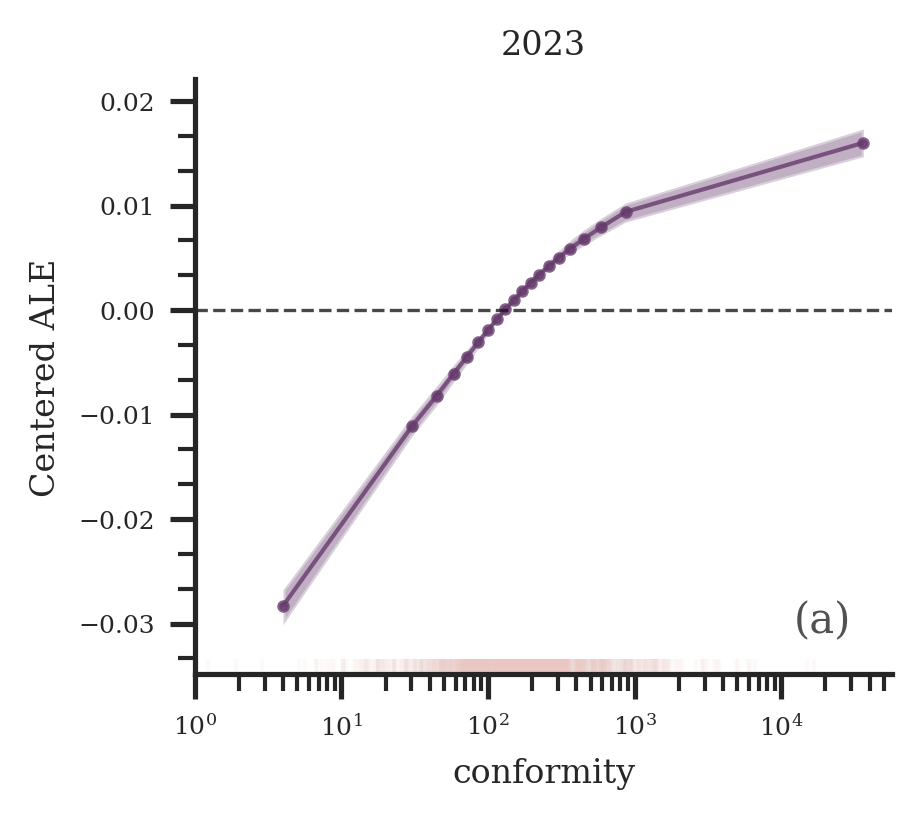

In [43]:
#修改可视化效果
#fig, ax = plt.subplots(dpi=300)
fig, ax = explainer.plot_ale(
                                   ale = ale_dataset,
                                   features='conformity',
                                   display_units=plotting_config.display_units,
                                   display_feature_names=plotting_config.display_feature_names,
                                   line_kws={'marker': 'o', 'markersize':2,'linewidth':1, 'line_colors': [cubehelix_palette[5]]},
                                   add_hist = False,
                                  )

ax.set_xscale('log')
ax.set_ylabel('Centered ALE', fontsize = 8)
# ax.set_xlim(right = 1000)
ax.set_xlim(left=1)
ax.set_title('2023')
# ax.set_xticks(conformity_bin_values_original)
# ax.set_xticklabels([f'{val:.2f}' for val in conformity_bin_values_original])

data = ale_dataset['conformity'].values
if len(data) > 1000:
    data_sample = np.random.choice(data, size=1000, replace=False)
else:
    data_sample = data
sns.rugplot(data_sample, ax=ax, color=cubehelix_palette[-2], alpha=0.1)

# plt.savefig('./figures/fig_1b_SCI_ale_1st.png',  dpi=300)
plt.show()

#### 三条线画在一起

the `interpolation=` argument to quantile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
2024-06-05 20:53:34.021 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         3.3522115  3.7701588  4.034947   4.2404075  4.410153
  4.559685   4.7016654  4.833743   4.9624524  5.096177   5.2282987
  5.3661466  5.510492   5.670125   5.8477364  6.0547256  6.317526
  6.641182   7.1561766 13.562077 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.18it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.20it/s]
2024-06-05 20:53:38.660 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         3.3522115  3.7701588  4.034947   4.2404075  4.410153
  4.559685   4.7016654  4.833743   4.9624524  5.096177   5.2282987
  5.3661466  5.510492   5.670125   5.8477364  6.0547256  6.317526
  6.641182   7.1561766 13.562077 ].


[ 1.6761057  3.5611851  3.9025528  4.137677   4.32528    4.484919
  4.6306753  4.767704   4.898098   5.029315   5.162238   5.2972226
  5.438319   5.590308   5.7589307  5.951231   6.1861258  6.479354
  6.8986793 10.359127 ]


2024-06-05 20:53:39.623 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         3.397922   3.8312364  4.0944448  4.2882943  4.4506803
  4.598153   4.732318   4.8635     4.9970784  5.1242514  5.2523956
  5.382361   5.5249276  5.677084   5.8486443  6.05182    6.303355
  6.628855   7.1203704 13.326252 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.37it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.48it/s]
2024-06-05 20:53:43.778 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         3.397922   3.8312364  4.0944448  4.2882943  4.4506803
  4.598153   4.732318   4.8635     4.9970784  5.1242514  5.2523956
  5.382361   5.5249276  5.677084   5.8486443  6.05182    6.303355
  6.628855   7.1203704 13.326252 ].


[ 1.698961   3.6145792  3.9628406  4.1913695  4.3694873  4.524417
  4.6652355  4.797909   4.9302893  5.060665   5.1883235  5.317378
  5.4536443  5.6010056  5.762864   5.950232   6.1775875  6.4661055
  6.874613  10.223311 ]


2024-06-05 20:53:44.758 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         3.4864469  3.8968203  4.148471   4.346667   4.5072646
  4.6460314  4.7760577  4.8931503  5.0076485  5.1230235  5.23524
  5.355909   5.4895115  5.6330695  5.793418   5.988898   6.225404
  6.549198   7.069562  13.530705 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.18it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.55it/s]
2024-06-05 20:53:48.870 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         3.4864469  3.8968203  4.148471   4.346667   4.5072646
  4.6460314  4.7760577  4.8931503  5.0076485  5.1230235  5.23524
  5.355909   5.4895115  5.6330695  5.793418   5.988898   6.225404
  6.549198   7.069562  13.530705 ].


[ 1.7432234  3.6916337  4.0226455  4.247569   4.4269657  4.5766478
  4.7110443  4.8346043  4.9503994  5.065336   5.1791315  5.295574
  5.4227104  5.5612907  5.7132435  5.891158   6.107151   6.387301
  6.80938   10.300134 ]


2024-06-05 20:53:49.824 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         3.4927125  3.893211   4.1491156  4.347888   4.503455
  4.646528   4.77652    4.8960614  5.019704   5.1465373  5.2660155
  5.3933682  5.533846   5.680776   5.8516273  6.054265   6.303512
  6.6035814  7.0439763 12.654121 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.76it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.44it/s]
2024-06-05 20:53:53.927 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         3.4927125  3.893211   4.1491156  4.347888   4.503455
  4.646528   4.77652    4.8960614  5.019704   5.1465373  5.2660155
  5.3933682  5.533846   5.680776   5.8516273  6.054265   6.303512
  6.6035814  7.0439763 12.654121 ].


[1.7463562 3.6929617 4.021163  4.248502  4.4256716 4.574991  4.711524
 4.8362904 4.957883  5.0831203 5.2062764 5.329692  5.463607  5.6073112
 5.766202  5.952946  6.1788883 6.4535465 6.823779  9.849049 ]


2024-06-05 20:53:54.876 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         3.3932076  3.8240175  4.086903   4.2783628  4.4362273
  4.5815105  4.711367   4.83739    4.95794    5.077359   5.1960444
  5.323754   5.457491   5.606973   5.7850137  5.9824467  6.245557
  6.57239    7.085317  13.235176 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.47it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.27it/s]
2024-06-05 20:53:58.969 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         3.3932076  3.8240175  4.086903   4.2783628  4.4362273
  4.5815105  4.711367   4.83739    4.95794    5.077359   5.1960444
  5.323754   5.457491   5.606973   5.7850137  5.9824467  6.245557
  6.57239    7.085317  13.235176 ].


[ 1.6966038  3.6086125  3.9554603  4.182633   4.357295   4.508869
  4.6464386  4.774379   4.897665   5.0176497  5.1367016  5.259899
  5.390622   5.5322323  5.6959934  5.88373    6.1140018  6.4089737
  6.8288536 10.160247 ]


2024-06-05 20:53:59.935 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         3.3931358  3.8109431  4.070996   4.2748613  4.4420757
  4.587796   4.7224607  4.8476925  4.975646   5.102417   5.228604
  5.358606   5.501128   5.659153   5.837361   6.054258   6.3129654
  6.630453   7.115582  12.976461 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.39it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.49it/s]
2024-06-05 20:54:04.096 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         3.3931358  3.8109431  4.070996   4.2748613  4.4420757
  4.587796   4.7224607  4.8476925  4.975646   5.102417   5.228604
  5.358606   5.501128   5.659153   5.837361   6.054258   6.3129654
  6.630453   7.115582  12.976461 ].


[ 1.6965679  3.6020393  3.9409695  4.172929   4.3584685  4.514936
  4.6551285  4.7850766  4.9116693  5.0390315  5.16551    5.293605
  5.429867   5.5801406  5.7482567  5.9458094  6.183612   6.4717093
  6.8730173 10.046021 ]


2024-06-05 20:54:05.050 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         3.2839272  3.7436044  4.038362   4.256999   4.4295397
  4.58035    4.7179685  4.844983   4.9711385  5.0947633  5.220937
  5.3458476  5.4888268  5.646771   5.815544   6.0165806  6.2742367
  6.59991    7.0640383 13.280906 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.48it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.94it/s]
2024-06-05 20:54:09.197 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         3.2839272  3.7436044  4.038362   4.256999   4.4295397
  4.58035    4.7179685  4.844983   4.9711385  5.0947633  5.220937
  5.3458476  5.4888268  5.646771   5.815544   6.0165806  6.2742367
  6.59991    7.0640383 13.280906 ].


[ 1.6419636  3.5137658  3.890983   4.1476803  4.3432693  4.504945
  4.6491594  4.781476   4.908061   5.032951   5.1578503  5.283392
  5.4173374  5.5677986  5.7311573  5.9160624  6.1454086  6.437073
  6.831974  10.172472 ]


2024-06-05 20:54:10.167 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         3.3539333  3.8150618  4.098791   4.3057904  4.4792047
  4.625747   4.7631655  4.888327   5.0102105  5.135489   5.2565107
  5.388363   5.5303674  5.672688   5.8430085  6.0462766  6.3054147
  6.6320662  7.0707626 11.986304 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.34it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.39it/s]
2024-06-05 20:54:14.261 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         3.3539333  3.8150618  4.098791   4.3057904  4.4792047
  4.625747   4.7631655  4.888327   5.0102105  5.135489   5.2565107
  5.388363   5.5303674  5.672688   5.8430085  6.0462766  6.3054147
  6.6320662  7.0707626 11.986304 ].


[1.6769667 3.5844975 3.9569263 4.2022905 4.3924975 4.552476  4.694456
 4.8257465 4.949269  5.0728498 5.196     5.322437  5.459365  5.6015277
 5.7578483 5.9446425 6.1758456 6.4687405 6.8514147 9.528534 ]


2024-06-05 20:54:15.216 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         3.4411993  3.8839302  4.15668    4.3567567  4.5235596
  4.6642423  4.793263   4.9220977  5.04085    5.1649137  5.2899675
  5.425755   5.5685515  5.7274194  5.897333   6.1033163  6.352057
  6.6610684  7.12429   13.314538 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.70it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.52it/s]
2024-06-05 20:54:19.293 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         3.4411993  3.8839302  4.15668    4.3567567  4.5235596
  4.6642423  4.793263   4.9220977  5.04085    5.1649137  5.2899675
  5.425755   5.5685515  5.7274194  5.897333   6.1033163  6.352057
  6.6610684  7.12429   13.314538 ].


[ 1.7205997  3.6625648  4.020305   4.2567186  4.440158   4.5939007
  4.7287526  4.8576803  4.981474   5.102882   5.227441   5.3578615
  5.4971533  5.6479855  5.812376   6.0003247  6.227687   6.5065627
  6.892679  10.219414 ]


2024-06-05 20:54:20.247 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         3.3372636  3.778722   4.0492377  4.25134    4.423977
  4.578709   4.713048   4.8383822  4.9597     5.0823593  5.209273
  5.3420434  5.4809594  5.6349435  5.8111863  6.010743   6.2560287
  6.576683   7.1055975 12.78625  ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.50it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.93it/s]
2024-06-05 20:54:24.345 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         3.3372636  3.778722   4.0492377  4.25134    4.423977
  4.578709   4.713048   4.8383822  4.9597     5.0823593  5.209273
  5.3420434  5.4809594  5.6349435  5.8111863  6.010743   6.2560287
  6.576683   7.1055975 12.78625  ].


[1.6686318 3.557993  3.91398   4.1502886 4.3376584 4.501343  4.645879
 4.775715  4.899041  5.0210295 5.145816  5.275658  5.4115014 5.5579515
 5.723065  5.910965  6.1333857 6.416356  6.8411403 9.945924 ]


2024-06-05 20:54:25.298 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         3.4002664  3.804492   4.0631285  4.263561   4.429369
  4.5788784  4.7129583  4.835252   4.954317   5.0776854  5.199602
  5.317511   5.4535613  5.5949454  5.7610908  5.9565935  6.205234
  6.5021324  7.0082054 12.033688 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.48it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.89it/s]
2024-06-05 20:54:29.433 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         3.4002664  3.804492   4.0631285  4.263561   4.429369
  4.5788784  4.7129583  4.835252   4.954317   5.0776854  5.199602
  5.317511   5.4535613  5.5949454  5.7610908  5.9565935  6.205234
  6.5021324  7.0082054 12.033688 ].


[1.7001332 3.6023793 3.9338102 4.1633444 4.346465  4.5041237 4.6459184
 4.774105  4.8947845 5.016001  5.1386437 5.2585564 5.385536  5.5242534
 5.678018  5.858842  6.0809135 6.3536835 6.755169  9.5209465]


2024-06-05 20:54:30.390 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         3.3962672  3.824185   4.09669    4.2999473  4.4645147
  4.6078362  4.7357926  4.8597136  4.983484   5.104875   5.228345
  5.3558993  5.499965   5.649114   5.818159   6.013216   6.2577915
  6.5775876  7.0786424 12.969284 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.43it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.90it/s]
2024-06-05 20:54:34.769 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         3.3962672  3.824185   4.09669    4.2999473  4.4645147
  4.6078362  4.7357926  4.8597136  4.983484   5.104875   5.228345
  5.3558993  5.499965   5.649114   5.818159   6.013216   6.2577915
  6.5775876  7.0786424 12.969284 ].


[ 1.6981336  3.6102262  3.9604375  4.1983185  4.3822308  4.5361757
  4.6718144  4.7977533  4.9215984  5.0441794  5.16661    5.292122
  5.4279323  5.5745397  5.733637   5.9156876  6.135504   6.4176893
  6.828115  10.023963 ]


2024-06-05 20:54:35.755 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         3.4786305  3.89461    4.150778   4.344701   4.5098786
  4.655409   4.78945    4.915151   5.0346704  5.1579924  5.2787676
  5.4049373  5.5344048  5.687277   5.8623214  6.070401   6.334177
  6.674362   7.156161  13.334513 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.18it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.35it/s]
2024-06-05 20:54:40.079 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         3.4786305  3.89461    4.150778   4.344701   4.5098786
  4.655409   4.78945    4.915151   5.0346704  5.1579924  5.2787676
  5.4049373  5.5344048  5.687277   5.8623214  6.070401   6.334177
  6.674362   7.156161  13.334513 ].


[ 1.7393153  3.6866202  4.0226936  4.2477393  4.42729    4.5826435
  4.7224293  4.8523006  4.9749107  5.0963316  5.21838    5.341852
  5.4696712  5.610841   5.7747993  5.966361   6.202289   6.5042696
  6.9152613 10.245337 ]


2024-06-05 20:54:41.051 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         3.320482   3.7600124  4.0493426  4.2692585  4.4410777
  4.5916495  4.724578   4.853307   4.9776616  5.1022763  5.230057
  5.362736   5.497797   5.656455   5.8248625  6.0254903  6.272751
  6.5799575  7.0294304 13.136269 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.59it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.23it/s]
2024-06-05 20:54:45.484 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         3.320482   3.7600124  4.0493426  4.2692585  4.4410777
  4.5916495  4.724578   4.853307   4.9776616  5.1022763  5.230057
  5.362736   5.497797   5.656455   5.8248625  6.0254903  6.272751
  6.5799575  7.0294304 13.136269 ].


[ 1.660241   3.5402472  3.9046774  4.159301   4.3551683  4.5163636
  4.6581135  4.7889423  4.9154844  5.039969   5.1661663  5.2963963
  5.4302664  5.577126   5.7406588  5.9251766  6.1491203  6.4263544
  6.804694  10.0828495]


2024-06-05 20:54:46.445 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         3.4489794  3.8808184  4.1444345  4.344973   4.5108595
  4.660467   4.794788   4.923272   5.0464463  5.1685038  5.2950783
  5.4250875  5.5641184  5.718467   5.8942933  6.0834675  6.319753
  6.623871   7.1121798 13.562077 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.21it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.64it/s]
2024-06-05 20:54:50.754 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         3.4489794  3.8808184  4.1444345  4.344973   4.5108595
  4.660467   4.794788   4.923272   5.0464463  5.1685038  5.2950783
  5.4250875  5.5641184  5.718467   5.8942933  6.0834675  6.319753
  6.623871   7.1121798 13.562077 ].


[ 1.7244897  3.6648989  4.0126266  4.244704   4.4279165  4.5856633
  4.7276278  4.85903    4.9848595  5.1074753  5.231791   5.3600826
  5.494603   5.6412926  5.8063803  5.98888    6.2016106  6.4718122
  6.8680253 10.337128 ]


2024-06-05 20:54:51.729 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         3.4108787  3.8484244  4.1256447  4.3287096  4.4959593
  4.6374235  4.7716694  4.8965716  5.022335   5.142418   5.266761
  5.39567    5.5306315  5.678541   5.8416348  6.033422   6.272653
  6.584854   7.080669  12.874212 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.40it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.16it/s]
2024-06-05 20:54:55.999 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         3.4108787  3.8484244  4.1256447  4.3287096  4.4959593
  4.6374235  4.7716694  4.8965716  5.022335   5.142418   5.266761
  5.39567    5.5306315  5.678541   5.8416348  6.033422   6.272653
  6.584854   7.080669  12.874212 ].


[1.7054393 3.6296515 3.9870346 4.227177  4.4123344 4.5666914 4.7045465
 4.8341208 4.9594536 5.0823765 5.2045894 5.3312154 5.463151  5.6045866
 5.760088  5.9375286 6.1530375 6.428754  6.832762  9.977441 ]


2024-06-05 20:54:56.993 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         3.348416   3.8061845  4.0858107  4.3026347  4.472817
  4.620171   4.753178   4.8833895  5.0052643  5.1242843  5.2464323
  5.374419   5.509289   5.65795    5.8340187  6.0518055  6.295243
  6.6232214  7.1274233 13.213832 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.08it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.49it/s]
2024-06-05 20:55:01.274 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         3.348416   3.8061845  4.0858107  4.3026347  4.472817
  4.620171   4.753178   4.8833895  5.0052643  5.1242843  5.2464323
  5.374419   5.509289   5.65795    5.8340187  6.0518055  6.295243
  6.6232214  7.1274233 13.213832 ].


[ 1.674208   3.5773003  3.9459977  4.1942225  4.387726   4.546494
  4.6866746  4.818284   4.944327   5.0647745  5.185358   5.3104258
  5.441854   5.583619   5.745984   5.942912   6.173524   6.4592323
  6.8753223 10.170628 ]


2024-06-05 20:55:02.256 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         3.4036     3.8448503  4.1122518  4.3062963  4.4645147
  4.6041155  4.736626   4.8617744  4.9813976  5.1044216  5.2228856
  5.3521676  5.4928074  5.644062   5.8151298  6.014327   6.2635264
  6.5806394  7.071028  13.289472 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.30it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.41it/s]
2024-06-05 20:55:06.522 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         3.4036     3.8448503  4.1122518  4.3062963  4.4645147
  4.6041155  4.736626   4.8617744  4.9813976  5.1044216  5.2228856
  5.3521676  5.4928074  5.644062   5.8151298  6.014327   6.2635264
  6.5806394  7.071028  13.289472 ].


[ 1.7018     3.6242251  3.978551   4.2092743  4.3854055  4.534315
  4.670371   4.7992     4.921586   5.0429096  5.1636534  5.2875266
  5.4224873  5.5684347  5.729596   5.914728   6.1389265  6.422083
  6.825834  10.18025  ]


2024-06-05 20:55:07.475 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         3.3747432  3.8113298  4.086774   4.2953343  4.4592624
  4.606079   4.7395625  4.8687387  4.991773   5.111342   5.2331347
  5.353623   5.493388   5.6436453  5.8148108  6.018697   6.274393
  6.5992002  7.0935555 12.383512 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.81it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.86it/s]
2024-06-05 20:55:11.702 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         3.3747432  3.8113298  4.086774   4.2953343  4.4592624
  4.606079   4.7395625  4.8687387  4.991773   5.111342   5.2331347
  5.353623   5.493388   5.6436453  5.8148108  6.018697   6.274393
  6.5992002  7.0935555 12.383512 ].


[1.6873716 3.5930367 3.9490519 4.1910543 4.3772984 4.532671  4.672821
 4.8041506 4.930256  5.0515575 5.1722383 5.293379  5.423506  5.5685167
 5.729228  5.916754  6.146545  6.4367967 6.846378  9.738533 ]


2024-06-05 20:55:12.651 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         3.4289603  3.8486533  4.111222   4.3073773  4.4733152
  4.614847   4.742748   4.8684626  4.989632   5.1052246  5.230758
  5.357621   5.4981804  5.658691   5.830756   6.036295   6.271925
  6.575611   7.0398755 12.17737  ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.43it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.31it/s]
2024-06-05 20:55:16.910 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         3.4289603  3.8486533  4.111222   4.3073773  4.4733152
  4.614847   4.742748   4.8684626  4.989632   5.1052246  5.230758
  5.357621   5.4981804  5.658691   5.830756   6.036295   6.271925
  6.575611   7.0398755 12.17737  ].


[1.7144802 3.6388068 3.9799376 4.2092996 4.3903465 4.544081  4.6787977
 4.805605  4.9290476 5.047428  5.1679916 5.2941895 5.427901  5.578436
 5.7447233 5.9335256 6.15411   6.423768  6.807743  9.608623 ]


More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
2024-06-05 20:55:17.854 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         3.3841388  3.8203306  4.0903263  4.290038   4.4550123
  4.6021657  4.730221   4.855051   4.9761705  5.0901556  5.209811
  5.329895   5.4652877  5.6060815  5.7668285  5.9625564  6.1946125
  6.491461   7.0130157 13.530705 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.36it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.52it/s]
2024-06-05 20:55:21.984 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         3.3841388  3.8203306  4.0903263  4.290038   4.4550123
  4.6021657  4.730221   4.855051   4.9761705  5.0901556  5.209811
  5.329895   5.4652877  5.6060815  5.7668285  5.9625564  6.1946125
  6.491461   7.0130157 13.530705 ].


[ 1.6920694  3.6022348  3.9553285  4.190182   4.372525   4.5285892
  4.666193   4.792636   4.915611   5.033163   5.1499834  5.269853
  5.3975916  5.5356846  5.686455   5.8646927  6.0785847  6.3430367
  6.7522383 10.27186  ]


2024-06-05 20:55:22.934 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         3.446757   3.8642323  4.12376    4.3246245  4.4874396
  4.6296506  4.760523   4.880717   5.003294   5.1232195  5.2453604
  5.366035   5.4955134  5.6466336  5.812217   6.0114317  6.254371
  6.5538316  7.033764  13.530705 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.41it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.02it/s]
2024-06-05 20:55:27.286 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         3.446757   3.8642323  4.12376    4.3246245  4.4874396
  4.6296506  4.760523   4.880717   5.003294   5.1232195  5.2453604
  5.366035   5.4955134  5.6466336  5.812217   6.0114317  6.254371
  6.5538316  7.033764  13.530705 ].


[ 1.7233785  3.6554947  3.9939961  4.2241926  4.406032   4.558545
  4.6950865  4.8206196  4.942005   5.0632567  5.18429    5.3056974
  5.430774   5.5710735  5.7294254  5.911824   6.132901   6.4041014
  6.7937975 10.282234 ]


2024-06-05 20:55:28.274 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         3.4697719  3.8896546  4.1409698  4.330226   4.492086
  4.637277   4.7672567  4.8898063  5.008586   5.122176   5.2401447
  5.3559937  5.482585   5.634436   5.800419   5.995264   6.242068
  6.5646687  7.0330706 12.770764 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.83it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.09it/s]
2024-06-05 20:55:32.657 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         3.4697719  3.8896546  4.1409698  4.330226   4.492086
  4.637277   4.7672567  4.8898063  5.008586   5.122176   5.2401447
  5.3559937  5.482585   5.634436   5.800419   5.995264   6.242068
  6.5646687  7.0330706 12.770764 ].


[1.7348859 3.6797132 4.015312  4.2355976 4.4111557 4.5646815 4.7022667
 4.8285313 4.949196  5.065381  5.1811604 5.298069  5.4192896 5.558511
 5.7174273 5.8978415 6.1186657 6.403368  6.7988696 9.901917 ]


2024-06-05 20:55:33.627 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         3.3753767  3.8209574  4.0884748  4.285597   4.4474587
  4.590869   4.7313027  4.858337   4.983436   5.1069336  5.234999
  5.3615055  5.5098333  5.6783338  5.859837   6.065781   6.3115616
  6.620459   7.093124  13.3216915].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.90it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.31it/s]
2024-06-05 20:55:38.091 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         3.3753767  3.8209574  4.0884748  4.285597   4.4474587
  4.590869   4.7313027  4.858337   4.983436   5.1069336  5.234999
  5.3615055  5.5098333  5.6783338  5.859837   6.065781   6.3115616
  6.620459   7.093124  13.3216915].


[ 1.6876884  3.598167   3.9547162  4.1870356  4.3665276  4.519164
  4.661086   4.79482    4.9208865  5.045185   5.170966   5.298252
  5.4356694  5.594084   5.7690854  5.962809   6.188671   6.46601
  6.8567915 10.207408 ]


2024-06-05 20:55:39.061 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         3.4604075  3.8699346  4.125973   4.329734   4.4937963
  4.63906    4.7714195  4.8924932  5.018667   5.1408978  5.2633758
  5.3857055  5.520072   5.675847   5.845383   6.0517273  6.2974687
  6.620832   7.125522  12.9328985].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.20it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.33it/s]
2024-06-05 20:55:43.485 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         3.4604075  3.8699346  4.125973   4.329734   4.4937963
  4.63906    4.7714195  4.8924932  5.018667   5.1408978  5.2633758
  5.3857055  5.520072   5.675847   5.845383   6.0517273  6.2974687
  6.620832   7.125522  12.9328985].


[ 1.7302037  3.6651711  3.997954   4.227854   4.411765   4.566428
  4.70524    4.8319564  4.95558    5.0797825  5.202137   5.3245406
  5.4528885  5.5979595  5.7606153  5.948555   6.1745977  6.4591503
  6.873177  10.02921  ]


2024-06-05 20:55:44.455 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         3.2999437  3.754209   4.0494456  4.2637606  4.4306393
  4.5797863  4.712251   4.841519   4.966335   5.091148   5.214346
  5.3405833  5.4814086  5.63869    5.807334   6.0262375  6.2814436
  6.588871   7.0469913 13.482539 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.38it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.69it/s]
2024-06-05 20:55:48.771 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         3.2999437  3.754209   4.0494456  4.2637606  4.4306393
  4.5797863  4.712251   4.841519   4.966335   5.091148   5.214346
  5.3405833  5.4814086  5.63869    5.807334   6.0262375  6.2814436
  6.588871   7.0469913 13.482539 ].


[ 1.6499718  3.5270762  3.9018273  4.156603   4.3472     4.505213
  4.646019   4.776885   4.903927   5.0287414  5.152747   5.277465
  5.410996   5.560049   5.723012   5.9167857  6.1538405  6.4351573
  6.817931  10.264765 ]


2024-06-05 20:55:49.740 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         3.4431283  3.8506732  4.1132526  4.31213    4.4754486
  4.620167   4.7519016  4.882531   5.009979   5.137033   5.261588
  5.3938093  5.5372157  5.682593   5.8562746  6.0438094  6.2757382
  6.596049   7.0958467 12.513157 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.27it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.49it/s]
2024-06-05 20:55:53.991 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         3.4431283  3.8506732  4.1132526  4.31213    4.4754486
  4.620167   4.7519016  4.882531   5.009979   5.137033   5.261588
  5.3938093  5.5372157  5.682593   5.8562746  6.0438094  6.2757382
  6.596049   7.0958467 12.513157 ].


[1.7215642 3.6469007 3.981963  4.2126913 4.3937893 4.5478077 4.686034
 4.8172164 4.9462547 5.073506  5.1993103 5.3276987 5.4655123 5.6099043
 5.769434  5.950042  6.159774  6.4358935 6.8459477 9.804502 ]


2024-06-05 20:55:54.949 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         3.3441064  3.7738872  4.046022   4.2485204  4.4146414
  4.557539   4.689948   4.817374   4.9390545  5.0637846  5.192039
  5.3227243  5.4696207  5.6301208  5.8104725  6.01847    6.266063
  6.6041374  7.0910115 13.370006 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.13it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.99it/s]
2024-06-05 20:55:59.256 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         3.3441064  3.7738872  4.046022   4.2485204  4.4146414
  4.557539   4.689948   4.817374   4.9390545  5.0637846  5.192039
  5.3227243  5.4696207  5.6301208  5.8104725  6.01847    6.266063
  6.6041374  7.0910115 13.370006 ].


[ 1.6720532  3.5589967  3.9099545  4.147271   4.331581   4.48609
  4.6237435  4.753661   4.8782144  5.0014195  5.1279116  5.2573814
  5.3961725  5.5498705  5.720297   5.914471   6.1422663  6.4351006
  6.847574  10.230509 ]


2024-06-05 20:56:00.215 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         3.3551886  3.7811391  4.0546384  4.25942    4.427701
  4.5757127  4.7095304  4.8396535  4.9616795  5.0842056  5.2041874
  5.331382   5.470558   5.625795   5.7968717  6.0060825  6.2545304
  6.5843983  7.0606956 13.367286 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.28it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.88it/s]
2024-06-05 20:56:04.509 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         3.3551886  3.7811391  4.0546384  4.25942    4.427701
  4.5757127  4.7095304  4.8396535  4.9616795  5.0842056  5.2041874
  5.331382   5.470558   5.625795   5.7968717  6.0060825  6.2545304
  6.5843983  7.0606956 13.367286 ].


[ 1.6775943  3.5681639  3.9178886  4.157029   4.34356    4.501707
  4.6426215  4.774592   4.900666   5.0229425  5.1441965  5.2677846
  5.40097    5.548177   5.7113333  5.901477   6.1303062  6.419464
  6.822547  10.213991 ]


2024-06-05 20:56:05.467 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         3.4432273  3.8687901  4.12339    4.31726    4.4759808
  4.620034   4.751008   4.8750744  4.9969926  5.1157665  5.241352
  5.3660264  5.5017095  5.6479106  5.804757   6.011845   6.2641416
  6.5832257  7.0878687 12.823745 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.67it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.60it/s]
2024-06-05 20:56:09.766 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         3.4432273  3.8687901  4.12339    4.31726    4.4759808
  4.620034   4.751008   4.8750744  4.9969926  5.1157665  5.241352
  5.3660264  5.5017095  5.6479106  5.804757   6.011845   6.2641416
  6.5832257  7.0878687 12.823745 ].


[1.7216136 3.6560087 3.9960902 4.220325  4.3966203 4.5480075 4.685521
 4.813041  4.9360332 5.0563793 5.1785593 5.303689  5.433868  5.57481
 5.7263336 5.9083014 6.1379933 6.4236836 6.8355474 9.955807 ]


2024-06-05 20:56:10.741 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         2.7745605  3.1992245  3.4718583  3.693539   3.8811269
  4.0433283  4.188782   4.3323364  4.4717064  4.6102138  4.749321
  4.8877306  5.0334005  5.1989746  5.3728676  5.5824094  5.8342834
  6.159364   6.6607075 10.511921 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.43it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.34it/s]
2024-06-05 20:56:15.034 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         2.7745605  3.1992245  3.4718583  3.693539   3.8811269
  4.0433283  4.188782   4.3323364  4.4717064  4.6102138  4.749321
  4.8877306  5.0334005  5.1989746  5.3728676  5.5824094  5.8342834
  6.159364   6.6607075 10.511921 ].


[1.3872802 2.9868925 3.3355412 3.5826986 3.787333  3.9622276 4.1160555
 4.260559  4.4020214 4.5409603 4.6797676 4.818526  4.9605656 5.1161876
 5.285921  5.4776382 5.7083464 5.996824  6.410036  8.586314 ]


2024-06-05 20:56:15.989 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [0.        2.750283  3.1745508 3.449953  3.676533  3.8655944 4.025719
 4.1729474 4.3146434 4.44775   4.5764074 4.7046328 4.8404317 4.982446
 5.137015  5.3119264 5.5193434 5.7696147 6.101246  6.6086497 9.843791 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.35it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.56it/s]
2024-06-05 20:56:20.218 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [0.        2.750283  3.1745508 3.449953  3.676533  3.8655944 4.025719
 4.1729474 4.3146434 4.44775   4.5764074 4.7046328 4.8404317 4.982446
 5.137015  5.3119264 5.5193434 5.7696147 6.101246  6.6086497 9.843791 ].


[1.3751415 2.962417  3.312252  3.563243  3.7710638 3.9456568 4.0993333
 4.2437954 4.381197  4.512079  4.64052   4.7725325 4.911439  5.0597305
 5.2244706 5.415635  5.644479  5.9354305 6.354948  8.22622  ]


2024-06-05 20:56:21.176 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         2.820551   3.2295852  3.5003128  3.721147   3.9130507
  4.069199   4.2166615  4.3524776  4.4929285  4.6319203  4.762336
  4.8950753  5.0382013  5.19172    5.362999   5.5669384  5.8302836
  6.1653843  6.652784  10.063734 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.80it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.43it/s]
2024-06-05 20:56:25.483 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         2.820551   3.2295852  3.5003128  3.721147   3.9130507
  4.069199   4.2166615  4.3524776  4.4929285  4.6319203  4.762336
  4.8950753  5.0382013  5.19172    5.362999   5.5669384  5.8302836
  6.1653843  6.652784  10.063734 ].


[1.4102755 3.025068  3.364949  3.61073   3.8170989 3.9911249 4.14293
 4.2845697 4.422703  4.5624247 4.6971283 4.828706  4.9666386 5.1149607
 5.2773595 5.4649687 5.6986113 5.997834  6.4090843 8.358259 ]


2024-06-05 20:56:26.436 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [0.        2.8113644 3.2328649 3.510999  3.7318227 3.9108987 4.069117
 4.217085  4.354641  4.489248  4.6204133 4.7527337 4.8907347 5.0321894
 5.1844196 5.353215  5.557029  5.8012185 6.134123  6.643503  9.676023 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.33it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.53it/s]
2024-06-05 20:56:30.633 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [0.        2.8113644 3.2328649 3.510999  3.7318227 3.9108987 4.069117
 4.217085  4.354641  4.489248  4.6204133 4.7527337 4.8907347 5.0321894
 5.1844196 5.353215  5.557029  5.8012185 6.134123  6.643503  9.676023 ].


[1.4056822 3.0221148 3.371932  3.6214108 3.8213606 3.9900079 4.1431007
 4.285863  4.4219446 4.5548306 4.6865735 4.8217344 4.961462  5.1083045
 5.2688174 5.455122  5.679124  5.9676704 6.388813  8.159763 ]


2024-06-05 20:56:31.600 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         2.8152845  3.231478   3.5143914  3.7369237  3.9258277
  4.088163   4.234351   4.3720717  4.5028386  4.6376414  4.772652
  4.910927   5.050717   5.2084885  5.3800755  5.593923   5.86334
  6.1989985  6.6751738 10.085851 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.79it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.44it/s]
2024-06-05 20:56:35.866 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         2.8152845  3.231478   3.5143914  3.7369237  3.9258277
  4.088163   4.234351   4.3720717  4.5028386  4.6376414  4.772652
  4.910927   5.050717   5.2084885  5.3800755  5.593923   5.86334
  6.1989985  6.6751738 10.085851 ].


[1.4076422 3.0233812 3.3729348 3.6256576 3.8313756 4.006995  4.161257
 4.303211  4.437455  4.57024   4.705147  4.8417892 4.9808216 5.1296024
 5.294282  5.4869995 5.7286315 6.031169  6.437086  8.380512 ]


2024-06-05 20:56:36.834 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [0.        2.743839  3.1757061 3.4632535 3.6870985 3.8728657 4.0368066
 4.1887207 4.3294835 4.464589  4.5983586 4.7271333 4.8573623 4.9946146
 5.1421976 5.312801  5.517082  5.7525315 6.0728965 6.5449443 9.845382 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.13it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.69it/s]
2024-06-05 20:56:41.189 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [0.        2.743839  3.1757061 3.4632535 3.6870985 3.8728657 4.0368066
 4.1887207 4.3294835 4.464589  4.5983586 4.7271333 4.8573623 4.9946146
 5.1421976 5.312801  5.517082  5.7525315 6.0728965 6.5449443 9.845382 ].


[1.3719195 2.9597726 3.31948   3.575176  3.779982  3.9548361 4.1127634
 4.259102  4.3970366 4.531474  4.662746  4.792248  4.925988  5.068406
 5.227499  5.414942  5.6348066 5.912714  6.3089204 8.195163 ]


2024-06-05 20:56:42.158 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         2.8082683  3.2207856  3.500966   3.7295182  3.9173224
  4.073255   4.2150655  4.3509564  4.485173   4.6141863  4.743973
  4.875591   5.012594   5.1666207  5.3460503  5.540734   5.768301
  6.073777   6.537144  10.134639 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.39it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.68it/s]
2024-06-05 20:56:46.420 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         2.8082683  3.2207856  3.500966   3.7295182  3.9173224
  4.073255   4.2150655  4.3509564  4.485173   4.6141863  4.743973
  4.875591   5.012594   5.1666207  5.3460503  5.540734   5.768301
  6.073777   6.537144  10.134639 ].


[1.4041342 3.0145268 3.3608758 3.615242  3.8234203 3.9952888 4.1441603
 4.283011  4.418065  4.5496798 4.6790795 4.809782  4.9440928 5.0896072
 5.2563353 5.443392  5.654517  5.921039  6.305461  8.335892 ]


2024-06-05 20:56:47.408 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         2.7247238  3.181156   3.4696434  3.7040915  3.891383
  4.0562005  4.2083244  4.345625   4.479538   4.614198   4.739005
  4.8716316  5.0116644  5.1686516  5.349458   5.5611005  5.8143525
  6.15144    6.6380334 10.339514 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.86it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.40it/s]
2024-06-05 20:56:51.854 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         2.7247238  3.181156   3.4696434  3.7040915  3.891383
  4.0562005  4.2083244  4.345625   4.479538   4.614198   4.739005
  4.8716316  5.0116644  5.1686516  5.349458   5.5611005  5.8143525
  6.15144    6.6380334 10.339514 ].


[1.3623619 2.95294   3.3253996 3.5868673 3.7977371 3.9737916 4.132262
 4.2769747 4.4125814 4.5468683 4.6766014 4.8053184 4.941648  5.090158
 5.259055  5.4552794 5.6877265 5.9828963 6.394737  8.488773 ]


2024-06-05 20:56:52.851 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         2.8444767  3.2487254  3.5189087  3.74011    3.9250891
  4.0849004  4.2304506  4.3709316  4.4998097  4.62404    4.7497067
  4.875949   5.012603   5.164519   5.333415   5.530443   5.7694225
  6.100196   6.5553007 10.583575 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.23it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.24it/s]
2024-06-05 20:56:57.434 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         2.8444767  3.2487254  3.5189087  3.74011    3.9250891
  4.0849004  4.2304506  4.3709316  4.4998097  4.62404    4.7497067
  4.875949   5.012603   5.164519   5.333415   5.530443   5.7694225
  6.100196   6.5553007 10.583575 ].


[1.4222383 3.046601  3.3838172 3.6295094 3.8325996 4.004995  4.1576757
 4.300691  4.4353704 4.561925  4.6868734 4.812828  4.944276  5.088561
 5.248967  5.431929  5.649933  5.934809  6.3277483 8.569438 ]


2024-06-05 20:56:58.418 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [0.        2.790897  3.2131834 3.482474  3.7034743 3.8869996 4.0513244
 4.200915  4.340352  4.473346  4.6112914 4.7441893 4.876157  5.017137
 5.1687965 5.3370275 5.537031  5.7825413 6.150843  6.6750016 9.9248085].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.91it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.31it/s]
2024-06-05 20:57:03.000 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [0.        2.790897  3.2131834 3.482474  3.7034743 3.8869996 4.0513244
 4.200915  4.340352  4.473346  4.6112914 4.7441893 4.876157  5.017137
 5.1687965 5.3370275 5.537031  5.7825413 6.150843  6.6750016 9.9248085].


[1.3954484 3.0020401 3.3478289 3.5929742 3.795237  3.969162  4.1261196
 4.2706337 4.406849  4.542319  4.67774   4.810173  4.9466467 5.092967
 5.252912  5.4370294 5.659786  5.966692  6.4129224 8.299905 ]


2024-06-05 20:57:03.990 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         2.73476    3.184268   3.479476   3.7101471  3.9019728
  4.064838   4.208258   4.340759   4.4742374  4.6034474  4.729468
  4.862723   4.9998016  5.1461363  5.314188   5.5248165  5.792596
  6.1627464  6.6645784 10.134639 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.83it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.86it/s]
2024-06-05 20:57:08.625 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         2.73476    3.184268   3.479476   3.7101471  3.9019728
  4.064838   4.208258   4.340759   4.4742374  4.6034474  4.729468
  4.862723   4.9998016  5.1461363  5.314188   5.5248165  5.792596
  6.1627464  6.6645784 10.134639 ].


[1.36738   2.9595141 3.331872  3.5948114 3.8060598 3.9834054 4.136548
 4.2745085 4.4074984 4.538842  4.6664577 4.7960954 4.931262  5.072969
 5.230162  5.4195023 5.658706  5.977671  6.4136624 8.399609 ]


2024-06-05 20:57:09.606 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [0.        2.7473197 3.1853628 3.4756382 3.6954753 3.8820872 4.0466566
 4.193227  4.3314776 4.4650564 4.592694  4.72781   4.866865  5.008643
 5.164181  5.338093  5.544508  5.809343  6.158185  6.6707106 9.927009 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.21it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.55it/s]
2024-06-05 20:57:14.075 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [0.        2.7473197 3.1853628 3.4756382 3.6954753 3.8820872 4.0466566
 4.193227  4.3314776 4.4650564 4.592694  4.72781   4.866865  5.008643
 5.164181  5.338093  5.544508  5.809343  6.158185  6.6707106 9.927009 ].


[1.3736598 2.9663413 3.3305006 3.5855567 3.7887812 3.964372  4.1199417
 4.262352  4.398267  4.5288754 4.6602516 4.7973375 4.937754  5.0864124
 5.251137  5.4413004 5.6769257 5.9837637 6.414448  8.29886  ]


2024-06-05 20:57:15.057 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         2.7568932  3.2087193  3.493156   3.7195988  3.908699
  4.0787263  4.228834   4.3662615  4.501247   4.635108   4.7628465
  4.8956428  5.0436406  5.1981463  5.374496   5.58005    5.847345
  6.194822   6.7188735 10.625975 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.44it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.24it/s]
2024-06-05 20:57:19.462 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         2.7568932  3.2087193  3.493156   3.7195988  3.908699
  4.0787263  4.228834   4.3662615  4.501247   4.635108   4.7628465
  4.8956428  5.0436406  5.1981463  5.374496   5.58005    5.847345
  6.194822   6.7188735 10.625975 ].


[1.3784466 2.9828062 3.3509376 3.6063774 3.814149  3.9937127 4.15378
 4.297548  4.433754  4.568177  4.6989775 4.8292446 4.9696417 5.1208935
 5.286321  5.477273  5.7136974 6.0210834 6.4568477 8.672424 ]


2024-06-05 20:57:20.432 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         2.7320898  3.1831791  3.4747674  3.7086425  3.8982282
  4.0584016  4.2038627  4.344137   4.477559   4.607168   4.7379785
  4.8734765  5.0165243  5.172743   5.338081   5.5362334  5.781183
  6.088897   6.585592  10.367253 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.27it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.74it/s]
2024-06-05 20:57:24.852 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         2.7320898  3.1831791  3.4747674  3.7086425  3.8982282
  4.0584016  4.2038627  4.344137   4.477559   4.607168   4.7379785
  4.8734765  5.0165243  5.172743   5.338081   5.5362334  5.781183
  6.088897   6.585592  10.367253 ].


[1.3660449 2.9576344 3.3289733 3.5917048 3.8034353 3.9783149 4.131132
 4.274     4.410848  4.5423636 4.672573  4.8057275 4.9450006 5.0946336
 5.255412  5.437157  5.658708  5.93504   6.3372445 8.476422 ]


2024-06-05 20:57:25.829 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [0.        2.83347   3.2462678 3.519803  3.7381778 3.9252164 4.086215
 4.2399364 4.3813834 4.5164633 4.648744  4.7841988 4.92037   5.056719
 5.206958  5.3829536 5.591592  5.836987  6.1487875 6.63071   9.952326 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.61it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.94it/s]
2024-06-05 20:57:30.253 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [0.        2.83347   3.2462678 3.519803  3.7381778 3.9252164 4.086215
 4.2399364 4.3813834 4.5164633 4.648744  4.7841988 4.92037   5.056719
 5.206958  5.3829536 5.591592  5.836987  6.1487875 6.63071   9.952326 ].


[1.416735  3.0398688 3.3830354 3.6289904 3.831697  4.005716  4.1630754
 4.31066   4.448923  4.5826035 4.7164717 4.8522844 4.9885445 5.1318383
 5.2949557 5.4872727 5.7142897 5.9928875 6.3897486 8.291518 ]


2024-06-05 20:57:31.218 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [0.        2.7734976 3.198568  3.4823716 3.707079  3.890596  4.05307
 4.1986647 4.3369975 4.4700336 4.600715  4.731947  4.868299  5.0065074
 5.1623526 5.3343773 5.5373006 5.7954764 6.14786   6.6624107 9.843791 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.20it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.30it/s]
2024-06-05 20:57:35.712 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [0.        2.7734976 3.198568  3.4823716 3.707079  3.890596  4.05307
 4.1986647 4.3369975 4.4700336 4.600715  4.731947  4.868299  5.0065074
 5.1623526 5.3343773 5.5373006 5.7954764 6.14786   6.6624107 9.843791 ].


[1.3867488 2.986033  3.3404698 3.5947251 3.7988374 3.971833  4.1258674
 4.267831  4.403516  4.5353746 4.6663313 4.800123  4.937403  5.0844297
 5.248365  5.4358387 5.6663885 5.9716682 6.405135  8.253101 ]


2024-06-05 20:57:36.712 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         2.7403197  3.1765976  3.4578192  3.6821163  3.8684194
  4.031733   4.182987   4.32644    4.4642825  4.593285   4.7222905
  4.8550634  4.9976335  5.1596518  5.341721   5.547578   5.7945147
  6.119082   6.584922  10.511921 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.97it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.39it/s]
2024-06-05 20:57:41.536 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         2.7403197  3.1765976  3.4578192  3.6821163  3.8684194
  4.031733   4.182987   4.32644    4.4642825  4.593285   4.7222905
  4.8550634  4.9976335  5.1596518  5.341721   5.547578   5.7945147
  6.119082   6.584922  10.511921 ].


[1.3701599 2.9584587 3.3172083 3.5699677 3.7752678 3.950076  4.10736
 4.2547135 4.395361  4.528784  4.657788  4.788677  4.9263487 5.078643
 5.2506866 5.4446497 5.6710463 5.9567986 6.352002  8.548422 ]


2024-06-05 20:57:42.522 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         2.7719107  3.2266927  3.5053885  3.732304   3.9230924
  4.0938926  4.2482386  4.3870926  4.51702    4.6495843  4.780513
  4.917574   5.0564637  5.210206   5.3790474  5.583796   5.8425407
  6.172083   6.6467795 10.912193 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.13it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.36it/s]
2024-06-05 20:57:47.168 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         2.7719107  3.2266927  3.5053885  3.732304   3.9230924
  4.0938926  4.2482386  4.3870926  4.51702    4.6495843  4.780513
  4.917574   5.0564637  5.210206   5.3790474  5.583796   5.8425407
  6.172083   6.6467795 10.912193 ].


[1.3859553 2.9993017 3.3660407 3.6188464 3.8276982 4.0084925 4.1710653
 4.3176656 4.4520564 4.5833025 4.715049  4.8490434 4.9870186 5.133335
 5.2946267 5.4814215 5.713168  6.007312  6.4094315 8.779487 ]


2024-06-05 20:57:48.154 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         2.8126307  3.2303882  3.4991446  3.7126133  3.8942115
  4.0553102  4.1986184  4.3340173  4.4660153  4.5985074  4.7265024
  4.8551106  4.9879503  5.1401906  5.3072495  5.5141554  5.7781906
  6.1303177  6.65864   10.249238 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.11it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.26it/s]
2024-06-05 20:57:52.708 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         2.8126307  3.2303882  3.4991446  3.7126133  3.8942115
  4.0553102  4.1986184  4.3340173  4.4660153  4.5985074  4.7265024
  4.8551106  4.9879503  5.1401906  5.3072495  5.5141554  5.7781906
  6.1303177  6.65864   10.249238 ].


[1.4063153 3.0215094 3.3647664 3.6058788 3.8034124 3.974761  4.1269646
 4.266318  4.4000163 4.5322614 4.662505  4.790807  4.9215307 5.0640707
 5.22372   5.4107027 5.646173  5.954254  6.394479  8.453939 ]


2024-06-05 20:57:53.683 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         2.771925   3.194119   3.4732647  3.692469   3.8709266
  4.0313377  4.179959   4.3188906  4.4578915  4.592697   4.72327
  4.8622923  5.0080767  5.1544065  5.329577   5.5396166  5.810239
  6.162393   6.6890464 10.249238 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.29it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.24it/s]
2024-06-05 20:57:58.083 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         2.771925   3.194119   3.4732647  3.692469   3.8709266
  4.0313377  4.179959   4.3188906  4.4578915  4.592697   4.72327
  4.8622923  5.0080767  5.1544065  5.329577   5.5396166  5.810239
  6.162393   6.6890464 10.249238 ].


[1.3859625 2.983022  3.3336918 3.5828667 3.7816978 3.9511323 4.105648
 4.249425  4.388391  4.5252943 4.657984  4.792781  4.9351845 5.0812416
 5.241992  5.434597  5.6749277 5.9863157 6.4257197 8.469142 ]


2024-06-05 20:57:59.063 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         2.722536   3.160694   3.442349   3.6635616  3.8476415
  4.015868   4.1648264  4.3043747  4.445601   4.582768   4.7187066
  4.8555827  5.0010037  5.1567125  5.329486   5.5297685  5.775804
  6.100038   6.608861  10.10197  ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.27it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.80it/s]
2024-06-05 20:58:03.490 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         2.722536   3.160694   3.442349   3.6635616  3.8476415
  4.015868   4.1648264  4.3043747  4.445601   4.582768   4.7187066
  4.8555827  5.0010037  5.1567125  5.329486   5.5297685  5.775804
  6.100038   6.608861  10.10197  ].


[1.361268  2.941615  3.3015213 3.5529552 3.7556014 3.9317548 4.0903473
 4.2346005 4.3749876 4.5141845 4.6507373 4.7871447 4.928293  5.0788584
 5.243099  5.4296274 5.6527863 5.937921  6.3544493 8.355415 ]


2024-06-05 20:58:04.469 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.04342222  2.828218    3.232502    3.5074902   3.7222657   3.904845
  4.0660605   4.21373     4.350405    4.4809785   4.6130433   4.7422376
  4.8757334   5.0172796   5.174708    5.340485    5.544799    5.79974
  6.1391287   6.628514   10.670489  ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.62it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.57it/s]
2024-06-05 20:58:08.853 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.04342222  2.828218    3.232502    3.5074902   3.7222657   3.904845
  4.0660605   4.21373     4.350405    4.4809785   4.6130433   4.7422376
  4.8757334   5.0172796   5.174708    5.340485    5.544799    5.79974
  6.1391287   6.628514   10.670489  ].


[1.4358201 3.03036   3.369996  3.614878  3.8135552 3.9854527 4.1398954
 4.2820673 4.415692  4.547011  4.6776404 4.8089857 4.9465065 5.095994
 5.2575965 5.442642  5.6722693 5.9694343 6.3838215 8.649502 ]


2024-06-05 20:58:09.819 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [0.        2.7805357 3.2017896 3.4770057 3.6966267 3.88274   4.042498
 4.1882763 4.3251624 4.4585366 4.585688  4.7114735 4.84201   4.9761615
 5.127889  5.299815  5.495974  5.7566767 6.096106  6.5836635 9.645429 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.54it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.43it/s]
2024-06-05 20:58:14.233 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [0.        2.7805357 3.2017896 3.4770057 3.6966267 3.88274   4.042498
 4.1882763 4.3251624 4.4585366 4.585688  4.7114735 4.84201   4.9761615
 5.127889  5.299815  5.495974  5.7566767 6.096106  6.5836635 9.645429 ].


[1.3902678 2.9911628 3.3393977 3.5868163 3.7896833 3.962619  4.115387
 4.2567196 4.3918495 4.5221124 4.6485806 4.776742  4.9090858 5.0520253
 5.213852  5.397895  5.6263256 5.9263916 6.3398848 8.114546 ]


2024-06-05 20:58:15.232 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         2.7691436  3.203888   3.4822018  3.7096164  3.8936532
  4.057913   4.198353   4.3334064  4.462263   4.5948644  4.7257457
  4.8655534  5.0154514  5.1715407  5.347825   5.5466733  5.7960114
  6.116634   6.57513   10.912193 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.47it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.28it/s]
2024-06-05 20:58:19.618 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         2.7691436  3.203888   3.4822018  3.7096164  3.8936532
  4.057913   4.198353   4.3334064  4.462263   4.5948644  4.7257457
  4.8655534  5.0154514  5.1715407  5.347825   5.5466733  5.7960114
  6.116634   6.57513   10.912193 ].


[1.3845718 2.9865158 3.3430448 3.595909  3.8016348 3.9757829 4.128133
 4.2658796 4.397835  4.5285635 4.660305  4.7956495 4.940502  5.0934963
 5.2596827 5.4472494 5.6713424 5.9563227 6.345882  8.743662 ]


2024-06-05 20:58:20.579 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [0.        2.7799435 3.1953552 3.482715  3.7023287 3.8885682 4.0519958
 4.1976943 4.3427973 4.4845285 4.6199503 4.753011  4.8931355 5.034085
 5.1960616 5.376581  5.5889215 5.859262  6.214757  6.6984553 9.066008 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.41it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.24it/s]
2024-06-05 20:58:24.894 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [0.        2.7799435 3.1953552 3.482715  3.7023287 3.8885682 4.0519958
 4.1976943 4.3427973 4.4845285 4.6199503 4.753011  4.8931355 5.034085
 5.1960616 5.376581  5.5889215 5.859262  6.214757  6.6984553 9.066008 ].


[1.3899717 2.9876494 3.339035  3.5925217 3.7954483 3.970282  4.124845
 4.2702456 4.413663  4.5522394 4.6864805 4.8230734 4.96361   5.115073
 5.2863216 5.4827514 5.7240915 6.0370092 6.456606  7.8822317]


2024-06-05 20:58:25.863 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         2.7242968  3.1730337  3.4726813  3.7016296  3.8870995
  4.0574     4.2054563  4.343882   4.4806633  4.612658   4.7421923
  4.874584   5.0126257  5.163274   5.3398647  5.538121   5.777901
  6.105557   6.6349554 10.406563 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.18it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.47it/s]
2024-06-05 20:58:30.288 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         2.7242968  3.1730337  3.4726813  3.7016296  3.8870995
  4.0574     4.2054563  4.343882   4.4806633  4.612658   4.7421923
  4.874584   5.0126257  5.163274   5.3398647  5.538121   5.777901
  6.105557   6.6349554 10.406563 ].


[1.3621484 2.9486651 3.3228574 3.5871553 3.7943645 3.97225   4.1314282
 4.274669  4.4122725 4.5466604 4.6774254 4.808388  4.943605  5.0879498
 5.2515693 5.438993  5.6580114 5.941729  6.3702564 8.52076  ]


2024-06-05 20:58:31.256 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [0.08269173 2.7993395  3.2284725  3.5115454  3.7324235  3.9117777
 4.0745196  4.221848   4.3630986  4.49575    4.626979   4.7534633
 4.884983   5.0202985  5.166995   5.3318043  5.5315404  5.7679014
 6.0831184  6.56662    9.932123  ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.22it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.23it/s]
2024-06-05 20:58:35.634 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [0.08269173 2.7993395  3.2284725  3.5115454  3.7324235  3.9117777
 4.0745196  4.221848   4.3630986  4.49575    4.626979   4.7534633
 4.884983   5.0202985  5.166995   5.3318043  5.5315404  5.7679014
 6.0831184  6.56662    9.932123  ].


[1.4410156 3.013906  3.370009  3.6219845 3.8221006 3.9931488 4.148184
 4.2924733 4.4294243 4.561364  4.690221  4.8192234 4.9526405 5.093647
 5.2493997 5.431672  5.649721  5.92551   6.324869  8.249372 ]


2024-06-05 20:58:36.613 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         2.8387842  3.2571027  3.5330276  3.7497134  3.9364758
  4.098771   4.243429   4.3827095  4.5159335  4.651026   4.7812057
  4.9145174  5.055884   5.203826   5.3720527  5.57838    5.8559914
  6.1962013  6.684163  10.799392 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.19it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.94it/s]
2024-06-05 20:58:41.036 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         2.8387842  3.2571027  3.5330276  3.7497134  3.9364758
  4.098771   4.243429   4.3827095  4.5159335  4.651026   4.7812057
  4.9145174  5.055884   5.203826   5.3720527  5.57838    5.8559914
  6.1962013  6.684163  10.799392 ].


[1.4193921 3.0479436 3.3950653 3.6413705 3.8430946 4.0176234 4.1711
 4.3130693 4.4493217 4.58348   4.716116  4.8478613 4.985201  5.129855
 5.287939  5.4752164 5.717186  6.0260963 6.440182  8.741777 ]


2024-06-05 20:58:42.000 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         2.7691984  3.1999083  3.4893901  3.7089634  3.8870852
  4.046754   4.19432    4.333772   4.47329    4.600559   4.7282677
  4.8611712  4.9965696  5.1412883  5.3086405  5.5125093  5.7680244
  6.1039195  6.625907  11.176067 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.42it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.48it/s]
2024-06-05 20:58:46.369 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         2.7691984  3.1999083  3.4893901  3.7089634  3.8870852
  4.046754   4.19432    4.333772   4.47329    4.600559   4.7282677
  4.8611712  4.9965696  5.1412883  5.3086405  5.5125093  5.7680244
  6.1039195  6.625907  11.176067 ].


[1.3845992 2.9845533 3.3446493 3.599177  3.7980242 3.9669194 4.120537
 4.264046  4.403531  4.5369244 4.6644135 4.7947197 4.92887   5.0689287
 5.224964  5.410575  5.640267  5.935972  6.364913  8.900988 ]


2024-06-05 20:58:47.339 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         2.814557   3.2115903  3.46878    3.6748173  3.8596091
  4.026523   4.176392   4.318055   4.4616394  4.602258   4.740282
  4.8817024  5.028371   5.184045   5.358872   5.559024   5.814866
  6.151629   6.6087613 10.251359 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.43it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.53it/s]
2024-06-05 20:58:51.629 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         2.814557   3.2115903  3.46878    3.6748173  3.8596091
  4.026523   4.176392   4.318055   4.4616394  4.602258   4.740282
  4.8817024  5.028371   5.184045   5.358872   5.559024   5.814866
  6.151629   6.6087613 10.251359 ].


[1.4072785 3.0130737 3.3401852 3.5717988 3.7672133 3.9430661 4.1014576
 4.247224  4.3898473 4.531949  4.6712704 4.8109922 4.9550366 5.106208
 5.2714586 5.458948  5.686945  5.9832478 6.380195  8.43006  ]


2024-06-05 20:58:52.597 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.14588924  3.9242368   4.279369    4.4966507   4.664034    4.8053627
  4.930962    5.055571    5.175089    5.2936425   5.4096613   5.520501
  5.635166    5.7464767   5.864139    6.003818    6.1752744   6.400827
  6.7297463   7.19512    11.7452345 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.34it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.73it/s]
2024-06-05 20:58:57.036 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.14588924  3.9242368   4.279369    4.4966507   4.664034    4.8053627
  4.930962    5.055571    5.175089    5.2936425   5.4096613   5.520501
  5.635166    5.7464767   5.864139    6.003818    6.1752744   6.400827
  6.7297463   7.19512    11.7452345 ].


[2.035063  4.101803  4.38801   4.5803423 4.7346983 4.868162  4.9932666
 5.1153297 5.2343655 5.351652  5.465081  5.5778337 5.6908216 5.805308
 5.9339786 6.089546  6.2880507 6.5652866 6.962433  9.470177 ]


2024-06-05 20:58:58.001 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.28267863  3.887523    4.2762666   4.5023704   4.678241    4.8215184
  4.9516063   5.0771117   5.190081    5.3007      5.4096217   5.5164976
  5.6266847   5.741974    5.864986    6.0063534   6.1877565   6.4204383
  6.728817    7.1695895  12.207327  ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.44it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.40it/s]
2024-06-05 20:59:02.345 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.28267863  3.887523    4.2762666   4.5023704   4.678241    4.8215184
  4.9516063   5.0771117   5.190081    5.3007      5.4096217   5.5164976
  5.6266847   5.741974    5.864986    6.0063534   6.1877565   6.4204383
  6.728817    7.1695895  12.207327  ].


[2.085101  4.081895  4.3893185 4.5903053 4.74988   4.8865623 5.014359
 5.1335964 5.245391  5.3551607 5.4630594 5.5715914 5.684329  5.80348
 5.93567   6.097055  6.304097  6.574628  6.9492035 9.688458 ]


2024-06-05 20:59:03.312 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.41920674  3.8117838   4.2148056   4.4552145   4.646449    4.8046794
  4.9534736   5.0842776   5.205444    5.3144693   5.417614    5.5205827
  5.624741    5.737117    5.857445    6.001525    6.168683    6.3944306
  6.677075    7.134876   11.239948  ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.66it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.61it/s]
2024-06-05 20:59:07.655 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.41920674  3.8117838   4.2148056   4.4552145   4.646449    4.8046794
  4.9534736   5.0842776   5.205444    5.3144693   5.417614    5.5205827
  5.624741    5.737117    5.857445    6.001525    6.168683    6.3944306
  6.677075    7.134876   11.239948  ].


[2.1154952 4.0132947 4.33501   4.550832  4.725564  4.8790765 5.0188756
 5.1448607 5.2599564 5.3660417 5.469098  5.572662  5.680929  5.797281
 5.929485  6.085104  6.281557  6.535753  6.9059753 9.187412 ]


2024-06-05 20:59:08.619 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.7152882  3.9669468  4.324077   4.5398993  4.7047625  4.846018
  4.9795327  5.104482   5.2196174  5.3328714  5.4418936  5.547722
  5.6560626  5.7704597  5.8907514  6.040307   6.224737   6.4516983
  6.7306576  7.1824245 11.430641 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.77it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.03it/s]
2024-06-05 20:59:13.037 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.7152882  3.9669468  4.324077   4.5398993  4.7047625  4.846018
  4.9795327  5.104482   5.2196174  5.3328714  5.4418936  5.547722
  5.6560626  5.7704597  5.8907514  6.040307   6.224737   6.4516983
  6.7306576  7.1824245 11.430641 ].


[2.3411176 4.145512  4.4319882 4.6223307 4.77539   4.912775  5.0420074
 5.16205   5.276244  5.3873825 5.4948077 5.6018925 5.713261  5.8306055
 5.9655294 6.132522  6.3382177 6.591178  6.956541  9.306533 ]


2024-06-05 20:59:14.000 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.18533364  3.9732554   4.3244114   4.547627    4.7172318   4.8566995
  4.9873085   5.1084294   5.225537    5.341106    5.456851    5.5711646
  5.6886253   5.8097324   5.939523    6.0812316   6.2482452   6.443575
  6.723572    7.152447   11.04709   ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.23it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.56it/s]
2024-06-05 20:59:18.436 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.18533364  3.9732554   4.3244114   4.547627    4.7172318   4.8566995
  4.9873085   5.1084294   5.225537    5.341106    5.456851    5.5711646
  5.6886253   5.8097324   5.939523    6.0812316   6.2482452   6.443575
  6.723572    7.152447   11.04709   ].


[2.0792944 4.1488333 4.436019  4.632429  4.7869654 4.9220037 5.0478687
 5.166983  5.2833214 5.398978  5.5140076 5.629895  5.749179  5.874628
 6.0103774 6.1647387 6.34591   6.5835733 6.9380093 9.099769 ]


2024-06-05 20:59:19.429 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.50252134  3.9337628   4.302073    4.526327    4.692131    4.8324175
  4.9616637   5.0832024   5.199898    5.310791    5.4175653   5.5229545
  5.6306667   5.7439494   5.871786    6.0246577   6.2145867   6.4435973
  6.7437553   7.1910443  11.140136  ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.47it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.07it/s]
2024-06-05 20:59:23.997 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.50252134  3.9337628   4.302073    4.526327    4.692131    4.8324175
  4.9616637   5.0832024   5.199898    5.310791    5.4175653   5.5229545
  5.6306667   5.7439494   5.871786    6.0246577   6.2145867   6.4435973
  6.7437553   7.1910443  11.140136  ].


[2.218142  4.117918  4.4142    4.609229  4.7622743 4.8970404 5.0224333
 5.14155   5.2553444 5.364178  5.4702597 5.576811  5.6873083 5.807868
 5.948222  6.119622  6.329092  6.5936766 6.9673996 9.16559  ]


2024-06-05 20:59:24.994 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.0211127  3.952189   4.2855144  4.497279   4.6683135  4.818015
  4.956034   5.0757647  5.1913342  5.3051934  5.4166117  5.52593
  5.634604   5.7554836  5.890955   6.0358133  6.2194133  6.434803
  6.7083206  7.101651  11.680396 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.23it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.87it/s]
2024-06-05 20:59:29.565 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.0211127  3.952189   4.2855144  4.497279   4.6683135  4.818015
  4.956034   5.0757647  5.1913342  5.3051934  5.4166117  5.52593
  5.634604   5.7554836  5.890955   6.0358133  6.2194133  6.434803
  6.7083206  7.101651  11.680396 ].


[1.9866508 4.1188517 4.3913965 4.582796  4.743164  4.887025  5.0158997
 5.1335497 5.248264  5.360903  5.4712706 5.580267  5.6950436 5.8232193
 5.963384  6.127613  6.3271084 6.571562  6.904986  9.391024 ]


2024-06-05 20:59:30.531 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.06477088  3.9306428   4.2820206   4.506684    4.6817284   4.8281765
  4.9586196   5.07676     5.1924195   5.303375    5.413917    5.523959
  5.638004    5.7616243   5.89227     6.042781    6.2272325   6.465484
  6.7568126   7.177592   10.84371   ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.89it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.28it/s]
2024-06-05 20:59:35.050 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.06477088  3.9306428   4.2820206   4.506684    4.6817284   4.8281765
  4.9586196   5.07676     5.1924195   5.303375    5.413917    5.523959
  5.638004    5.7616243   5.89227     6.042781    6.2272325   6.465484
  6.7568126   7.177592   10.84371   ].


[1.9977069 4.106332  4.394352  4.594206  4.7549524 4.8933983 5.0176897
 5.1345897 5.247897  5.358646  5.468938  5.5809813 5.699814  5.826947
 5.9675255 6.135007  6.3463583 6.6111484 6.967202  9.010651 ]


2024-06-05 20:59:36.023 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.26536542  3.8969667   4.2762213   4.5138965   4.6879964   4.8300486
  4.9560623   5.0768523   5.191188    5.306643    5.4174023   5.5336976
  5.65329     5.7809577   5.9192896   6.081218    6.264585    6.484959
  6.7707615   7.20307    10.801228  ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.23it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.82it/s]
2024-06-05 20:59:40.602 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.26536542  3.8969667   4.2762213   4.5138965   4.6879964   4.8300486
  4.9560623   5.0768523   5.191188    5.306643    5.4174023   5.5336976
  5.65329     5.7809577   5.9192896   6.081218    6.264585    6.484959
  6.7707615   7.20307    10.801228  ].


[2.081166  4.086594  4.3950586 4.6009464 4.7590227 4.8930554 5.0164576
 5.13402   5.2489157 5.3620224 5.4755497 5.5934935 5.717124  5.8501234
 6.0002537 6.172901  6.374772  6.62786   6.9869156 9.002149 ]


2024-06-05 20:59:41.570 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.13412926  4.019116    4.37685     4.6030793   4.7733374   4.9211392
  5.052469    5.1701674   5.2742443   5.383758    5.489941    5.5913963
  5.695942    5.809096    5.9369516   6.0824647   6.2639894   6.475922
  6.751197    7.176594   10.48629   ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.71it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.51it/s]
2024-06-05 20:59:46.116 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.13412926  4.019116    4.37685     4.6030793   4.7733374   4.9211392
  5.052469    5.1701674   5.2742443   5.383758    5.489941    5.5913963
  5.695942    5.809096    5.9369516   6.0824647   6.2639894   6.475922
  6.751197    7.176594   10.48629   ].


[2.0766225 4.197983  4.4899645 4.6882086 4.8472385 4.986804  5.111318
 5.222206  5.3290014 5.4368496 5.5406685 5.643669  5.7525187 5.873024
 6.0097084 6.1732273 6.369956  6.6135597 6.9638953 8.831442 ]


2024-06-05 20:59:47.078 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         3.9773657  4.3326745  4.550056   4.710115   4.8549714
  4.984908   5.1029177  5.217625   5.330654   5.436485   5.5461307
  5.663738   5.77843    5.908716   6.065374   6.23716    6.426113
  6.6848035  7.1194625 11.585442 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.39it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.95it/s]
2024-06-05 20:59:51.558 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         3.9773657  4.3326745  4.550056   4.710115   4.8549714
  4.984908   5.1029177  5.217625   5.330654   5.436485   5.5461307
  5.663738   5.77843    5.908716   6.065374   6.23716    6.426113
  6.6848035  7.1194625 11.585442 ].


[1.9886829 4.15502   4.4413652 4.6300855 4.782543  4.91994   5.043913
 5.1602716 5.2741394 5.3835697 5.4913077 5.604934  5.7210836 5.843573
 5.9870453 6.151267  6.3316364 6.555458  6.902133  9.352452 ]


2024-06-05 20:59:52.527 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.02105341  3.9770129   4.3347273   4.5589266   4.7333813   4.889265
  5.0329576   5.1612825   5.2786283   5.3881183   5.4985733   5.606689
  5.720118    5.8304324   5.9557557   6.0983014   6.2779202   6.5244417
  6.810841    7.259912   12.043089  ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.36it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.39it/s]
2024-06-05 20:59:57.000 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.02105341  3.9770129   4.3347273   4.5589266   4.7333813   4.889265
  5.0329576   5.1612825   5.2786283   5.3881183   5.4985733   5.606689
  5.720118    5.8304324   5.9557557   6.0983014   6.2779202   6.5244417
  6.810841    7.259912   12.043089  ].


[1.9990331 4.15587   4.446827  4.646154  4.811323  4.961111  5.0971203
 5.2199554 5.333373  5.443346  5.5526314 5.6634035 5.775275  5.893094
 6.0270286 6.188111  6.401181  6.6676416 7.0353765 9.651501 ]


2024-06-05 20:59:57.958 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.09653795  3.973858    4.310408    4.526087    4.7019105   4.8577576
  4.9932156   5.11705     5.2313995   5.3450546   5.452197    5.5647426
  5.674812    5.791649    5.9178133   6.0607605   6.2219005   6.4292364
  6.714322    7.172541   10.403232  ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.35it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.40it/s]
2024-06-05 21:00:02.389 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.09653795  3.973858    4.310408    4.526087    4.7019105   4.8577576
  4.9932156   5.11705     5.2313995   5.3450546   5.452197    5.5647426
  5.674812    5.791649    5.9178133   6.0607605   6.2219005   6.4292364
  6.714322    7.172541   10.403232  ].


[2.035198  4.142133  4.418247  4.6139984 4.779834  4.9254866 5.055133
 5.174225  5.288227  5.398626  5.5084696 5.619777  5.7332306 5.854731
 5.989287  6.1413307 6.325568  6.5717793 6.943432  8.787887 ]


2024-06-05 21:00:03.353 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.337371   3.9228144  4.3027725  4.5245023  4.698709   4.8421197
  4.9704094  5.0926094  5.207376   5.3191485  5.4321356  5.5466824
  5.6628547  5.7866397  5.9202332  6.0768976  6.26735    6.4804277
  6.757443   7.165885  11.315096 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.17it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.26it/s]
2024-06-05 21:00:07.882 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.337371   3.9228144  4.3027725  4.5245023  4.698709   4.8421197
  4.9704094  5.0926094  5.207376   5.3191485  5.4321356  5.5466824
  5.6628547  5.7866397  5.9202332  6.0768976  6.26735    6.4804277
  6.757443   7.165885  11.315096 ].


[2.1300926 4.1127934 4.413637  4.6116056 4.7704144 4.9062643 5.0315094
 5.149993  5.2632623 5.375642  5.489409  5.6047688 5.724747  5.8534365
 5.9985657 6.172124  6.373889  6.6189356 6.961664  9.24049  ]


2024-06-05 21:00:08.836 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.06166336  3.9051852   4.2619424   4.495651    4.6654415   4.809246
  4.9396534   5.0625772   5.179087    5.2915893   5.4035835   5.51507
  5.629251    5.7484717   5.8816743   6.037754    6.2120466   6.43028
  6.7171187   7.218117   12.182143  ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.77it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.75it/s]
2024-06-05 21:00:13.274 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.06166336  3.9051852   4.2619424   4.495651    4.6654415   4.809246
  4.9396534   5.0625772   5.179087    5.2915893   5.4035835   5.51507
  5.629251    5.7484717   5.8816743   6.037754    6.2120466   6.43028
  6.7171187   7.218117   12.182143  ].


[1.9834243 4.083564  4.3787966 4.5805464 4.737344  4.8744497 5.0011153
 5.1208324 5.235338  5.3475866 5.4593267 5.5721607 5.6888614 5.815073
 5.959714  6.1249003 6.321163  6.5736995 6.967618  9.70013  ]


2024-06-05 21:00:14.234 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.6523846  3.9857478  4.303868   4.5175214  4.68717    4.831721
  4.965119   5.0902133  5.1991234  5.3102355  5.4182043  5.5251656
  5.6355467  5.756328   5.8867207  6.0331244  6.2072     6.435
  6.7334723  7.1981387 11.430641 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.22it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.29it/s]
2024-06-05 21:00:18.777 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.6523846  3.9857478  4.303868   4.5175214  4.68717    4.831721
  4.965119   5.0902133  5.1991234  5.3102355  5.4182043  5.5251656
  5.6355467  5.756328   5.8867207  6.0331244  6.2072     6.435
  6.7334723  7.1981387 11.430641 ].


[2.3190663 4.144808  4.4106946 4.6023455 4.759445  4.89842   5.027666
 5.1446686 5.2546797 5.3642197 5.471685  5.580356  5.695937  5.8215246
 5.959923  6.120162  6.3211    6.584236  6.9658055 9.31439  ]


2024-06-05 21:00:19.794 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.08846633  3.9318256   4.284049    4.5159774   4.69431     4.843463
  4.9818926   5.106708    5.22594     5.339286    5.453115    5.569819
  5.68687     5.8037167   5.9277697   6.071061    6.2395988   6.443739
  6.732857    7.154178   11.140136  ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.75it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.08it/s]
2024-06-05 21:00:24.637 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.08846633  3.9318256   4.284049    4.5159774   4.69431     4.843463
  4.9818926   5.106708    5.22594     5.339286    5.453115    5.569819
  5.68687     5.8037167   5.9277697   6.071061    6.2395988   6.443739
  6.732857    7.154178   11.140136  ].


[2.010146  4.1079373 4.400013  4.6051435 4.7688866 4.912678  5.0443
 5.166324  5.282613  5.3962    5.511467  5.6283445 5.7452936 5.865743
 5.9994154 6.1553297 6.341669  6.588298  6.9435177 9.147157 ]


2024-06-05 21:00:25.607 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.09367222  3.966818    4.298083    4.5108595   4.675776    4.8187685
  4.9501886   5.071424    5.1901937   5.3059635   5.4186726   5.5324254
  5.6509733   5.7751284   5.914715    6.0696797   6.2463026   6.480092
  6.770917    7.227554   11.094694  ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.55it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.08it/s]
2024-06-05 21:00:30.305 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.09367222  3.966818    4.298083    4.5108595   4.675776    4.8187685
  4.9501886   5.071424    5.1901937   5.3059635   5.4186726   5.5324254
  5.6509733   5.7751284   5.914715    6.0696797   6.2463026   6.480092
  6.770917    7.227554   11.094694  ].


[2.030245  4.1324506 4.4044714 4.593318  4.7472725 4.8844786 5.010806
 5.130809  5.2480783 5.362318  5.4755487 5.5916996 5.713051  5.8449216
 5.992197  6.1579914 6.3631973 6.6255045 6.999235  9.161124 ]


2024-06-05 21:00:31.303 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.07162961  3.9428632   4.293242    4.507588    4.6764073   4.8180156
  4.951463    5.0768766   5.198497    5.3144574   5.4302263   5.539676
  5.65881     5.780981    5.909856    6.058891    6.235626    6.4571004
  6.733533    7.1480517  12.094196  ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.98it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.61it/s]
2024-06-05 21:00:35.948 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.07162961  3.9428632   4.293242    4.507588    4.6764073   4.8180156
  4.951463    5.0768766   5.198497    5.3144574   5.4302263   5.539676
  5.65881     5.780981    5.909856    6.058891    6.235626    6.4571004
  6.733533    7.1480517  12.094196  ].


[2.0072465 4.1180525 4.400415  4.5919976 4.7472115 4.8847394 5.0141697
 5.1376867 5.2564774 5.372342  5.484951  5.599243  5.7198954 5.8454185
 5.984373  6.1472588 6.346363  6.595317  6.940792  9.621124 ]


2024-06-05 21:00:36.933 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.09367222  3.9771295   4.3148513   4.5415096   4.723428    4.8710475
  4.9998527   5.1134467   5.227617    5.334448    5.43836     5.54798
  5.660183    5.7813396   5.910611    6.0556436   6.223208    6.446343
  6.724772    7.1850533  11.004364  ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.55it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.30it/s]
2024-06-05 21:00:41.559 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.09367222  3.9771295   4.3148513   4.5415096   4.723428    4.8710475
  4.9998527   5.1134467   5.227617    5.334448    5.43836     5.54798
  5.660183    5.7813396   5.910611    6.0556436   6.223208    6.446343
  6.724772    7.1850533  11.004364  ].


[2.0354009 4.1459904 4.4281807 4.6324687 4.7972374 4.93545   5.0566497
 5.1705317 5.2810326 5.386404  5.49317   5.604081  5.7207613 5.8459754
 5.9831276 6.1394258 6.3347754 6.5855575 6.9549127 9.094708 ]


2024-06-05 21:00:42.511 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.26026586  3.9367042   4.325354    4.565215    4.743321    4.8924823
  5.0192227   5.1355667   5.2452273   5.3493385   5.458773    5.56686
  5.6812077   5.794301    5.924727    6.068257    6.250441    6.462937
  6.7767344   7.2281165  11.923504  ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.28it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.86it/s]
2024-06-05 21:00:47.049 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.26026586  3.9367042   4.325354    4.565215    4.743321    4.8924823
  5.0192227   5.1355667   5.2452273   5.3493385   5.458773    5.56686
  5.6812077   5.794301    5.924727    6.068257    6.250441    6.462937
  6.7767344   7.2281165  11.923504  ].


[2.098485  4.131029  4.445285  4.6542683 4.8179016 4.9558525 5.0773945
 5.1903973 5.297283  5.4040556 5.5128164 5.624034  5.7377543 5.859514
 5.996492  6.159349  6.356689  6.619836  7.002425  9.57581  ]


2024-06-05 21:00:48.000 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.06477088  3.9428027   4.305011    4.516086    4.691059    4.83764
  4.970211    5.090057    5.207663    5.3230867   5.433777    5.539716
  5.6472445   5.7637434   5.8920803   6.032208    6.1958423   6.400381
  6.67858     7.1383476  11.173121  ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.34it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.25it/s]
2024-06-05 21:00:52.451 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.06477088  3.9428027   4.305011    4.516086    4.691059    4.83764
  4.970211    5.090057    5.207663    5.3230867   5.433777    5.539716
  5.6472445   5.7637434   5.8920803   6.032208    6.1958423   6.400381
  6.67858     7.1383476  11.173121  ].


[2.0037868 4.1239066 4.410548  4.603573  4.7643495 4.9039254 5.030134
 5.14886   5.265375  5.378432  5.4867463 5.59348   5.705494  5.827912
 5.962144  6.114025  6.298112  6.53948   6.9084635 9.155735 ]


2024-06-05 21:00:53.416 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.44854867  3.9858775   4.3348413   4.547844    4.7145033   4.8619847
  4.99386     5.110712    5.222353    5.331518    5.440755    5.550075
  5.657209    5.772486    5.8937154   6.0312595   6.1955485   6.397815
  6.6989594   7.1899424  12.043089  ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.84it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.49it/s]
2024-06-05 21:00:57.962 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.44854867  3.9858775   4.3348413   4.547844    4.7145033   4.8619847
  4.99386     5.110712    5.222353    5.331518    5.440755    5.550075
  5.657209    5.772486    5.8937154   6.0312595   6.1955485   6.397815
  6.6989594   7.1899424  12.043089  ].


[2.2172132 4.1603594 4.4413424 4.6311736 4.7882442 4.9279222 5.052286
 5.1665325 5.2769356 5.3861365 5.4954147 5.603642  5.7148476 5.833101
 5.962487  6.1134043 6.296682  6.5483875 6.944451  9.616516 ]


2024-06-05 21:00:58.928 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.16475521  3.9526243   4.292772    4.5139294   4.690547    4.845296
  4.9809074   5.1052947   5.221327    5.334725    5.441897    5.5484076
  5.658412    5.7734957   5.900873    6.046238    6.212281    6.4227657
  6.7103314   7.1324434  11.452549  ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.73it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.25it/s]
2024-06-05 21:01:03.531 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.16475521  3.9526243   4.292772    4.5139294   4.690547    4.845296
  4.9809074   5.1052947   5.221327    5.334725    5.441897    5.5484076
  5.658412    5.7734957   5.900873    6.046238    6.212281    6.4227657
  6.7103314   7.1324434  11.452549  ].


[2.0586898 4.122698  4.403351  4.602238  4.7679214 4.9131017 5.0431013
 5.163311  5.2780256 5.388311  5.4951525 5.60341   5.715954  5.8371844
 5.9735556 6.1292596 6.3175235 6.5665483 6.9213877 9.292496 ]


2024-06-05 21:01:04.480 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         4.0215974  4.356124   4.568967   4.735252   4.879319
  5.0090737  5.1327844  5.2449484  5.357394   5.4643717  5.5692286
  5.6789565  5.7996607  5.933317   6.0853314  6.263809   6.4678216
  6.740162   7.1739173 11.165507 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.23it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.17it/s]
2024-06-05 21:01:08.929 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         4.0215974  4.356124   4.568967   4.735252   4.879319
  5.0090737  5.1327844  5.2449484  5.357394   5.4643717  5.5692286
  5.6789565  5.7996607  5.933317   6.0853314  6.263809   6.4678216
  6.740162   7.1739173 11.165507 ].


[2.0107987 4.188861  4.4625454 4.652109  4.8072853 4.9441967 5.070929
 5.1888666 5.3011713 5.410883  5.5168    5.6240926 5.7393084 5.866489
 6.009324  6.17457   6.365815  6.6039915 6.95704   9.169712 ]


2024-06-05 21:01:09.898 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.06477088  3.9781706   4.316801    4.5332713   4.701246    4.8426566
  4.9758496   5.099291    5.2153254   5.3268476   5.43625     5.549223
  5.6638823   5.783705    5.9145303   6.0693192   6.2499037   6.4639215
  6.7308927   7.1545076  10.612779  ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.37it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.83it/s]
2024-06-05 21:01:14.423 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.06477088  3.9781706   4.316801    4.5332713   4.701246    4.8426566
  4.9758496   5.099291    5.2153254   5.3268476   5.43625     5.549223
  5.6638823   5.783705    5.9145303   6.0693192   6.2499037   6.4639215
  6.7308927   7.1545076  10.612779  ].


[2.0214708 4.1474857 4.4250364 4.6172585 4.771951  4.909253  5.03757
 5.157308  5.2710867 5.381549  5.492737  5.6065526 5.723794  5.8491178
 5.991925  6.1596117 6.3569126 6.5974073 6.9427004 8.883643 ]


2024-06-05 21:01:15.380 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.04532501  3.9568822   4.3089075   4.543406    4.7145014   4.8608513
  4.991993    5.1119876   5.2228904   5.3292847   5.434869    5.546504
  5.656029    5.7704782   5.897769    6.0389833   6.2240386   6.4528174
  6.743812    7.18322    12.043089  ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.42it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.02it/s]
2024-06-05 21:01:19.860 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.04532501  3.9568822   4.3089075   4.543406    4.7145014   4.8608513
  4.991993    5.1119876   5.2228904   5.3292847   5.434869    5.546504
  5.656029    5.7704782   5.897769    6.0389833   6.2240386   6.4528174
  6.743812    7.18322    12.043089  ].


[2.0011036 4.132895  4.426157  4.628954  4.7876763 4.926422  5.0519905
 5.167439  5.2760878 5.3820767 5.4906864 5.601267  5.713254  5.8341236
 5.968376  6.1315107 6.338428  6.598315  6.963516  9.613154 ]


2024-06-05 21:01:20.819 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.5761755  3.9496727  4.306776   4.538345   4.714062   4.858689
  4.9867153  5.1021314  5.2172623  5.328937   5.441353   5.552651
  5.669514   5.7999806  5.9355035  6.0905566  6.2706428  6.478861
  6.7509365  7.1545067 10.948717 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.86it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.93it/s]
2024-06-05 21:01:25.276 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.5761755  3.9496727  4.306776   4.538345   4.714062   4.858689
  4.9867153  5.1021314  5.2172623  5.328937   5.441353   5.552651
  5.669514   5.7999806  5.9355035  6.0905566  6.2706428  6.478861
  6.7509365  7.1545067 10.948717 ].


[2.2629242 4.1282244 4.4225607 4.6262035 4.7863755 4.922702  5.044423
 5.1596966 5.2731    5.385145  5.4970016 5.6110826 5.7347474 5.867742
 6.01303   6.1805997 6.374752  6.6148987 6.9527216 9.051612 ]


2024-06-05 21:01:26.217 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.0211127  3.8629827  4.2475443  4.479152   4.6481895  4.7921605
  4.927399   5.0546613  5.169367   5.278733   5.3887157  5.499503
  5.612657   5.7247205  5.847555   5.987996   6.1521883  6.35625
  6.6397147  7.0746894 10.6343155].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.85it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.39it/s]
2024-06-05 21:01:30.767 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.0211127  3.8629827  4.2475443  4.479152   4.6481895  4.7921605
  4.927399   5.0546613  5.169367   5.278733   5.3887157  5.499503
  5.612657   5.7247205  5.847555   5.987996   6.1521883  6.35625
  6.6397147  7.0746894 10.6343155].


[1.9420477 4.0552635 4.363348  4.563671  4.720175  4.85978   4.99103
 5.112014  5.2240496 5.333724  5.4441094 5.55608   5.668689  5.7861376
 5.9177756 6.070092  6.254219  6.497982  6.857202  8.854503 ]


2024-06-05 21:01:31.723 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.42925537  3.9745605   4.3092084   4.5291505   4.6966505   4.839674
  4.970381    5.0944605   5.2064514   5.320687    5.429207    5.539059
  5.649263    5.759711    5.8782654   6.0189757   6.1868186   6.396927
  6.6763053   7.075469   11.654955  ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.52it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 18.23it/s]
2024-06-05 21:01:36.185 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.42925537  3.9745605   4.3092084   4.5291505   4.6966505   4.839674
  4.970381    5.0944605   5.2064514   5.320687    5.429207    5.539059
  5.649263    5.759711    5.8782654   6.0189757   6.1868186   6.396927
  6.6763053   7.075469   11.654955  ].


[2.2019079 4.1418843 4.4191794 4.6129007 4.7681623 4.9050274 5.0324206
 5.150456  5.263569  5.3749466 5.484133  5.594161  5.704487  5.818988
 5.948621  6.102897  6.291873  6.5366163 6.875887  9.3652115]


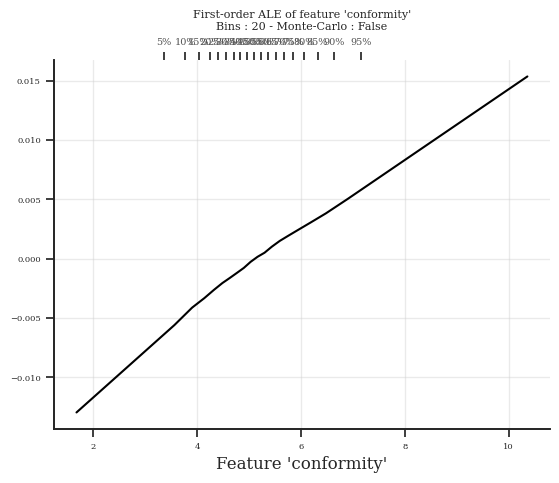

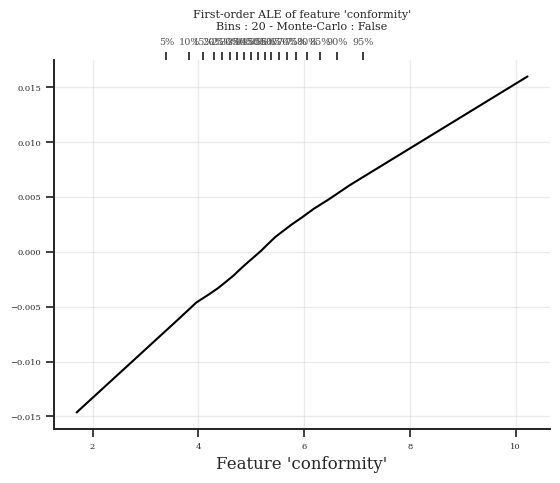

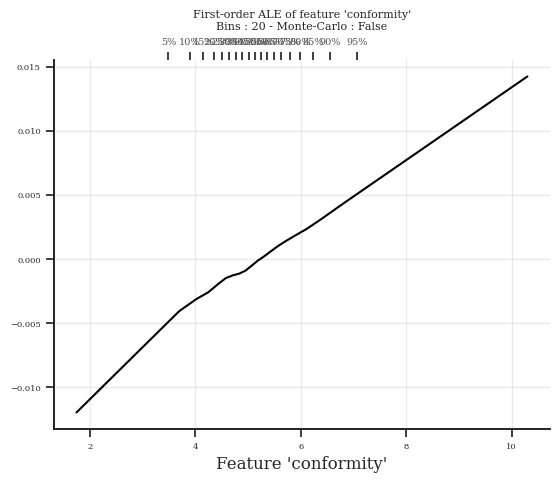

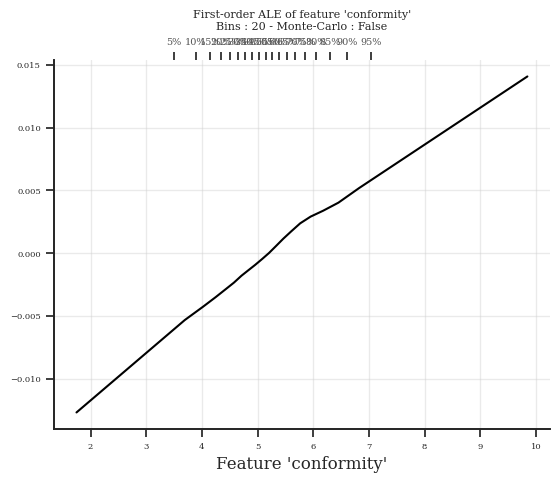

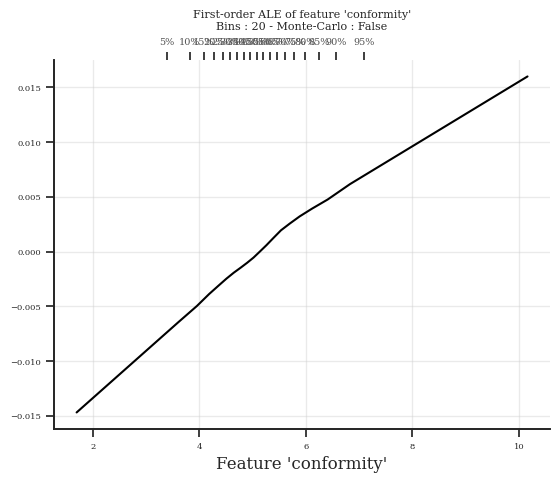

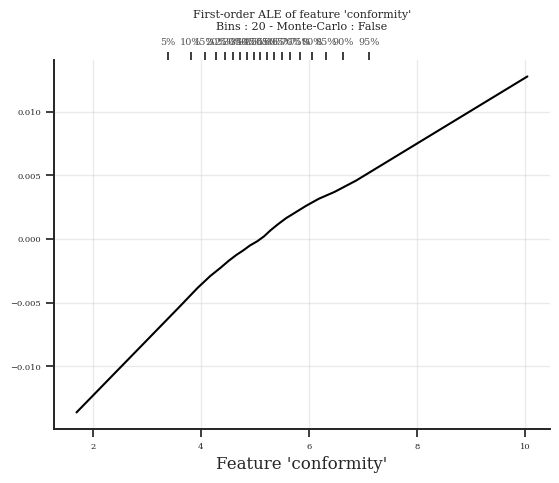

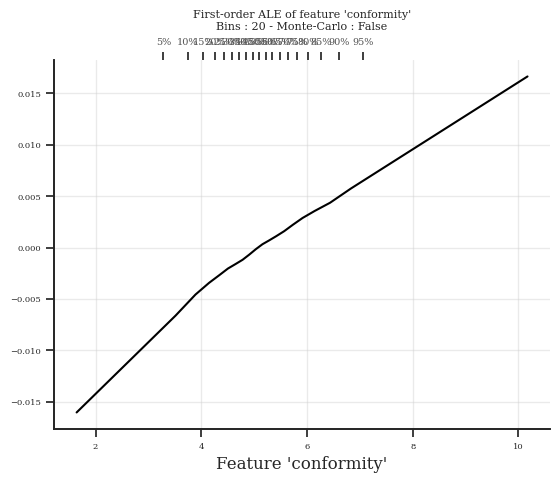

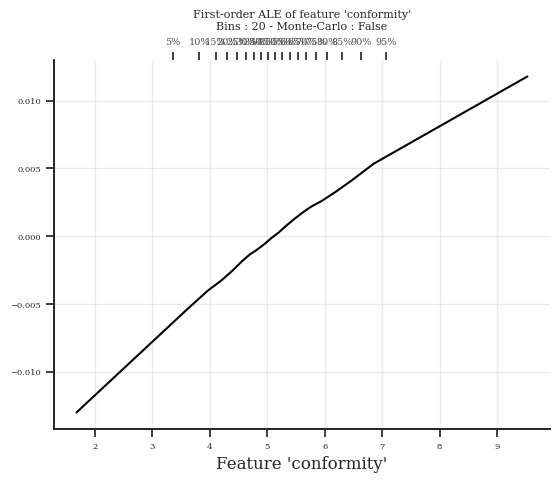

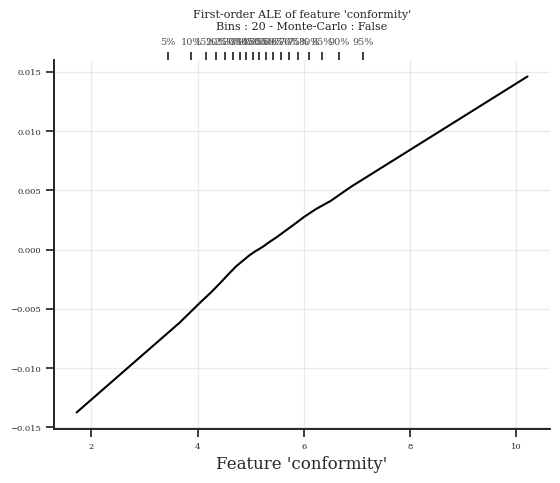

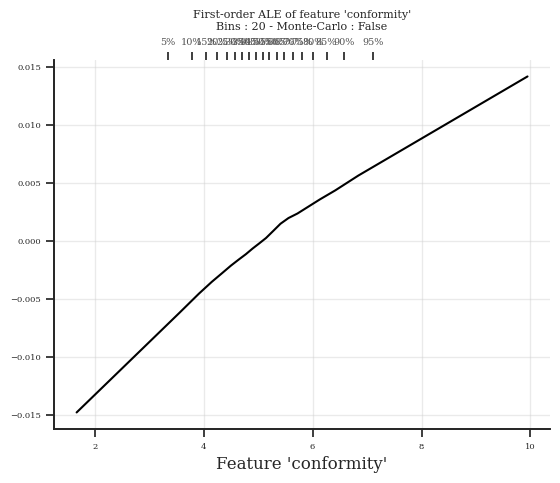

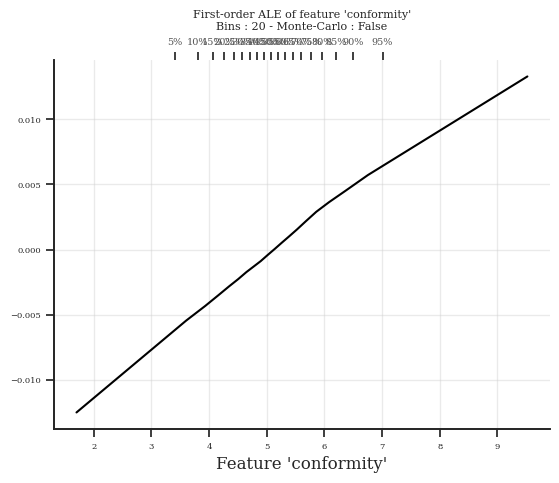

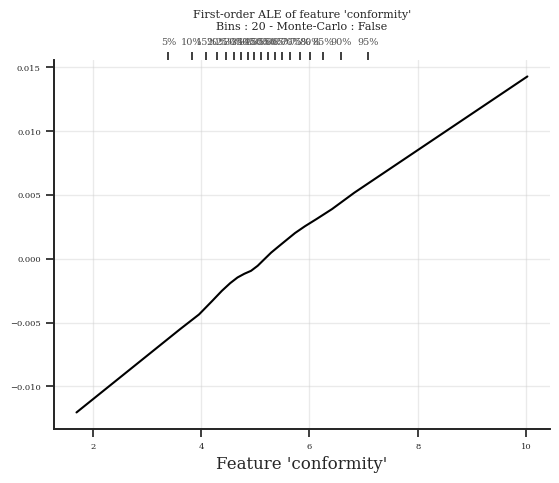

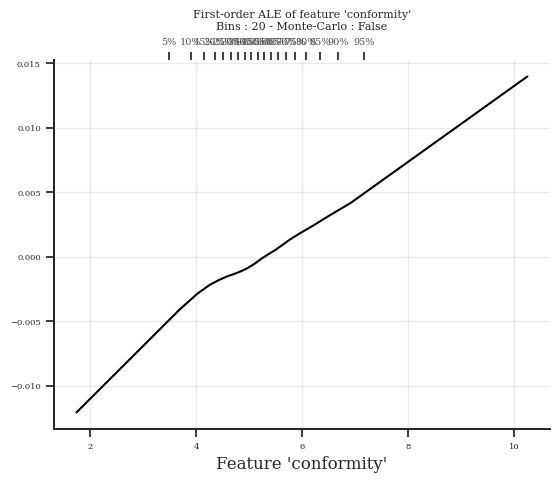

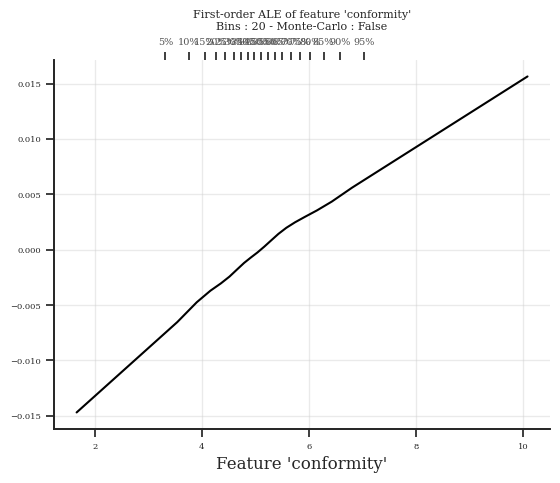

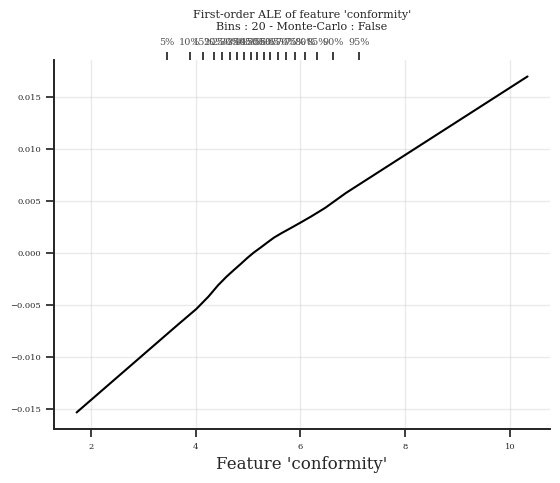

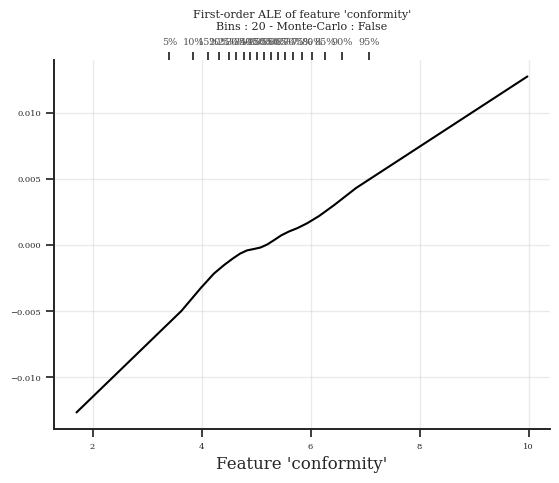

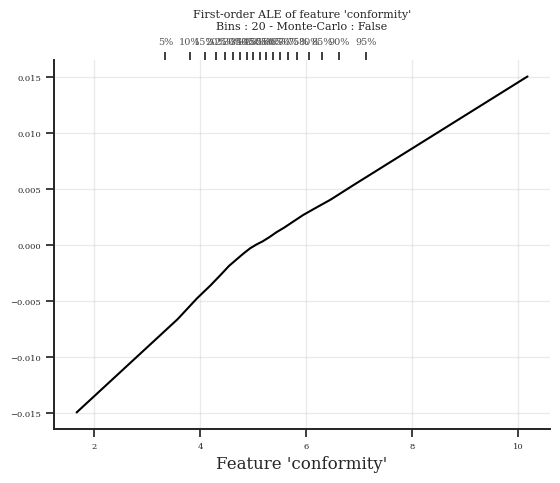

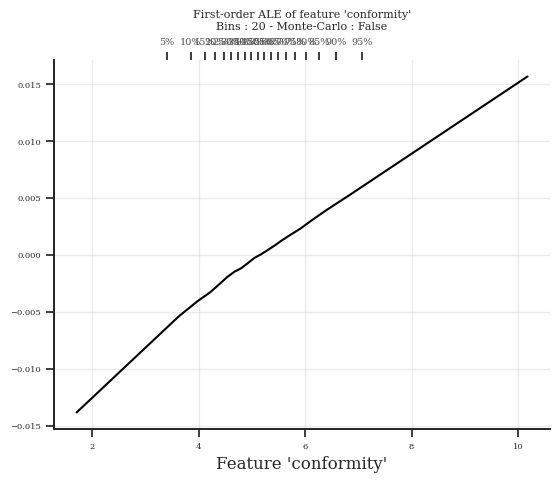

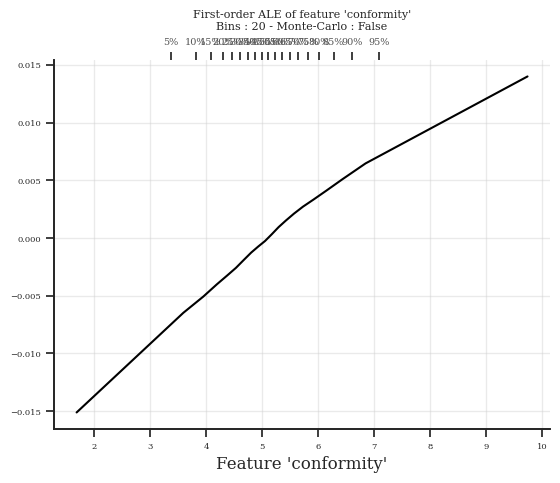

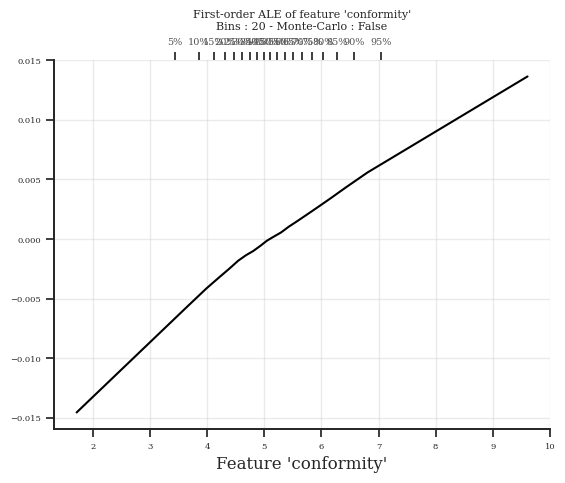

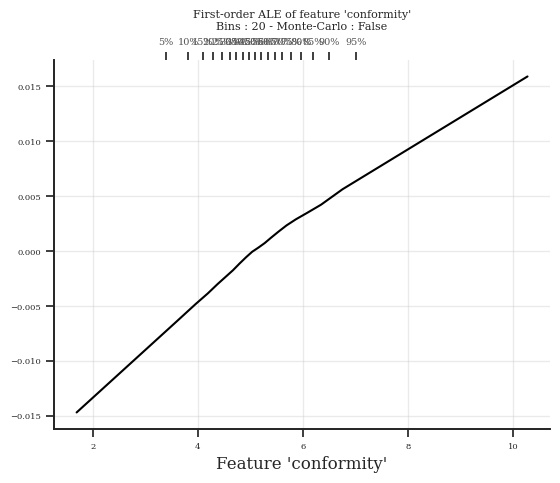

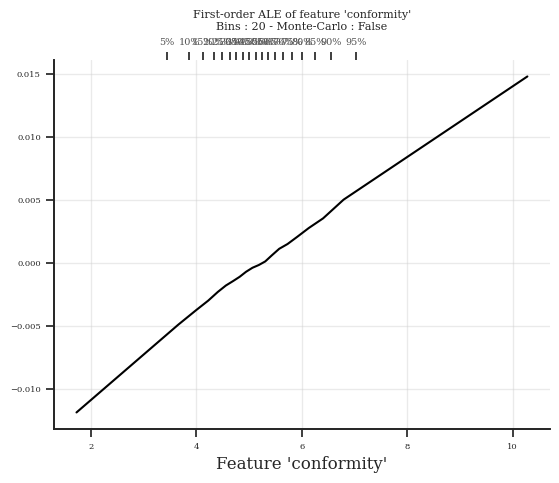

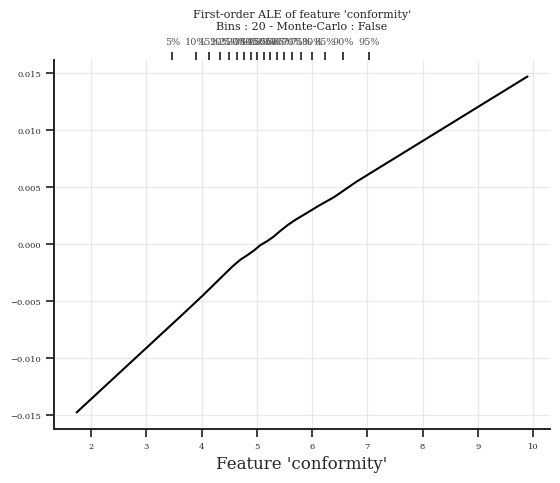

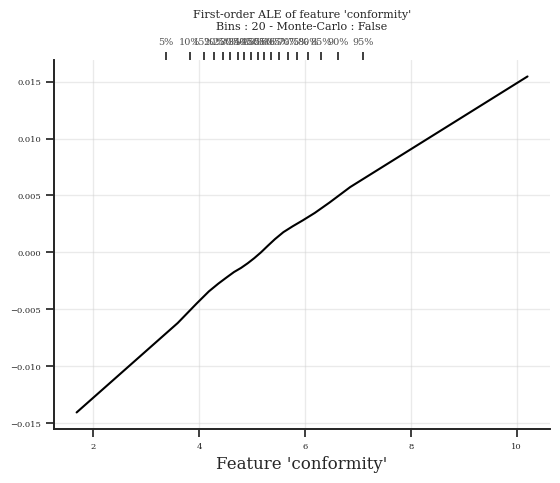

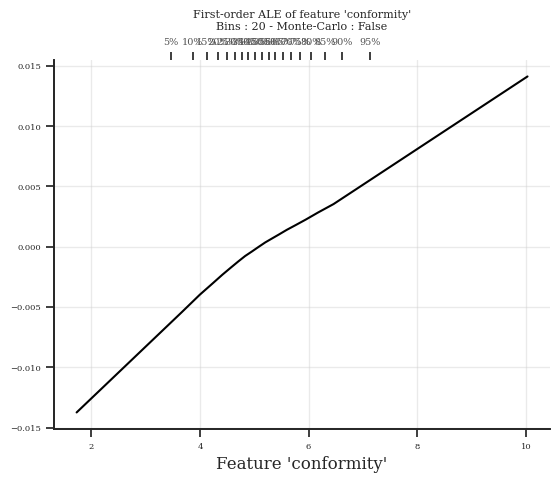

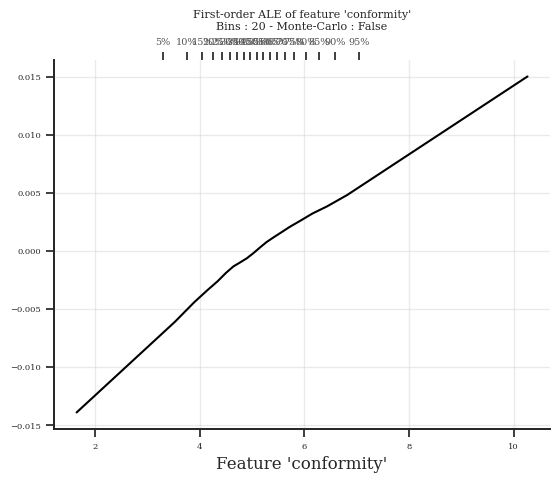

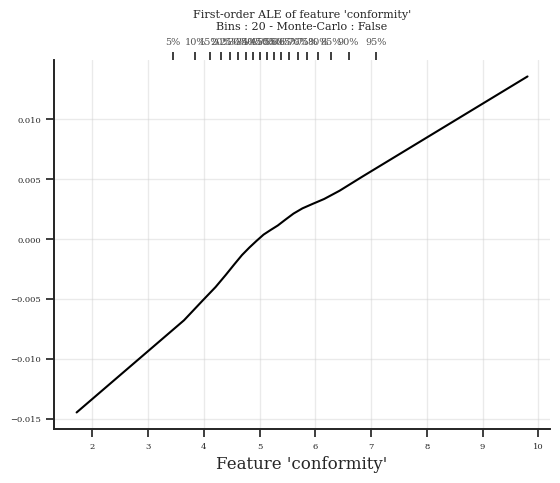

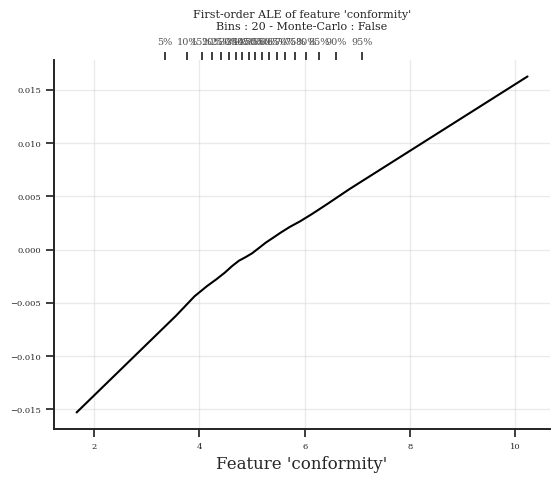

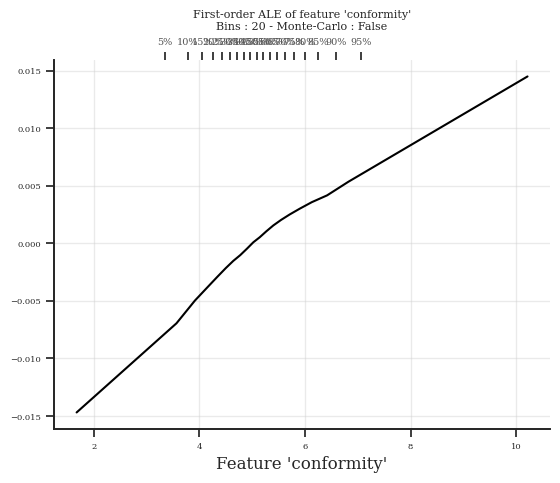

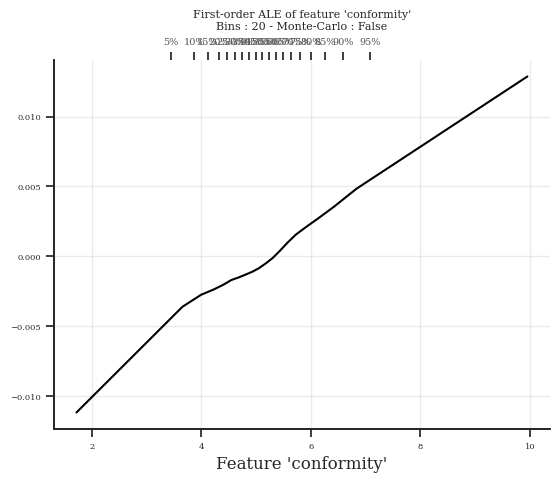

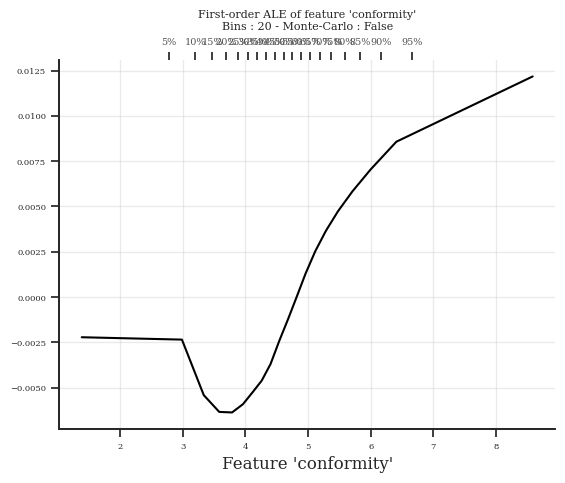

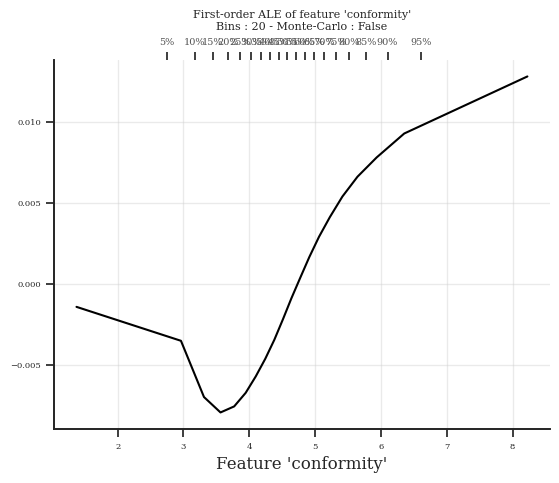

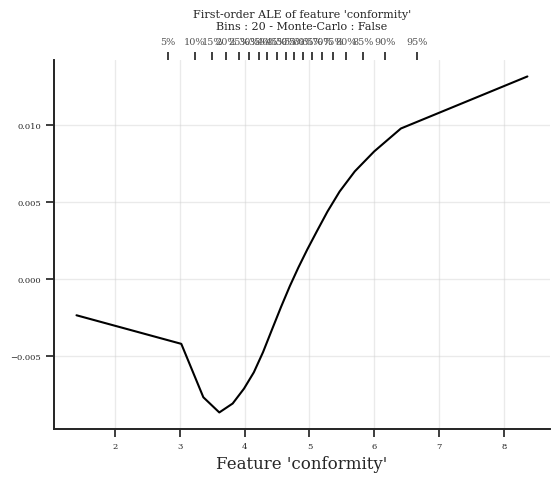

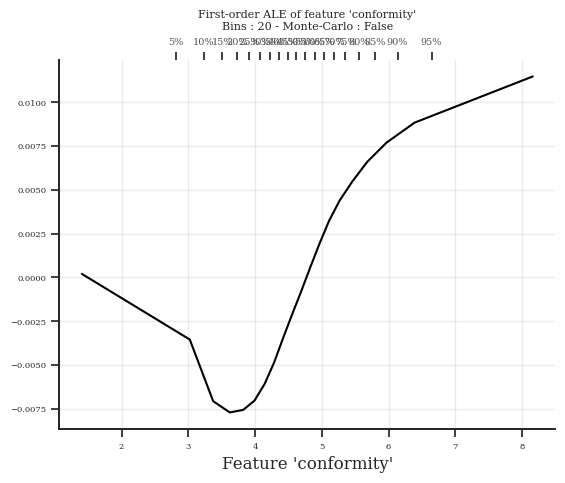

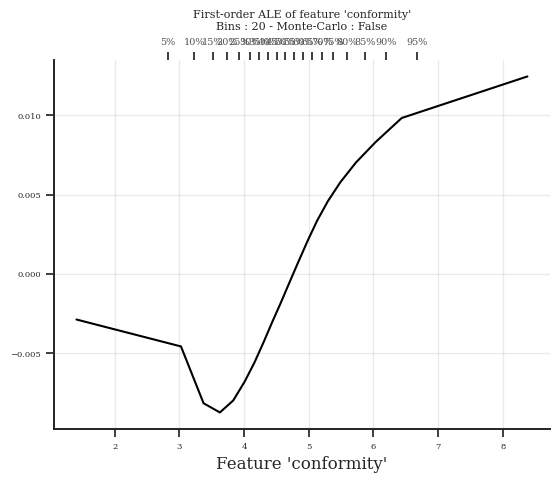

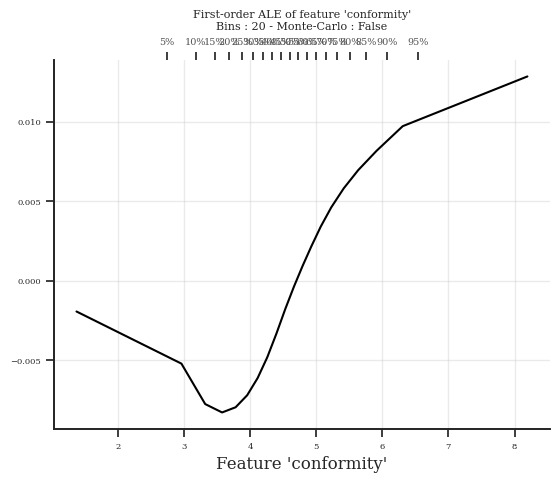

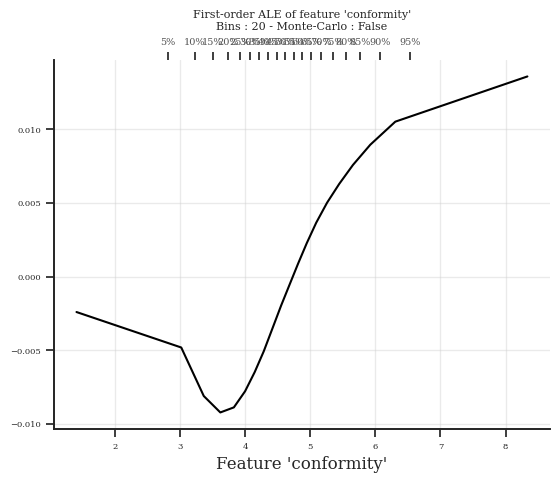

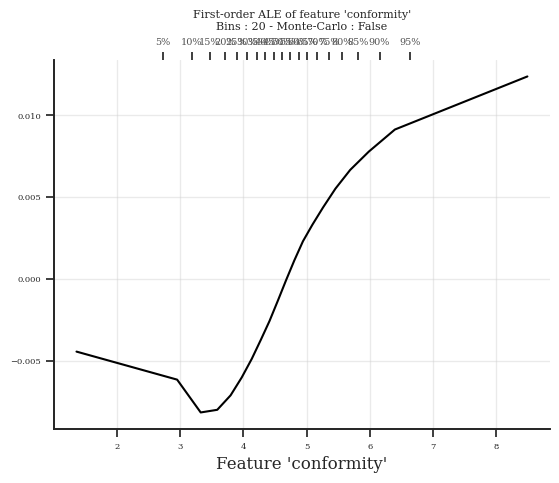

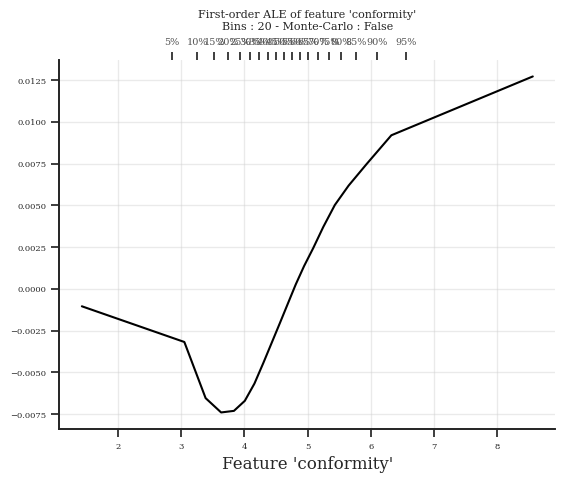

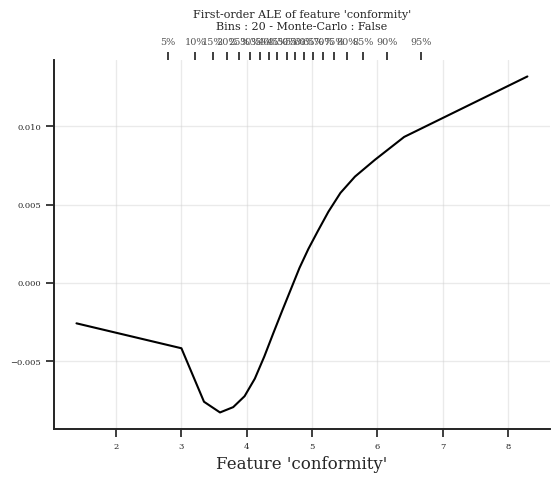

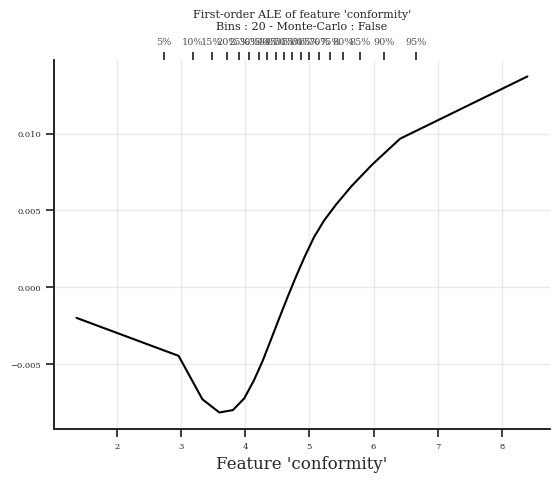

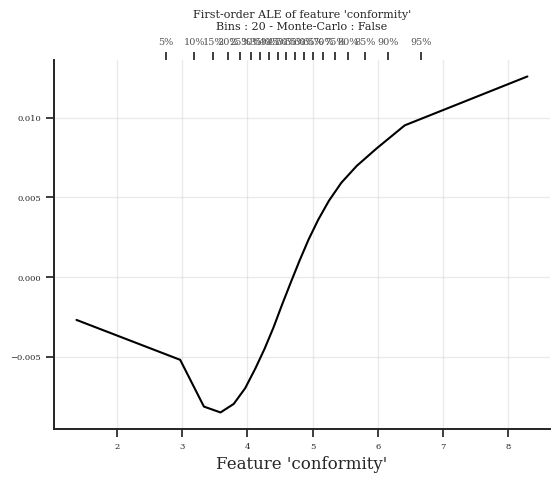

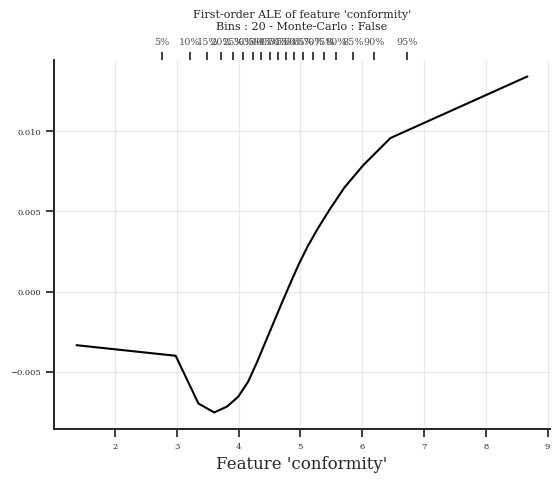

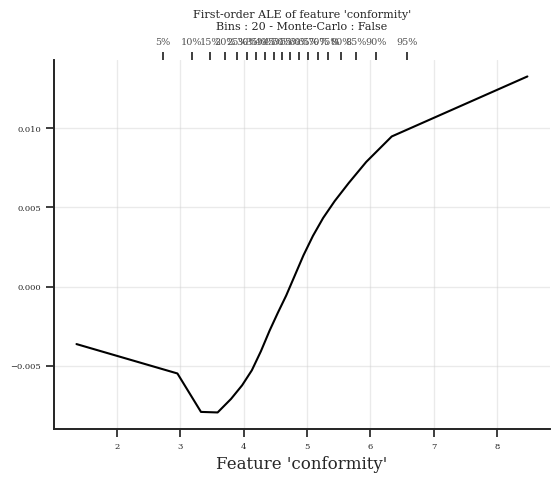

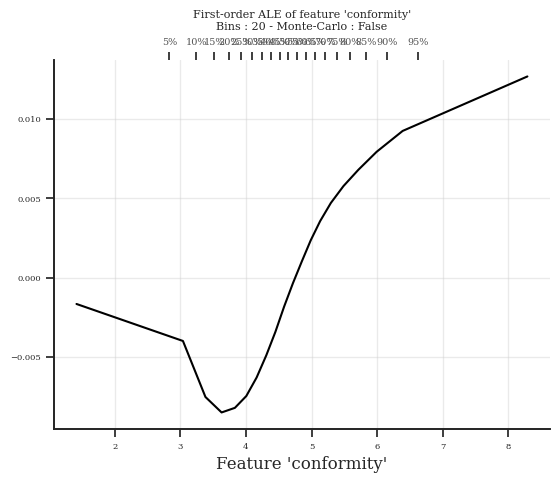

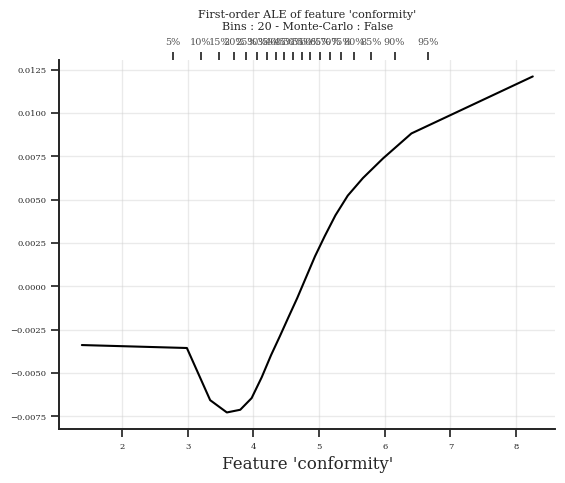

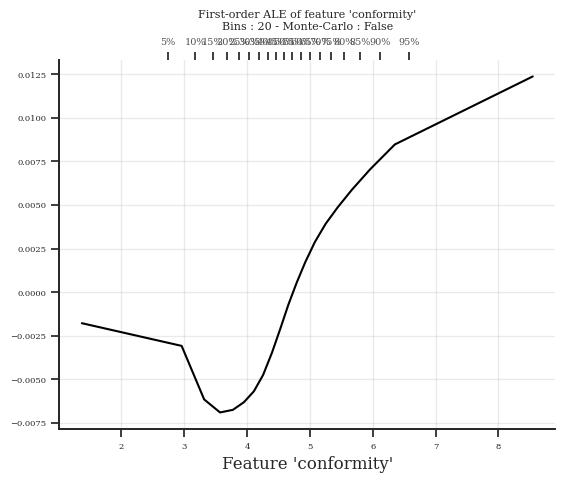

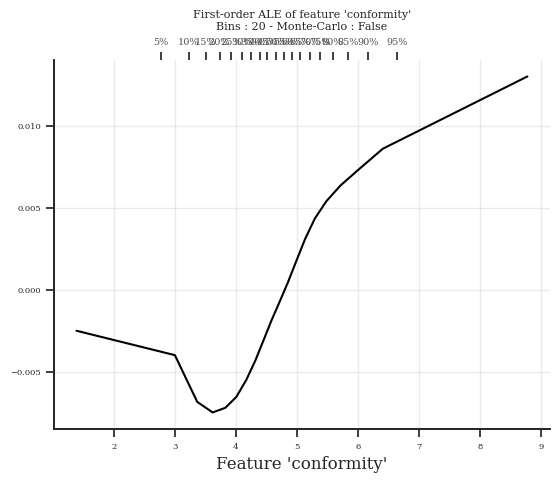

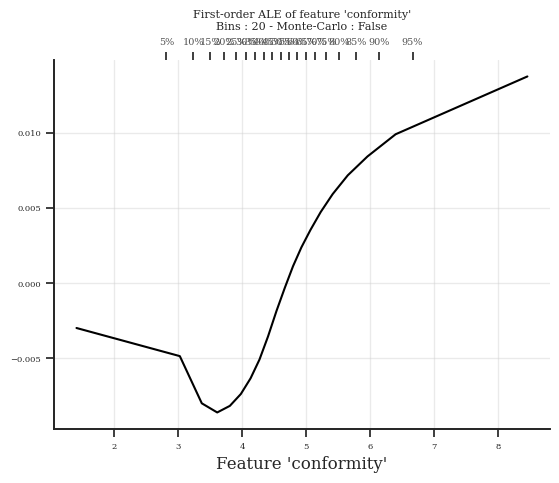

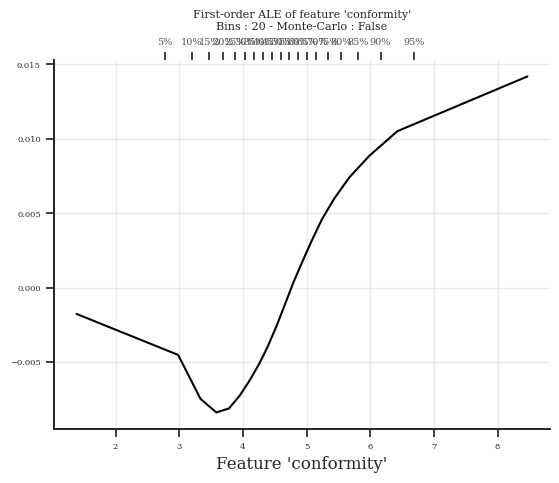

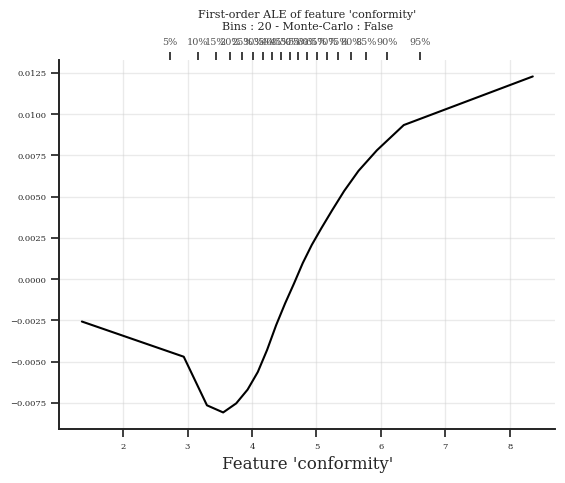

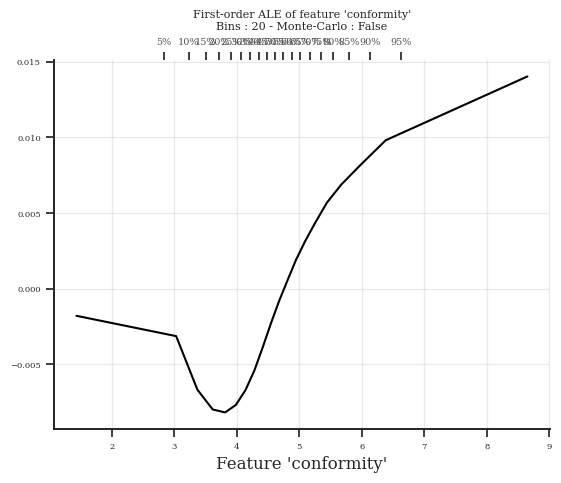

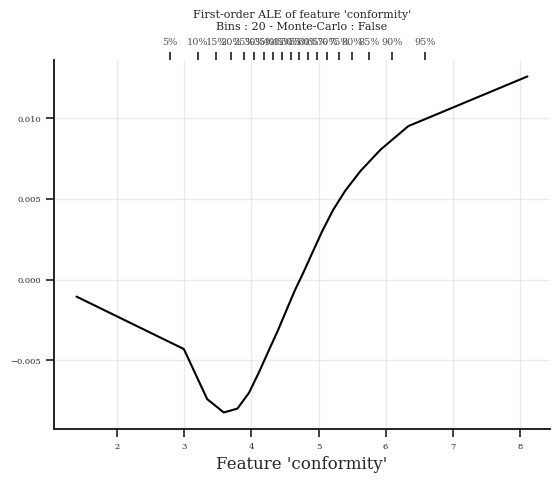

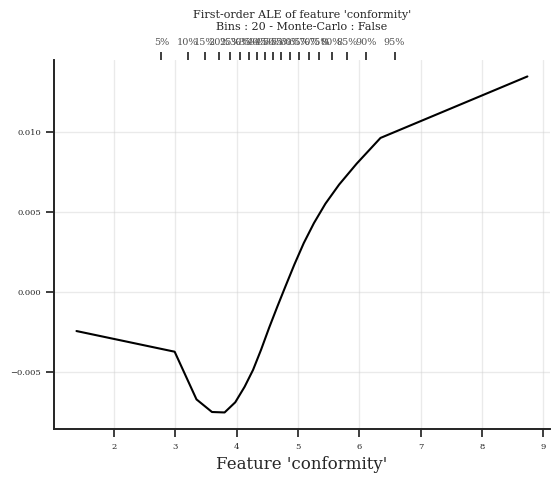

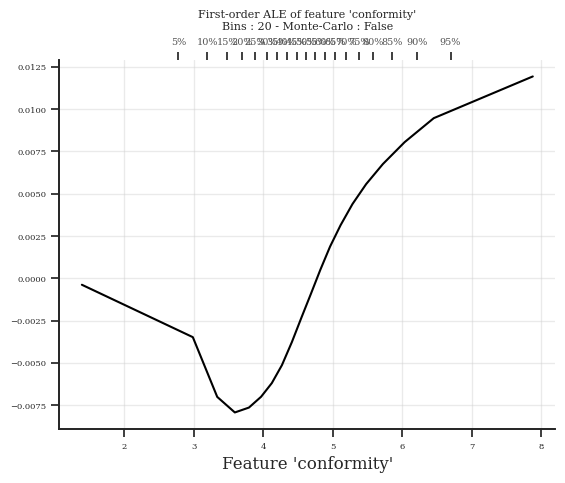

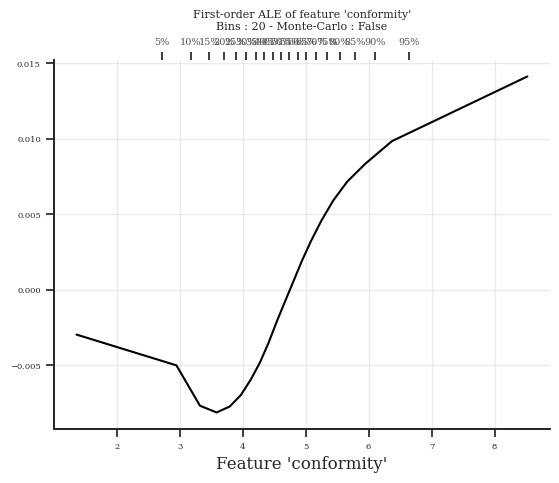

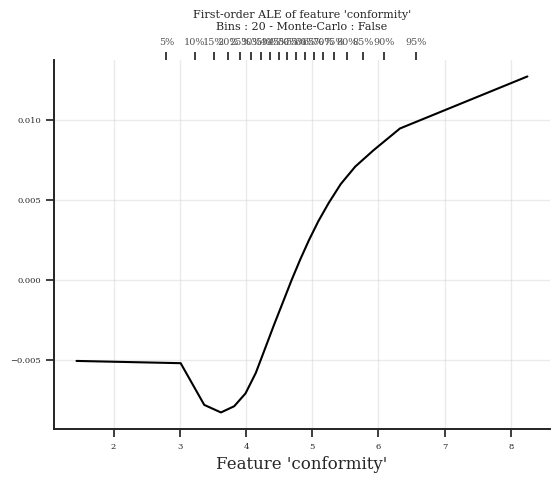

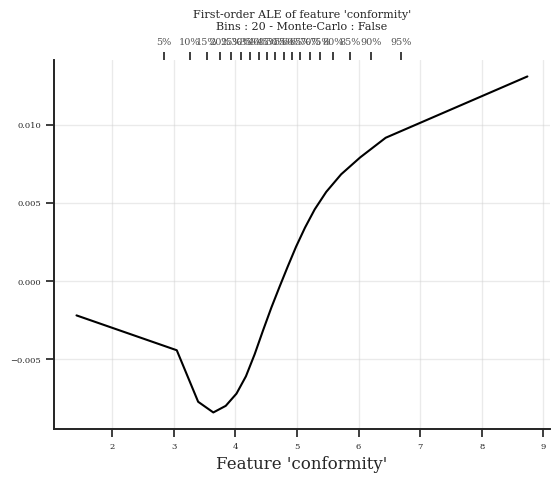

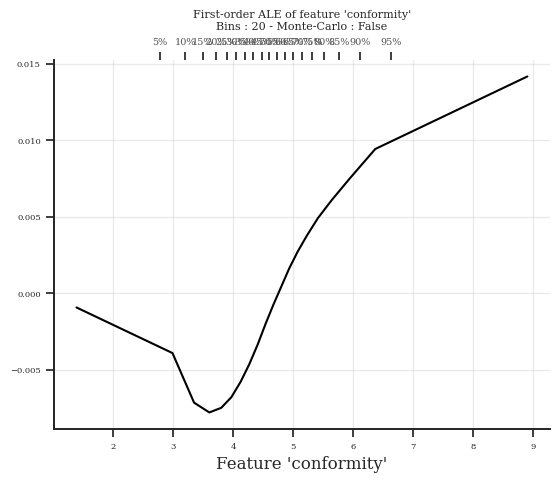

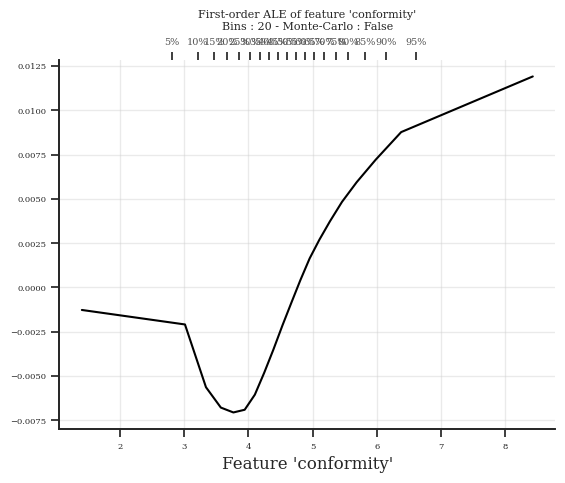

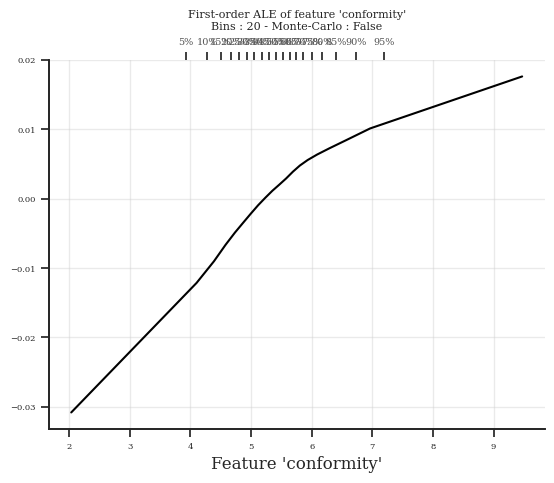

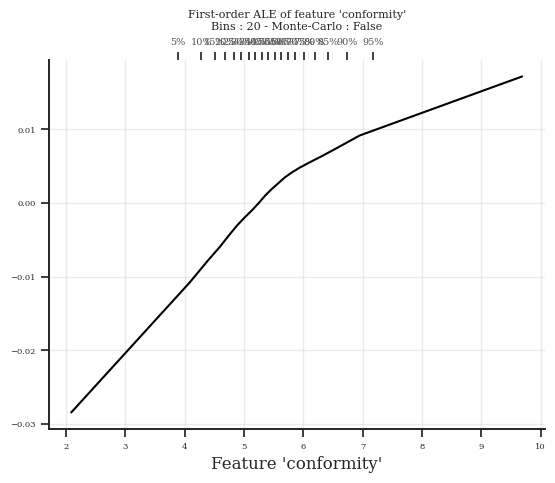

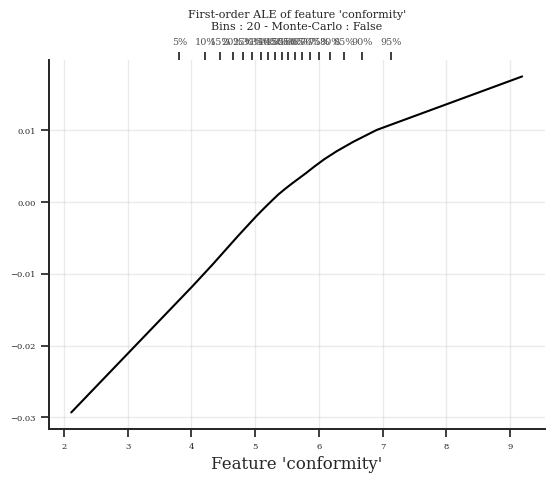

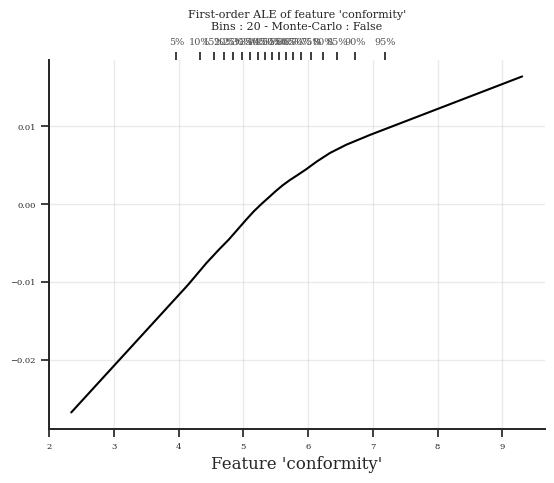

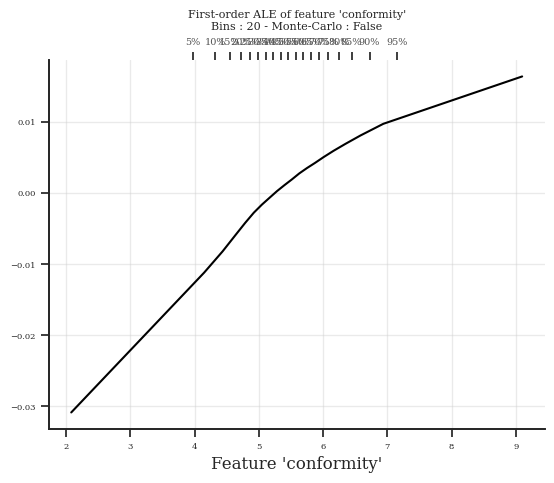

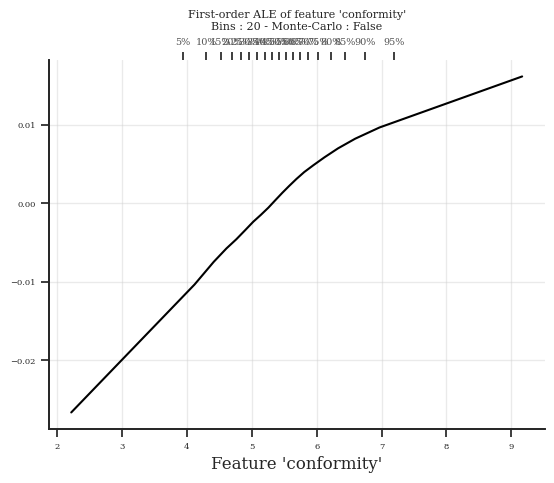

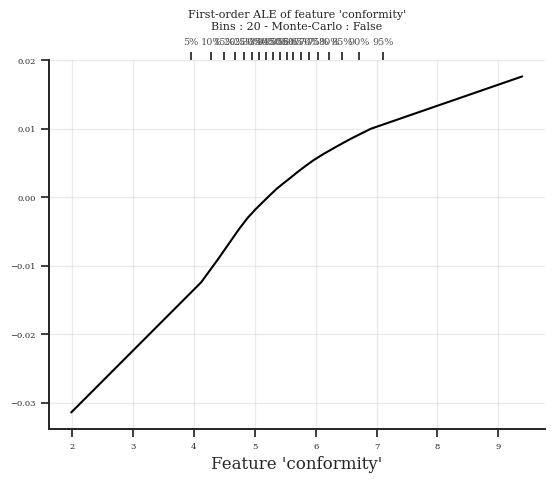

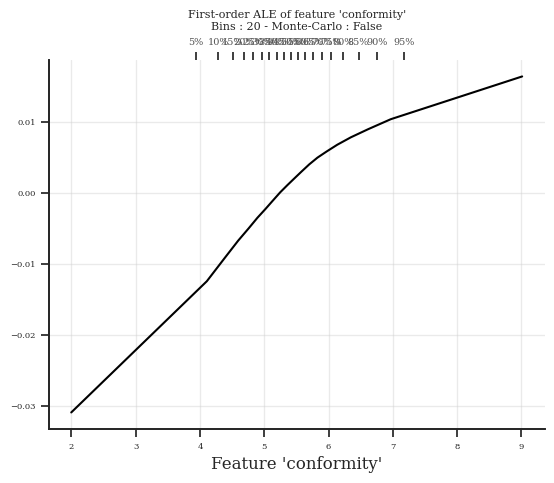

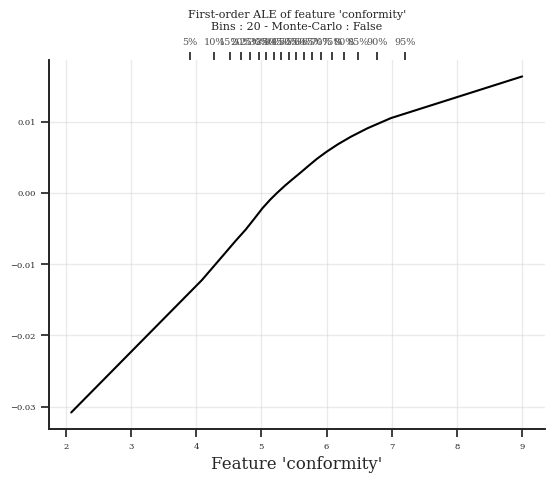

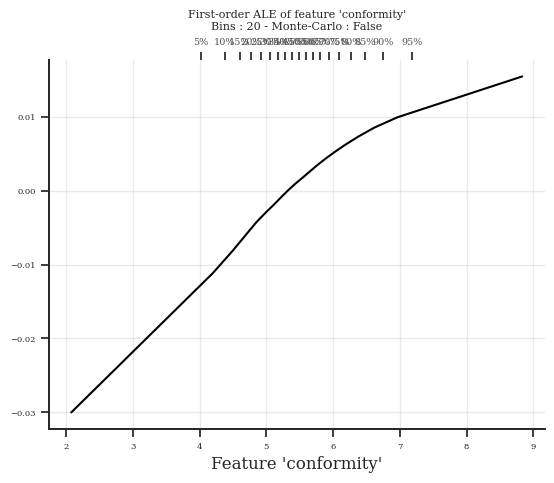

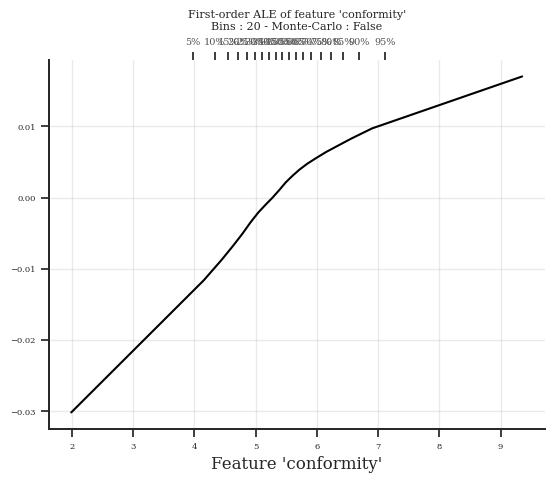

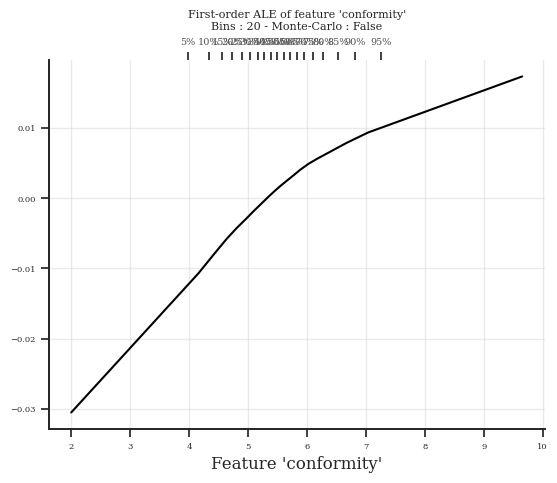

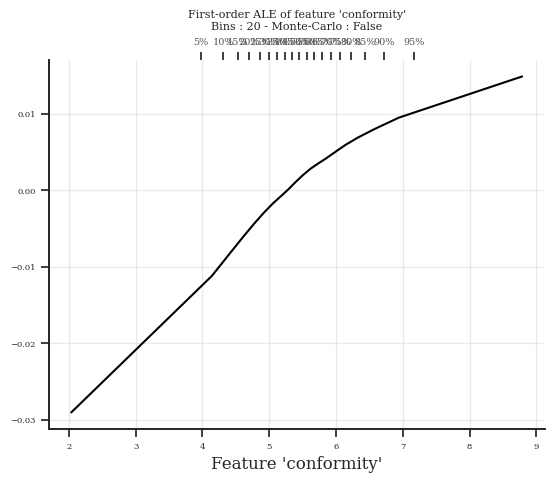

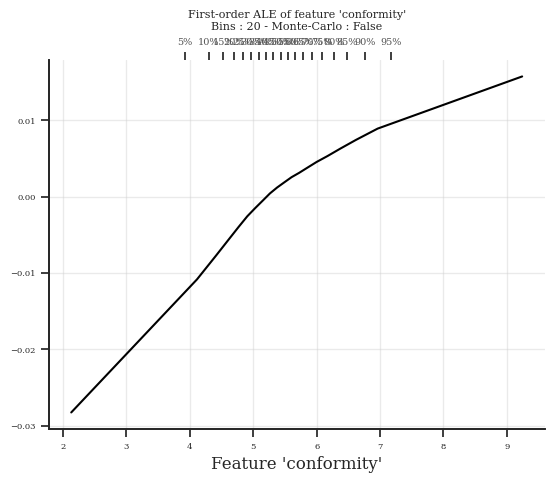

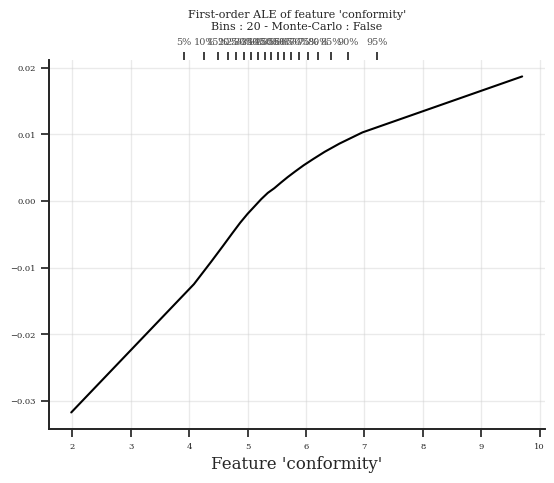

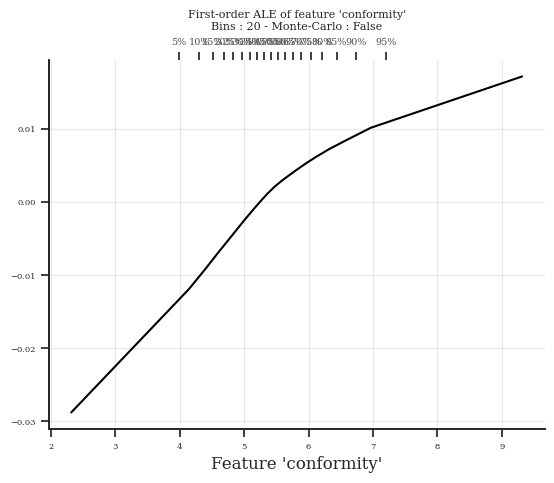

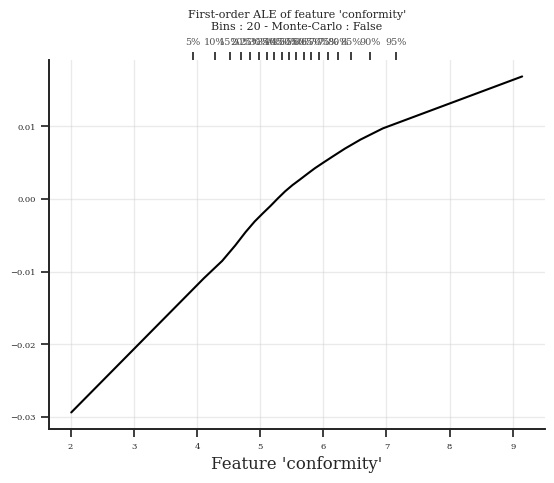

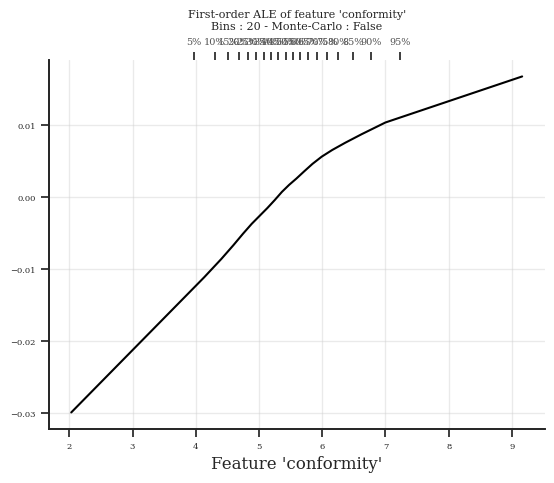

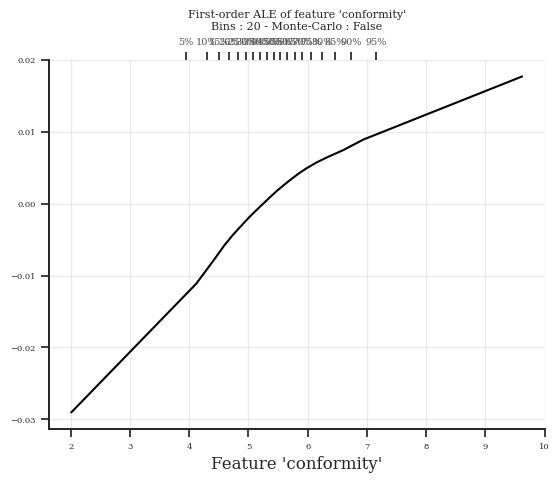

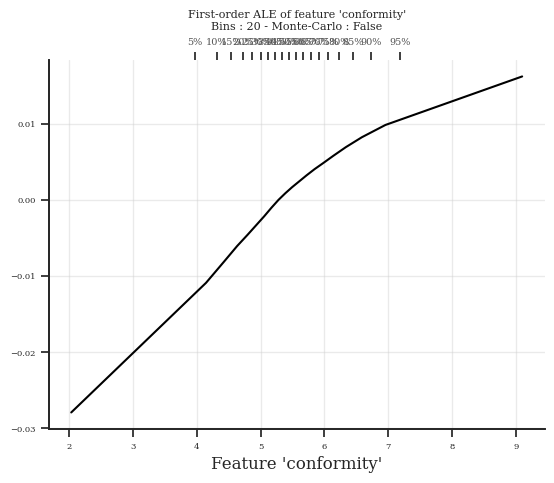

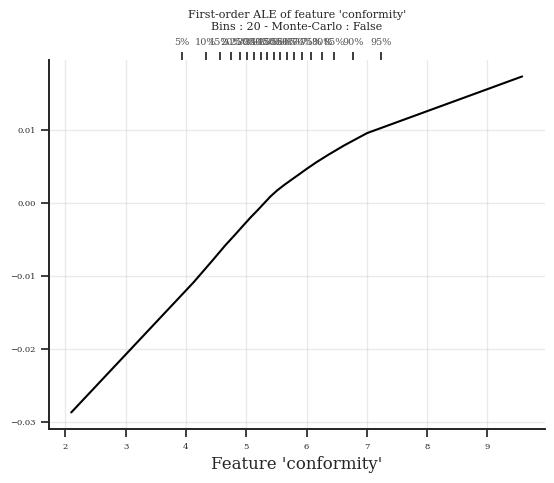

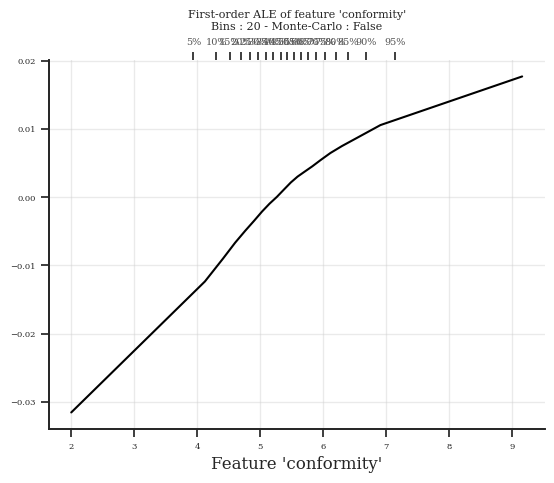

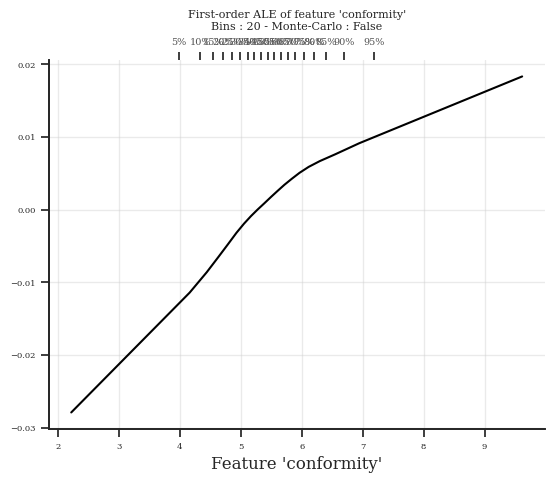

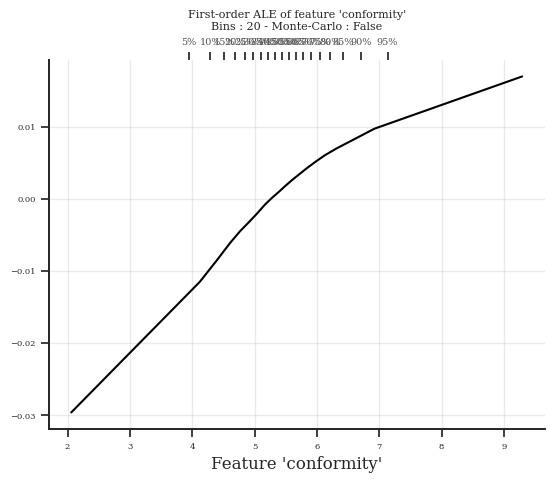

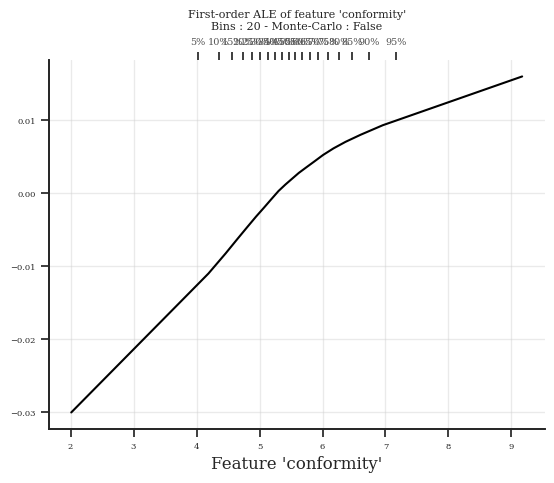

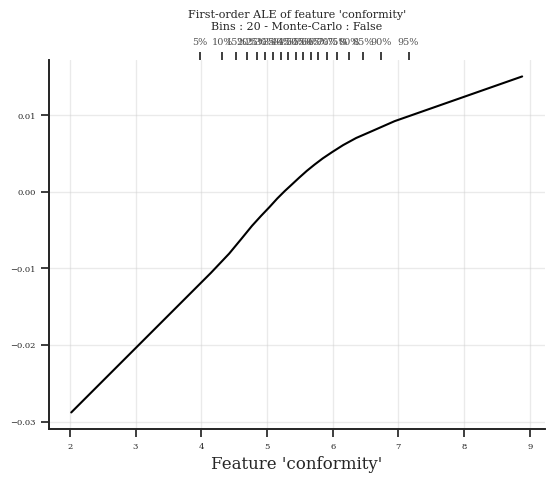

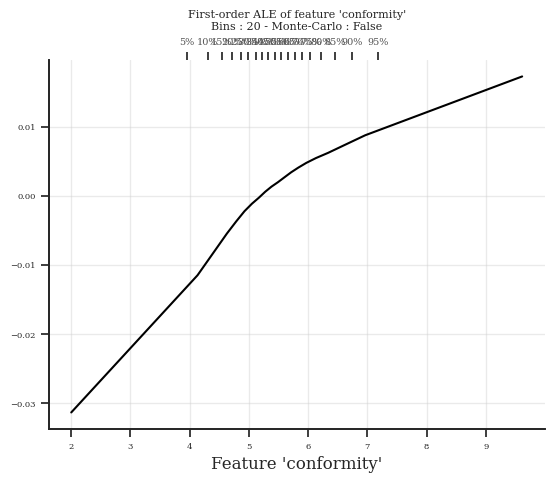

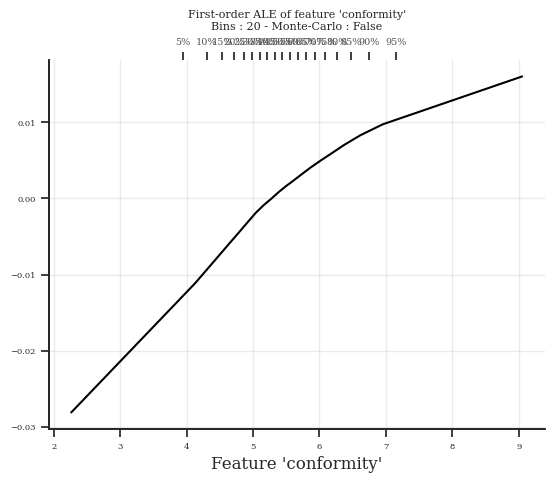

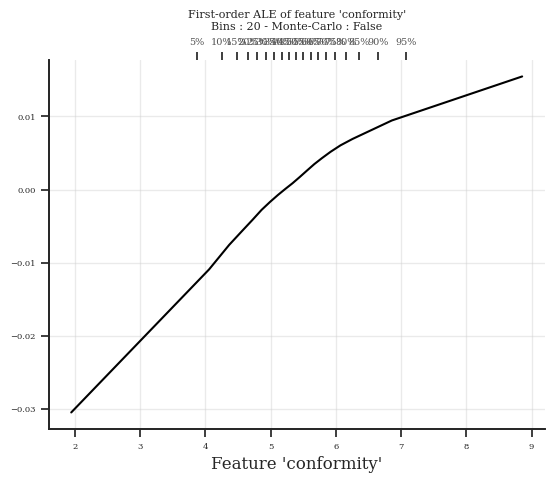

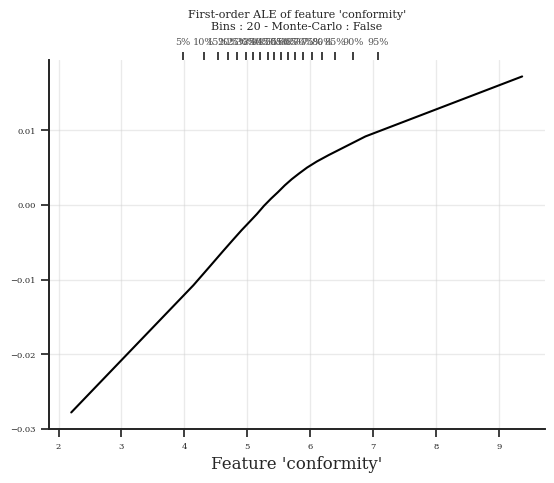

In [86]:
# 计算全局ale，转化成xarray的格式
bins = 20
quantiles = np.unique(
   np.quantile(
       dataset['treatments'].reshape(-1), np.linspace(0, 1, bins + 1), interpolation="lower"
   )
)

bins = (quantiles[1:] + quantiles[:-1]) / 2

data_vars = {}
n_bootstrap = 30


for i in [0,1,2]:
    dataset_year = [dataset19, dataset20, dataset23][i]
    year = [2019, 2020, 2023][i]
    ale = []
    
    for _ in range(n_bootstrap):
        sub_dataset = dataset_sampling(dataset_year, 1000)
        ale_fig, ale_1st, _ = compute_ale(sub_dataset, 'rmsn_'+str(exp_name), b_use_predicted_confounders=False, features = ['conformity'], default_quantiles=quantiles)
        ale.append(ale_1st)
    data_vars[f"conformity__RNN_Model_{year}__ale"] = (["n_bootstrap", f"n_bins__conformity"], ale)

data_vars[f"conformity__bin_values"] = (["n_bins__conformity"], bins)

data_vars[f"conformity"] = (["n_X"],dataset['treatments'][:,:,0].flatten())

for key in data_var.keys():
    data_var[key] = np.array(data_var[key])
    
ale_dataset = xr.Dataset(
    data_vars=data_vars,
    #coords={
    #    "n_bootstrap": np.arange(ale.shape[0]), 
    #    f"n_bins__{feature_name}": np.arange(quantiles.shape[0]),  
    #    "n_X": np.arange(flattened_values.shape[0]),  
    #},
    attrs={
        "estimator_output": "raw",
        "estimators used": ['RNN_Model_2019', 'RNN_Model_2020', 'RNN_Model_2023'],
        "method": "ale",
        "dimension": "1D",
        "features used": "conformity",
    }
)


In [61]:
# save
# ale_dataset.to_netcdf(path='./figures/figure_data/fig_1c.nc')

# read
ale_dataset = xr.open_dataset('./figures/figure_data/fig_1c.nc')
ale_dataset

<xarray.Dataset>
Dimensions:                          (n_bootstrap: 30, n_bins__conformity: 20,
                                      n_X: 15456000)
Dimensions without coordinates: n_bootstrap, n_bins__conformity, n_X
Data variables:
    conformity__RNN_Model_2019__ale  (n_bootstrap, n_bins__conformity) float64 ...
    conformity__RNN_Model_2020__ale  (n_bootstrap, n_bins__conformity) float64 ...
    conformity__RNN_Model_2023__ale  (n_bootstrap, n_bins__conformity) float64 ...
    conformity__bin_values           (n_bins__conformity) float32 ...
    conformity                       (n_X) float32 ...
Attributes:
    estimator_output:  raw
    estimators used:   ['RNN_Model_2019', 'RNN_Model_2020', 'RNN_Model_2023']
    method:            ale
    dimension:         1D
    features used:     conformity

In [62]:
# 还原SCI的log值
conformity_bin_values_log = ale_dataset['conformity__bin_values'].values
conformity_bin_values_original = np.exp(conformity_bin_values_log)-1
ale_dataset['conformity__bin_values'] = (('n_bins__conformity'), conformity_bin_values_original)

conformity_log = ale_dataset['conformity'].values
conformity_original = np.exp(conformity_log)-1
ale_dataset['conformity'] = (('n_X'), conformity_original)

# 将ALE值转换为倍数
ale_values = ale_dataset['conformity__RNN_Model_2019__ale'].values
ale_values_original = np.exp(ale_values)
ale_dataset['conformity__RNN_Model_2019__ale'] = ([('n_bootstrap'),('n_bins__conformity')], ale_values_original)

ale_values = ale_dataset['conformity__RNN_Model_2020__ale'].values
ale_values_original = np.exp(ale_values)
ale_dataset['conformity__RNN_Model_2020__ale'] = ([('n_bootstrap'),('n_bins__conformity')], ale_values_original)

ale_values = ale_dataset['conformity__RNN_Model_2023__ale'].values
ale_values_original = np.exp(ale_values)
ale_dataset['conformity__RNN_Model_2023__ale'] = ([('n_bootstrap'),('n_bins__conformity')], ale_values_original)

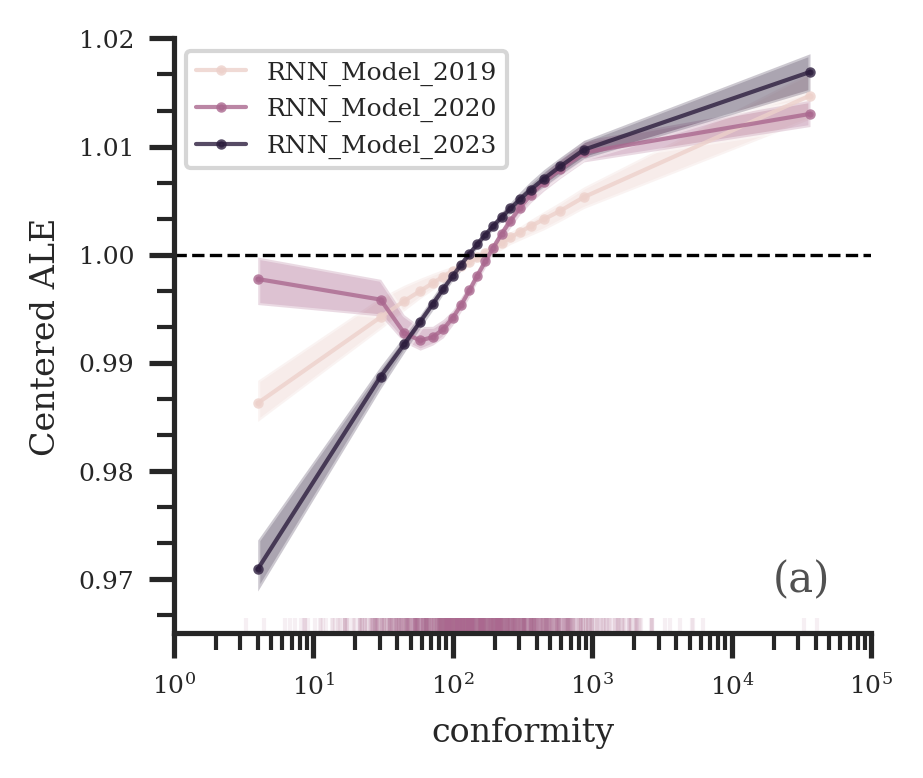

In [69]:
estimator = [('RNN_Model_2019',RandomForestRegressor()),
            ('RNN_Model_2020',RandomForestRegressor()),
            ('RNN_Model_2023',RandomForestRegressor())]

explainer = skexplain.ExplainToolkit(estimator)

# 生成 cubehelix 调色盘
cubehelix_palette = sns.cubehelix_palette(n_colors=3)


fig, ax = explainer.plot_ale(
                                   ale = ale_dataset,
                                   features='conformity',
                                   display_units=plotting_config.display_units,
                                   display_feature_names=plotting_config.display_feature_names,
                                   line_kws={'marker': 'o', 'markersize':1.5,'linewidth':1, 'line_colors': cubehelix_palette},
hist_color = 'white', 
    edge_color= 'white'

                                  )

ax.set_xscale('log')
# ax.set_xlim(right = 1000)
ax.set_xlim(left=1, right = 10 ** 5)
# ax.set_xlim(left=1, right = 11)
ax.set_ylim(bottom = 0.965, top = 1.02)

ax.axhline(y=1, color='black', ls='--', lw=0.8)

# ax.tick_params(axis='y', right=False, labelright=False)
# ax.tick_params(axis='y', tick1On=False, tick2On=False)
# ax.spines['bottom'].set_visible(False)
# ax.set_xticks(conformity_bin_values_original)
# ax.set_xticklabels([f'{val:.2f}' for val in conformity_bin_values_original])
ax.set_ylabel('Centered ALE', fontsize = 8)
ax.legend()

fig.axes[3].remove()
fig.axes[2].remove()
fig.axes[1].remove()



data = ale_dataset['conformity'].values
if len(data) > 1000:
    data_sample = np.random.choice(data, size=1000, replace=False)
else:
    data_sample = data
sns.rugplot(data_sample, ax=ax, color=cubehelix_palette[-2], alpha=0.1)

# plt.savefig('./figures/fig_1c_yearly_SCI_ale_1st_log_log.png',  dpi=300)
# plt.savefig('./figures/fig_1c_yearly_SCI_ale_1st_SCI_log.png',  dpi=300)
plt.savefig('./figures/fig_1c_yearly_SCI_ale_1st_raw-1.png',  dpi=300)
plt.show()

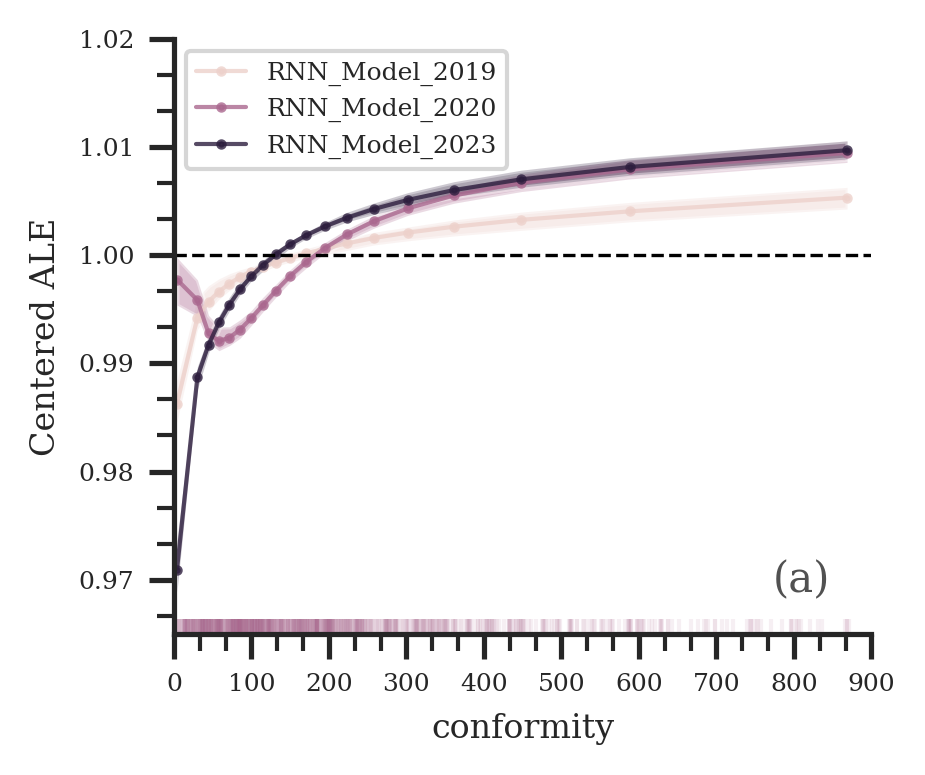

In [72]:
bins_to_keep = ale_dataset['n_bins__conformity'] != ale_dataset['n_bins__conformity'].loc[-1]
ale_dataset_select = ale_dataset.sel(n_bins__conformity=bins_to_keep)

estimator = [('RNN_Model_2019',RandomForestRegressor()),
            ('RNN_Model_2020',RandomForestRegressor()),
            ('RNN_Model_2023',RandomForestRegressor())]

explainer = skexplain.ExplainToolkit(estimator)

# 生成 cubehelix 调色盘
cubehelix_palette = sns.cubehelix_palette(n_colors=3)


fig, ax = explainer.plot_ale(
                                   ale = ale_dataset_select,
                                   features='conformity',
                                   display_units=plotting_config.display_units,
                                   display_feature_names=plotting_config.display_feature_names,
                                   line_kws={'marker': 'o', 'markersize':1.5,'linewidth':1, 'line_colors': cubehelix_palette},
hist_color = 'white', 
    edge_color= 'white'

                                  )

# ax.set_xscale('log')
ax.set_xlim(left = 0, right = 900)
# ax.set_xlim(left=1, right = 10 ** 5)
# ax.set_xlim(left=1, right = 11)
ax.set_ylim(bottom = 0.965, top = 1.02)

ax.axhline(y=1, color='black', ls='--', lw=0.8)

# ax.tick_params(axis='y', right=False, labelright=False)
# ax.tick_params(axis='y', tick1On=False, tick2On=False)
# ax.spines['bottom'].set_visible(False)
# ax.set_xticks(conformity_bin_values_original)
# ax.set_xticklabels([f'{val:.2f}' for val in conformity_bin_values_original])
ax.set_ylabel('Centered ALE', fontsize = 8)
ax.legend()

fig.axes[3].remove()
fig.axes[2].remove()
fig.axes[1].remove()



data = ale_dataset['conformity'].values
if len(data) > 1000:
    data_sample = np.random.choice(data, size=1000, replace=False)
else:
    data_sample = data
sns.rugplot(data_sample, ax=ax, color=cubehelix_palette[-2], alpha=0.1)

# plt.savefig('./figures/fig_1c_yearly_SCI_ale_1st_log_log.png',  dpi=300)
plt.savefig('./figures/fig_1c_yearly_SCI_ale_1st_SCI_log.png',  dpi=300)
# plt.savefig('./figures/fig_1c_yearly_SCI_ale_1st_raw-1.png',  dpi=300)
plt.show()

## ALED和ALER

In [73]:
ale_all_dataset = xr.open_dataset('./figures/figure_data/fig_1b.nc')
ale_year_dataset = xr.open_dataset('./figures/figure_data/fig_1c.nc')



In [87]:
ale_year_dataset

<xarray.Dataset>
Dimensions:                          (n_bootstrap: 30, n_bins__conformity: 20,
                                      n_X: 15456000)
Dimensions without coordinates: n_bootstrap, n_bins__conformity, n_X
Data variables:
    conformity__RNN_Model_2019__ale  (n_bootstrap, n_bins__conformity) float64 ...
    conformity__RNN_Model_2020__ale  (n_bootstrap, n_bins__conformity) float64 ...
    conformity__RNN_Model_2023__ale  (n_bootstrap, n_bins__conformity) float64 ...
    conformity__bin_values           (n_bins__conformity) float32 ...
    conformity                       (n_X) float32 ...
Attributes:
    estimator_output:  raw
    estimators used:   ['RNN_Model_2019', 'RNN_Model_2020', 'RNN_Model_2023']
    method:            ale
    dimension:         1D
    features used:     conformity

In [96]:
ale_all = ale_all_dataset['conformity__RNN_Model__ale'].values.mean(axis=0)
ale_19 = ale_year_dataset['conformity__RNN_Model_2019__ale'].values.mean(axis=0)
ale_20 = ale_year_dataset['conformity__RNN_Model_2020__ale'].values.mean(axis=0)
ale_23 = ale_year_dataset['conformity__RNN_Model_2023__ale'].values.mean(axis=0)

In [97]:
# 计算ALER和ALED(基于全ALE数据)
ALER = []
ALED = []

ale_value_list = [ale_all,ale_19,ale_20,ale_23]
for i in range(4):  
    # Calculate ALER (min and max of ale_y)
    ale_y = ale_value_list[i]
    #counts = ale_n[i]

    aler = [np.min(np.exp(ale_y)), np.max(np.exp(ale_y))]
    ALER.append(aler)

    # Calculate ALED (mean absolute deviation of ale_y)
    #aled = np.sum(np.abs(ale_y) * counts * ale_range[i]) / np.sum(counts * ale_range[i])
    aled = np.mean(np.exp(ale_y))
    ALED.append(aled)

In [98]:
ALER

[[0.9924308863805578, 1.0159844381596495],
 [0.9862774733589577, 1.0147119577889576],
 [0.9920688694701235, 1.013020605575567],
 [0.970925602650322, 1.0168991414761253]]

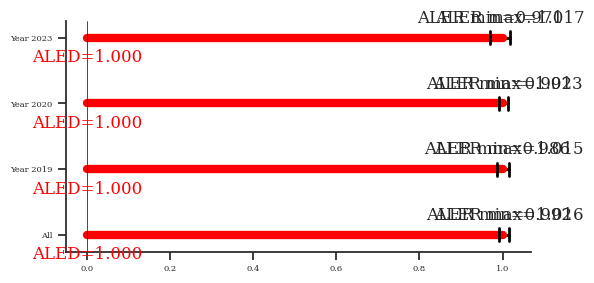

In [99]:

aled_2019, aled_2020, aled_2023 = ALED[0]/2, ALED[1]/2, ALED[2]/2

# Create a figure and a single subplot
fig, ax = plt.subplots(figsize=(6, 3))

# Define the positions on the y-axis for each year
positions = [0, 1, 2, 3]
years = ['All', 'Year 2019', 'Year 2020', 'Year 2023']

# Draw lines for ALER and ALED for each year
for pos, aler, aled in zip(positions,ALER, [x/2 for x in ALED]):
    ax.plot(aler, [pos, pos], color='black', lw=2)  # ALER line
    ax.plot([0, aled *2], [pos, pos], color='red', lw=6)  # ALED line segment
    ax.plot([aler[0], aler[0]], [pos - 0.1, pos + 0.1], color='black', lw=2)  # ALER left cap
    ax.plot([aler[1], aler[1]], [pos - 0.1, pos + 0.1], color='black', lw=2)  # ALER right cap
    # Annotate the ALED value at the center
    ax.annotate(f'ALED={aled*2:.3f}', xy=(0, pos), xytext=(0, pos - 0.3),
                ha='center', va='center', color='red')
    # Annotate the ALER range at the ends
    ax.annotate(f'ALER min={aler[0]:.3f}', xy=(aler[0], pos), xytext=(aler[0], pos + 0.3),
                ha='center', va='center')
    ax.annotate(f'ALER max={aler[1]:.3f}', xy=(aler[1], pos), xytext=(aler[1], pos + 0.3),
                ha='center', va='center')

ax.axvline(x=0,lw=0.5,c='black')
# Set y-axis to display years
ax.set_yticks(positions)
ax.set_yticklabels(years)

# Set limits for x-axis
# ax.set_xlim(-0.15, 0.05)

# Remove x-axis and ticks
# ax.xaxis.set_ticks([])

# # Hide the spines and x-axis
# for spine in ax.spines.values():
#     spine.set_visible(False)
# ax.xaxis.set_visible(False)

# Show the plot
plt.show()